# Telecom Churn Case Study

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

Objective
1. Build a predictive Model
2. Identify important variables for churning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 200)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
np.set_printoptions(threshold=np.inf) #to avoid truncation of numpy array
#to reset the printoptions, np.set_printoptions(threshold=1000) since 1000 is the default

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#data = pd.read_csv("/content/drive/MyDrive/DS_Datas/Telecom Churn/telecom_churn_data.csv")
data = pd.read_csv("telecom_churn_data.csv")
data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_t2c_mou_9  std_og_mou_6  std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  spl_og_mou_9  og_others_6  og_others_7  og_others_8  og_others_9  total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2t_mou_9  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2m_mou_9  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_t2f_mou_9  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  loc_ic_mou_9  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2t_mou_9  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2m_mou_9  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_t2f_mou_9  std_ic_t2o_mou_6  std_ic_t2o_mou_7  std_ic_t2o_mou_8  std_ic_t2o_mou_9  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  std_ic_mou_9  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_ic_mou_9  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  spl_ic_mou_9  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  isd_ic_mou_9  ic_others_6  ic_others_7  ic_others_8  ic_others_9  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9 date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8 date_of_last_rech_9  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  last_day_rch_amt_9 date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8 date_of_last_rech_data_9  total_rech_data_6  total_rech_data_7  total_rech_data_8  total_rech_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  max_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  count_rech_3g_9  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  av_rech_amt_data_9  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_2g_mb_9  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  vol_3g_mb_9  arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_3g_9  arpu_2g_6  arpu_2g_7  arpu_2g_8  arpu_2g_9  night_pck_user_6  night_pck_user_7  night_pck_user_8  night_pck_user_9  monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_2g_9  sachet_2g_6  sachet_2g_7  sachet_2g_8  sachet_2g_9  monthly_3g_6  monthly_3g_7  monthly_3g_8  monthly_3g_9  sachet_3g_6  sachet_3g_7  sachet_3g_8  sachet_3g_9  fb_user_6  fb_user_7  fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g
0     7000842753        109          0.0000          0.0000          0.0000            6/30/2014            7/31/2014            8/31/2014            9/30/2014 197.3850 214.8160 213.8030  21.1000          nan          nan       0.0000          nan           nan           nan        0.0000           nan            nan            nan         0.0000            nan            nan            nan         0.0000     

In [5]:
data.shape

(99999, 226)

In [6]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [7]:
data.columns.values

array(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7',
       'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6',
       'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6',
       'std_og_t2t

## Data Cleaning

We see the columns 'aug_vbc_3g','jul_vbc_3g','jun_vbc_3g' and 'sep_vbc_3g' are different from the rest of the columns containing encoded labels. Lets standardize these column names

In [8]:
data[['aug_vbc_3g','jul_vbc_3g','jun_vbc_3g','sep_vbc_3g']].columns = ['vbc_3g_8','vbc_3g_7','vbc_3g_6','vbc_3g_9']

data.rename(columns={'aug_vbc_3g':'vbc_3g_8','jul_vbc_3g':'vbc_3g_7','jun_vbc_3g':'vbc_3g_6','sep_vbc_3g':'vbc_3g_9'},inplace=True)

In [9]:
#looking at the statistics
data.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou     arpu_6     arpu_7     arpu_8     arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_t2c_mou_9  std_og_mou_6  std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  spl_og_mou_9  og_others_6  og_others_7  og_others_8  og_others_9  total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2t_mou_9  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2m_mou_9  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_t2f_mou_9  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  loc_ic_mou_9  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2t_mou_9  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2m_mou_9  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_t2f_mou_9  std_ic_t2o_mou_6  std_ic_t2o_mou_7  std_ic_t2o_mou_8  std_ic_t2o_mou_9  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  std_ic_mou_9  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_ic_mou_9  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  spl_ic_mou_9  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  isd_ic_mou_9  ic_others_6  ic_others_7  ic_others_8  ic_others_9  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  last_day_rch_amt_9  total_rech_data_6  total_rech_data_7  total_rech_data_8  total_rech_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  max_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  count_rech_3g_9  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  av_rech_amt_data_9  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_2g_mb_9  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  vol_3g_mb_9  arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_3g_9  arpu_2g_6  arpu_2g_7  arpu_2g_8  arpu_2g_9  night_pck_user_6  night_pck_user_7  night_pck_user_8  night_pck_user_9  monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_2g_9  sachet_2g_6  sachet_2g_7  sachet_2g_8  sachet_2g_9  monthly_3g_6  monthly_3g_7  monthly_3g_8  monthly_3g_9  sachet_3g_6  sachet_3g_7  sachet_3g_8  sachet_3g_9  fb_user_6  fb_user_7  fb_user_8  fb_user_9        aon   vbc_3g_8   vbc_3g_7   vbc_3g_6   vbc_3g_9
count      99999.0000 99999.0000      98981.0000      98981.0000      98981.0000 99999.0000 99999.0000 99999.0000 99999.0000   96062.0000   96140.0000   94621.0000   92254.0000    96062.0000    96140.0000    94621.0000    92254.0000     96062.0000     96140.0000     94621.0000     92254.0000     96062.0000     96140.0000     94621.0000     92254.0000        96062.0000        96140.0000        94621.0000        92254.0000        96062.0000        96140.0000        94621.0000        92254.0000        96062.0000        96140.0000        94621.0000        92254.0000        96062.0000        96140.0000        94621.0000        92254.0000    96062.0000    96140.0000

We see there are columns having only 0 for all rows from the result above. We can verify if this and drop the columns

In [10]:
#from above statistics, we can see some columns only contain zeros. Lets verify this first
zeroes = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8']
for i in zeroes:
    print(data[i].value_counts())

0.0000    98981
Name: loc_og_t2o_mou, dtype: int64
0.0000    98981
Name: std_og_t2o_mou, dtype: int64
0.0000    98981
Name: loc_ic_t2o_mou, dtype: int64
0.0000    96062
Name: std_og_t2c_mou_6, dtype: int64
0.0000    96140
Name: std_og_t2c_mou_7, dtype: int64
0.0000    94621
Name: std_og_t2c_mou_8, dtype: int64
0.0000    92254
Name: std_og_t2c_mou_9, dtype: int64
0.0000    96062
Name: std_ic_t2o_mou_6, dtype: int64
0.0000    96140
Name: std_ic_t2o_mou_7, dtype: int64
0.0000    94621
Name: std_ic_t2o_mou_8, dtype: int64


In [11]:
data = data.drop(zeroes,axis=1)

### Missing values

In [12]:
missing_df = round(100*data.isnull().sum()/data.shape[0],2)
print(missing_df[missing_df>0].sort_values())

last_date_of_month_7        0.6000
last_date_of_month_8        1.1000
date_of_last_rech_6         1.6100
last_date_of_month_9        1.6600
date_of_last_rech_7         1.7700
date_of_last_rech_8         3.6200
std_og_t2t_mou_7            3.8600
isd_og_mou_7                3.8600
loc_og_t2m_mou_7            3.8600
spl_ic_mou_7                3.8600
loc_og_t2f_mou_7            3.8600
std_og_mou_7                3.8600
std_ic_t2t_mou_7            3.8600
std_ic_mou_7                3.8600
loc_ic_mou_7                3.8600
loc_ic_t2t_mou_7            3.8600
std_og_t2f_mou_7            3.8600
loc_og_mou_7                3.8600
std_ic_t2f_mou_7            3.8600
loc_og_t2c_mou_7            3.8600
std_ic_t2m_mou_7            3.8600
isd_ic_mou_7                3.8600
roam_ic_mou_7               3.8600
onnet_mou_7                 3.8600
loc_ic_t2m_mou_7            3.8600
og_others_7                 3.8600
offnet_mou_7                3.8600
loc_og_t2t_mou_7            3.8600
ic_others_7         

In [13]:
#checking for night pack columns as customers who talk at night will choose a service where night pack comes in lesser cost
#imputing all null values with 0s 
night_pack_cols = data.columns[data.columns.map(lambda x: x.startswith('night'))]
data[night_pack_cols] = data[night_pack_cols].fillna(0)

In [14]:
missing_df = round(100*data.isnull().sum()/data.shape[0],2)
print(missing_df[missing_df>0].sort_values())

last_date_of_month_7        0.6000
last_date_of_month_8        1.1000
date_of_last_rech_6         1.6100
last_date_of_month_9        1.6600
date_of_last_rech_7         1.7700
date_of_last_rech_8         3.6200
loc_ic_mou_7                3.8600
loc_og_t2f_mou_7            3.8600
loc_ic_t2f_mou_7            3.8600
loc_ic_t2m_mou_7            3.8600
loc_og_t2c_mou_7            3.8600
loc_ic_t2t_mou_7            3.8600
spl_og_mou_7                3.8600
loc_og_mou_7                3.8600
loc_og_t2m_mou_7            3.8600
std_og_t2t_mou_7            3.8600
isd_og_mou_7                3.8600
std_og_mou_7                3.8600
std_og_t2m_mou_7            3.8600
og_others_7                 3.8600
std_ic_t2m_mou_7            3.8600
std_ic_t2t_mou_7            3.8600
std_og_t2f_mou_7            3.8600
onnet_mou_7                 3.8600
ic_others_7                 3.8600
std_ic_t2f_mou_7            3.8600
offnet_mou_7                3.8600
roam_og_mou_7               3.8600
std_ic_mou_7        

In [15]:
#Deleting columns with above 70% Null Vlaues
high_null_cols=pd.DataFrame(missing_df[missing_df>70]).index
data.drop(high_null_cols, axis=1,inplace=True)

In [16]:
#deleting all dates columns
data.drop(['last_date_of_month_6','last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'last_date_of_month_9', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9'], axis=1, inplace=True)

In [17]:
missing_df = round(100*data.isnull().sum()/data.shape[0],2)
print(missing_df[missing_df>0].sort_values())

std_ic_t2m_mou_7   3.8600
loc_og_mou_7       3.8600
loc_ic_t2t_mou_7   3.8600
std_og_t2m_mou_7   3.8600
loc_og_t2c_mou_7   3.8600
loc_ic_mou_7       3.8600
std_ic_t2f_mou_7   3.8600
loc_og_t2f_mou_7   3.8600
std_og_t2f_mou_7   3.8600
loc_og_t2m_mou_7   3.8600
std_og_mou_7       3.8600
std_ic_mou_7       3.8600
std_ic_t2t_mou_7   3.8600
loc_og_t2t_mou_7   3.8600
loc_ic_t2f_mou_7   3.8600
isd_ic_mou_7       3.8600
onnet_mou_7        3.8600
ic_others_7        3.8600
og_others_7        3.8600
offnet_mou_7       3.8600
spl_ic_mou_7       3.8600
spl_og_mou_7       3.8600
std_og_t2t_mou_7   3.8600
roam_ic_mou_7      3.8600
loc_ic_t2m_mou_7   3.8600
isd_og_mou_7       3.8600
roam_og_mou_7      3.8600
loc_ic_mou_6       3.9400
spl_og_mou_6       3.9400
loc_ic_t2m_mou_6   3.9400
std_og_t2f_mou_6   3.9400
og_others_6        3.9400
std_og_t2m_mou_6   3.9400
loc_ic_t2f_mou_6   3.9400
std_ic_t2t_mou_6   3.9400
std_og_mou_6       3.9400
isd_og_mou_6       3.9400
onnet_mou_6        3.9400
loc_ic_t2t_m

In [18]:
imputer_columns = pd.DataFrame(missing_df[missing_df>0]).index

In [19]:
len(imputer_columns)

109

In [20]:
#filling all null values of mou columns with 0
for col in imputer_columns:
    if 'mou' in col.split('_'):
        data[col] = data[col].fillna(0)

In [21]:
missing_df = round(100*data.isnull().sum()/data.shape[0],2)
print(missing_df[missing_df>0].sort_values())

og_others_7   3.8600
ic_others_7   3.8600
og_others_6   3.9400
ic_others_6   3.9400
og_others_8   5.3800
ic_others_8   5.3800
og_others_9   7.7500
ic_others_9   7.7500
dtype: float64


In [22]:
data[pd.DataFrame(missing_df[missing_df>0]).index].describe()

og_others_6  og_others_7  og_others_8  og_others_9  ic_others_6  ic_others_7  ic_others_8  ic_others_9
count   96062.0000   96140.0000   94621.0000   92254.0000   96062.0000   96140.0000   94621.0000   92254.0000
mean        0.4542       0.0302       0.0334       0.0475       0.8547       1.0130       0.9708       1.0172
std         4.1259       2.1617       2.3235       3.6355      11.9552      12.6731      13.2843      12.3812
min         0.0000       0.0000       0.0000       0.0000       0.0000       0.0000       0.0000       0.0000
25%         0.0000       0.0000       0.0000       0.0000       0.0000       0.0000       0.0000       0.0000
50%         0.0000       0.0000       0.0000       0.0000       0.0000       0.0000       0.0000       0.0000
75%         0.0000       0.0000       0.0000       0.0000       0.0000       0.0000       0.0000       0.0000
max       800.8900     370.1300     394.9300     787.7900    1362.9400    1495.9400    2327.5100    1005.2300

In [23]:
#dropping these columns as most of the values are 0
data.drop(pd.DataFrame(missing_df[missing_df>0]).index, axis=1, inplace=True)

In [24]:
#checking the spread of data in circle_id column
data.circle_id.value_counts()

109    99999
Name: circle_id, dtype: int64

In [25]:
data = data.drop('circle_id',axis=1)
data.head()

mobile_number   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_mou_6  std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  spl_og_mou_9  total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2t_mou_9  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2m_mou_9  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_t2f_mou_9  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  loc_ic_mou_9  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2t_mou_9  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2m_mou_9  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_t2f_mou_9  std_ic_t2o_mou_9  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  std_ic_mou_9  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_ic_mou_9  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  spl_ic_mou_9  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  isd_ic_mou_9  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  last_day_rch_amt_9  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_2g_mb_9  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  vol_3g_mb_9  night_pck_user_6  night_pck_user_7  night_pck_user_8  night_pck_user_9  monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_2g_9  sachet_2g_6  sachet_2g_7  sachet_2g_8  sachet_2g_9  monthly_3g_6  monthly_3g_7  monthly_3g_8  monthly_3g_9  sachet_3g_6  sachet_3g_7  sachet_3g_8  sachet_3g_9   aon  vbc_3g_8  vbc_3g_7  vbc_3g_6  vbc_3g_9
0     7000842753 197.3850 214.8160 213.8030  21.1000       0.0000       0.0000       0.0000       0.0000        0.0000        0.0000        0.0000        0.0000         0.0000         0.0000         0.0000         0.0000         0.0000         0.0000         0.0000         0.0000            0.0000            0.0000            0.0000            0.0000            0.0000            0.0000            0.0000            0.0000            0.0000            0.0000            0.0000            0.0000            0.0000            0.0000            0.0000            0.0000        0.0000        0.0000        0.0000        0.0000            0.0000            0.0000            0.0000            0.0000            0.0000            0.0000            0.0000            0.0000            0.0000            0.0000            0.0000            0.0000        0.0000        0.0000        0.0000        0.0000        0.0000        0.0000        0.0000        0.0000        0.0000        0.0000        0.0000        0.0000          0.0000          0.0000          0.0000          0.0000            0.0000            0.0000            0.1600            0.0000            0.0000            0.0000            4.1300            0.0000            0.0000            0.0000            1.1500            0.0000        0.0000        0.0000        5.4400        0.0000            0.0000            0.0000            0.0000            0.0000            0.0000            0.0000            0.

In [26]:
data.mobile_number.is_unique

True

In [27]:
#the column mobile_number is the id, it contains unique values for each row. Since it doesn't have any predictive powers, we will drop it from our dataset
data = data.drop('mobile_number',axis=1)
data.head()

arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_mou_6  std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  spl_og_mou_9  total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2t_mou_9  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2m_mou_9  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_t2f_mou_9  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  loc_ic_mou_9  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2t_mou_9  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2m_mou_9  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_t2f_mou_9  std_ic_t2o_mou_9  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  std_ic_mou_9  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_ic_mou_9  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  spl_ic_mou_9  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  isd_ic_mou_9  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  last_day_rch_amt_9  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_2g_mb_9  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  vol_3g_mb_9  night_pck_user_6  night_pck_user_7  night_pck_user_8  night_pck_user_9  monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_2g_9  sachet_2g_6  sachet_2g_7  sachet_2g_8  sachet_2g_9  monthly_3g_6  monthly_3g_7  monthly_3g_8  monthly_3g_9  sachet_3g_6  sachet_3g_7  sachet_3g_8  sachet_3g_9   aon  vbc_3g_8  vbc_3g_7  vbc_3g_6  vbc_3g_9
0 197.3850 214.8160 213.8030  21.1000       0.0000       0.0000       0.0000       0.0000        0.0000        0.0000        0.0000        0.0000         0.0000         0.0000         0.0000         0.0000         0.0000         0.0000         0.0000         0.0000            0.0000            0.0000            0.0000            0.0000            0.0000            0.0000            0.0000            0.0000            0.0000            0.0000            0.0000            0.0000            0.0000            0.0000            0.0000            0.0000        0.0000        0.0000        0.0000        0.0000            0.0000            0.0000            0.0000            0.0000            0.0000            0.0000            0.0000            0.0000            0.0000            0.0000            0.0000            0.0000        0.0000        0.0000        0.0000        0.0000        0.0000        0.0000        0.0000        0.0000        0.0000        0.0000        0.0000        0.0000          0.0000          0.0000          0.0000          0.0000            0.0000            0.0000            0.1600            0.0000            0.0000            0.0000            4.1300            0.0000            0.0000            0.0000            1.1500            0.0000        0.0000        0.0000        5.4400        0.0000            0.0000            0.0000            0.0000            0.0000            0.0000            0.0000            0.0000            0.0000         

### Defining high value customers

Since most of the revenue is generated by high value customers in the telecom industry, our analysis will only focus on these high value customers.

<b> High Value Customers </b>: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).



Approach to calculate : (sum of total recharge amount of months 6 & 7)/2

In [28]:
#calculating average for the month of june and july
data['avg_rech_amt_6_7'] = (data['total_rech_amt_6'] + data['total_rech_amt_7'])/2
data['avg_rech_amt_6_7']

0       307.0000
1       229.0000
2       241.5000
3       270.0000
4       273.0000
          ...   
99994    85.0000
99995   110.0000
99996    59.5000
99997   369.5000
99998   355.0000
Name: avg_rech_amt_6_7, Length: 99999, dtype: float64

In [29]:
#70th percentile of the average recharge amount
avg_70_per = data['avg_rech_amt_6_7'].quantile(0.7)
avg_70_per

368.5

In [30]:
#applying the filter of 70th percentile to the avg_rech_amt_6_7 column to get high valued customers
data = data[data['avg_rech_amt_6_7']>avg_70_per]

In [31]:
#dropping column avg_rech_amt_6_7 as it is not required
data.drop(['avg_rech_amt_6_7'], axis=1, inplace=True)

In [32]:
data.shape

(29979, 162)

### Derive New Features


1. Customers talk to other operators more than than their own i.e. onnet_mou vs offnet_mou

In [33]:
columns = data.columns
columns[columns.map(lambda x: x.startswith('offnet'))]

Index(['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9'], dtype='object')

In [34]:
#Total onnet mou's, set to true of offnet mou is greater than onnet mous
data['onnet_mou'] = data['onnet_mou_6'] + data['onnet_mou_7'] + data['onnet_mou_8'] 
data['offnet_mou'] = data['offnet_mou_6'] + data['offnet_mou_7'] + data['offnet_mou_8'] 
data['calls_to_offnet'] = data['offnet_mou'] > data['onnet_mou']
data['calls_to_offnet'] = data['calls_to_offnet'].map(lambda x: 1 if x==True else 0)
data['calls_to_offnet'].value_counts()

1    20834
0     9145
Name: calls_to_offnet, dtype: int64

In [35]:
data.drop(['onnet_mou','offnet_mou'], axis=1, inplace=True)

2. Change in amount of recharge in good phase and action phase. 

We can determine if there is a difference between good phase and action phase by looking at the difference in avg of 6th & 7th month and 8th month

In [36]:
data['diff_in_rech'] = data['total_rech_amt_8'] - (data['total_rech_amt_6'] + data['total_rech_amt_7'])/2
data['is_rech_reduce'] = data['diff_in_rech'].map(lambda x: 1 if x<0 else 0)

data.drop(['diff_in_rech'], axis=1, inplace=True)

data['is_rech_reduce'].value_counts(normalize=True)

1   0.6093
0   0.3907
Name: is_rech_reduce, dtype: float64

3. Customers who use night pack

In [37]:
data['night_pack'] = (data['night_pck_user_6'].astype('bool') | data['night_pck_user_7'].astype('bool') | data['night_pck_user_8'].astype('bool'))
data['night_pack'] = data['night_pack'].map(lambda x: 1 if x==True else 0)
data['night_pack'].value_counts()

0    29412
1      567
Name: night_pack, dtype: int64

In [38]:
data.drop(['night_pck_user_6','night_pck_user_7', 'night_pck_user_8'], axis=1, inplace=True)

### Tag and remove Churn phase columns

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. 


#### Tagging Churned customers

In [39]:
#creating churn column
data['churn'] = ((data['total_ic_mou_9']==0) & (data['total_og_mou_9']==0) & (data['vol_2g_mb_9']==0) & (data['vol_3g_mb_9']==0))
data['churn'] = data['churn'].apply(lambda x: 1 if x==True else 0)
data['churn'].value_counts(normalize=True)

0   0.9136
1   0.0864
Name: churn, dtype: float64

#### Remove churners

At the time of prediction, we wouldn't have the data for the churn phase itself. So, we drop the columns related to the churn phase i.e., september month in this case. We only use it to derive the target variable for model training.

In [40]:
#last month columns 
columns = data.columns
sep_cols = columns[columns.map(lambda x: x.endswith('_9'))]
sep_cols

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'total_og_mou_9',
       'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9',
       'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9',
       'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9',
       'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'total_rech_num_9',
       'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'night_pck_user_9', 'monthly_2g_9',
       'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'vbc_3g_9'],
      dtype='object')

Lets drop all the unnecessary columns

In [41]:
#dropping all columns related to the month september
data = data.drop(sep_cols,axis=1)
data.shape

(29979, 122)

In [42]:
#Lets look at the info again
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Data columns (total 122 columns):
 #   Column              Dtype  
---  ------              -----  
 0   arpu_6              float64
 1   arpu_7              float64
 2   arpu_8              float64
 3   onnet_mou_6         float64
 4   onnet_mou_7         float64
 5   onnet_mou_8         float64
 6   offnet_mou_6        float64
 7   offnet_mou_7        float64
 8   offnet_mou_8        float64
 9   roam_ic_mou_6       float64
 10  roam_ic_mou_7       float64
 11  roam_ic_mou_8       float64
 12  roam_og_mou_6       float64
 13  roam_og_mou_7       float64
 14  roam_og_mou_8       float64
 15  loc_og_t2t_mou_6    float64
 16  loc_og_t2t_mou_7    float64
 17  loc_og_t2t_mou_8    float64
 18  loc_og_t2m_mou_6    float64
 19  loc_og_t2m_mou_7    float64
 20  loc_og_t2m_mou_8    float64
 21  loc_og_t2f_mou_6    float64
 22  loc_og_t2f_mou_7    float64
 23  loc_og_t2f_mou_8    float64
 24  loc_og_t2c_mou_6    float64

We observe we are left only with numeric values which is helpful in building the model.

## Data Visualization

### Univariate Analysis

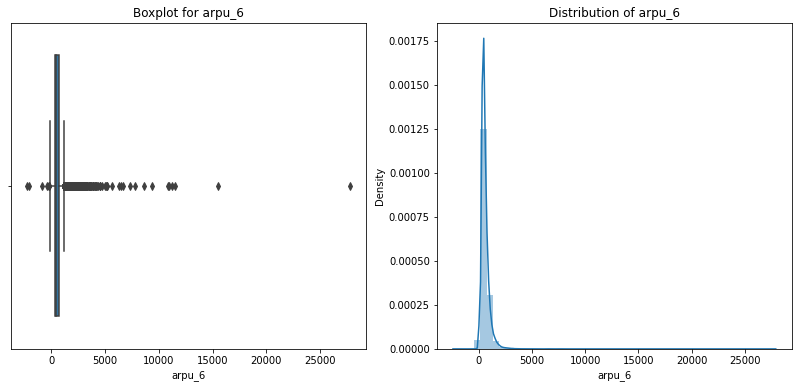

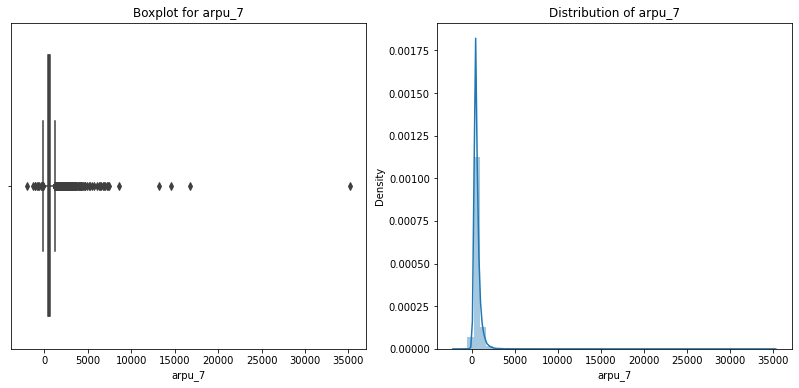

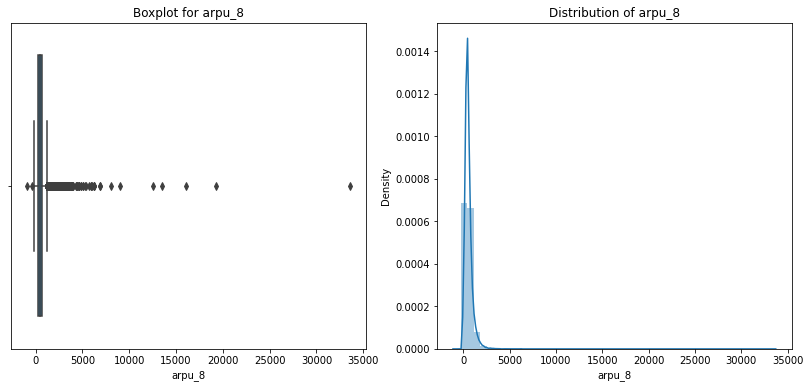

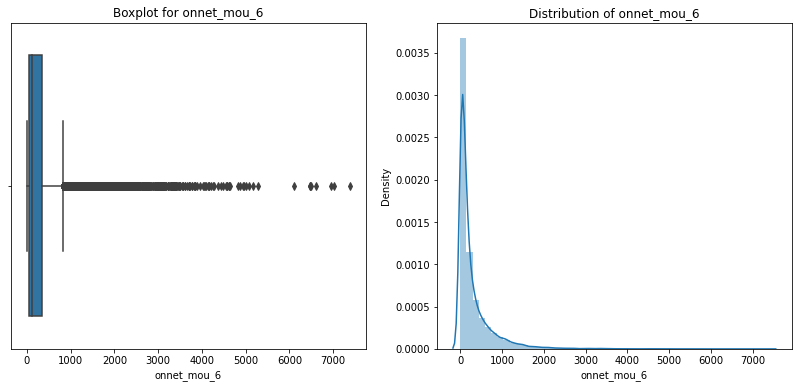

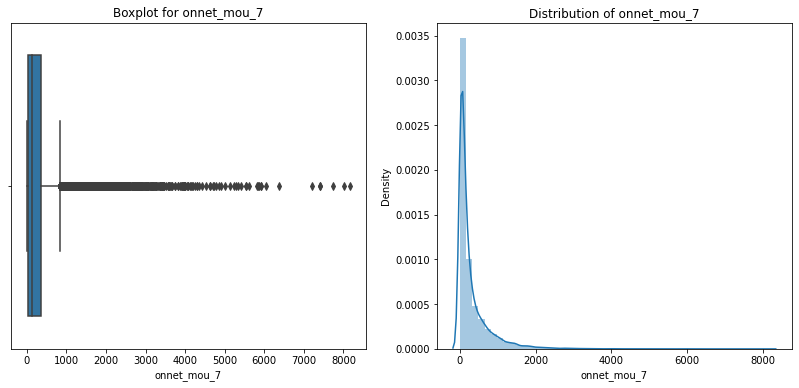

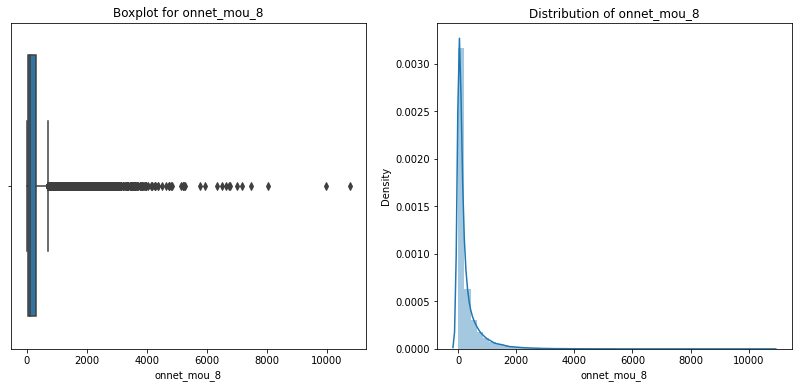

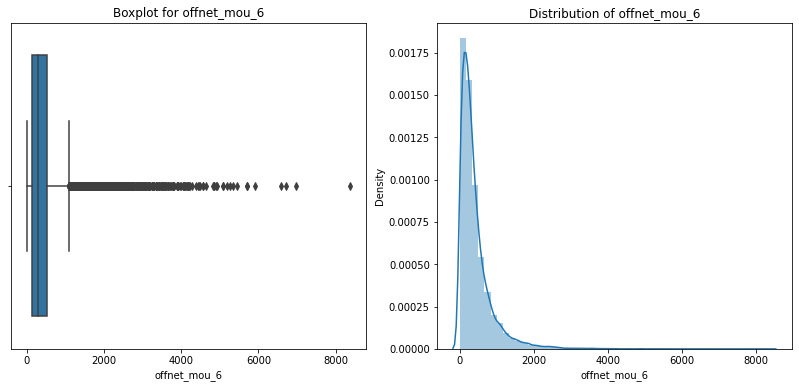

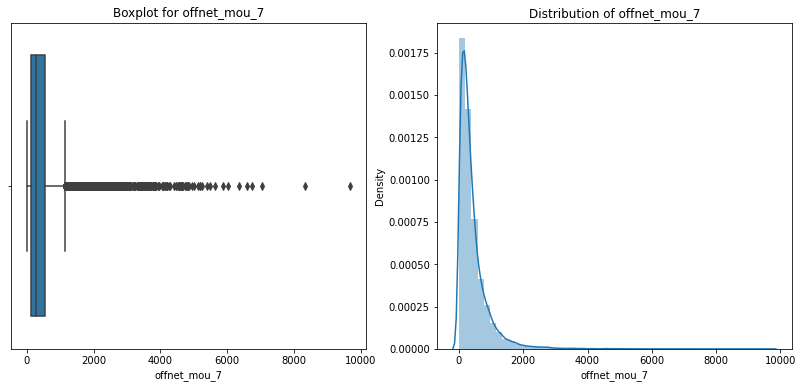

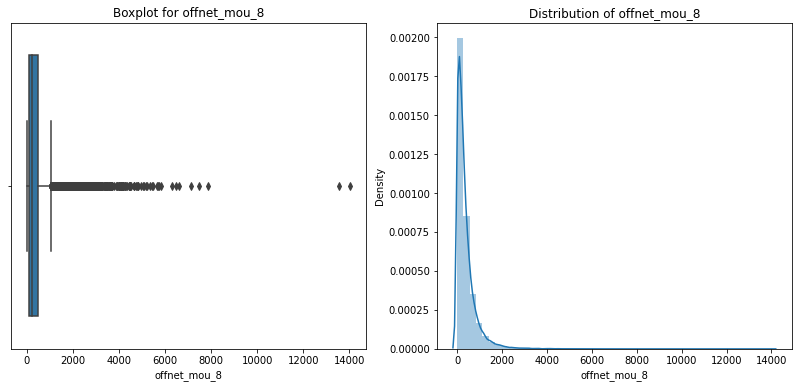

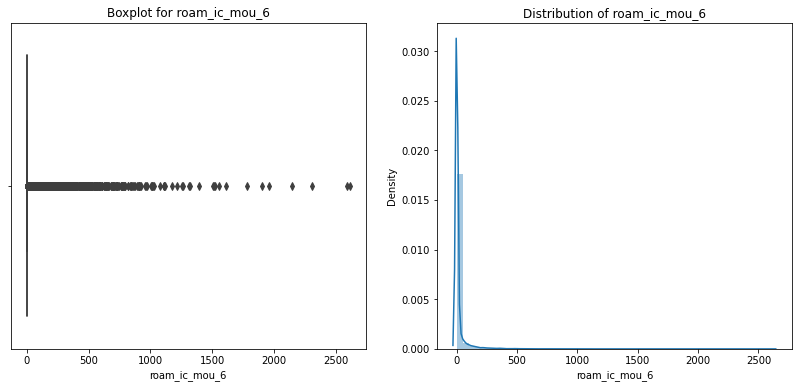

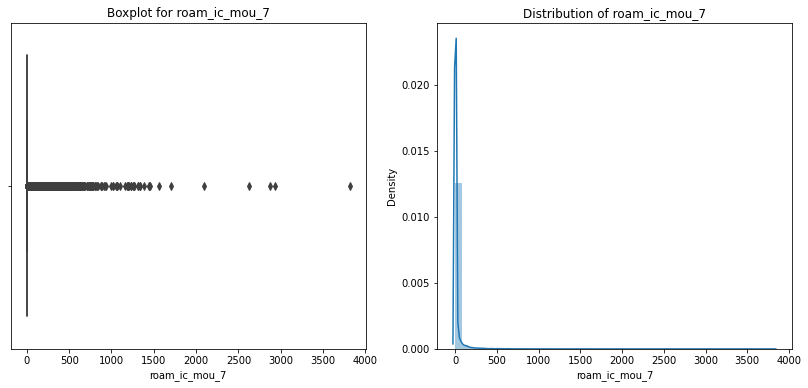

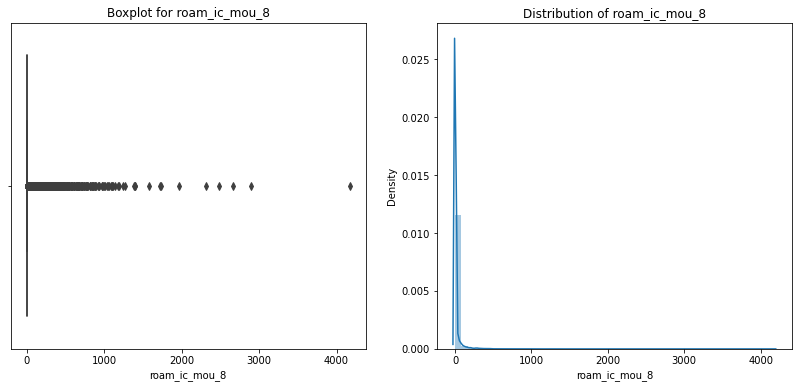

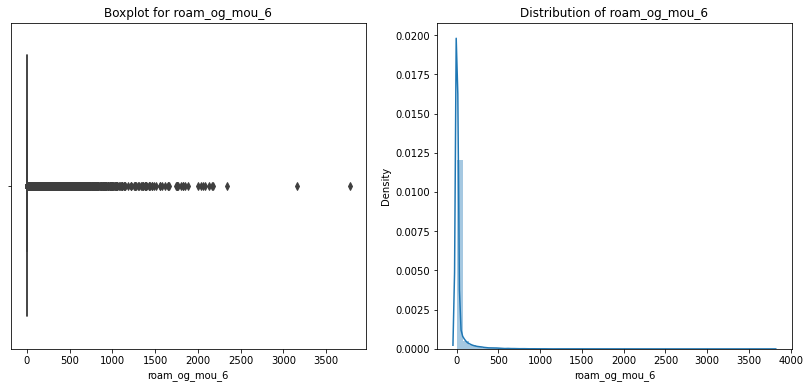

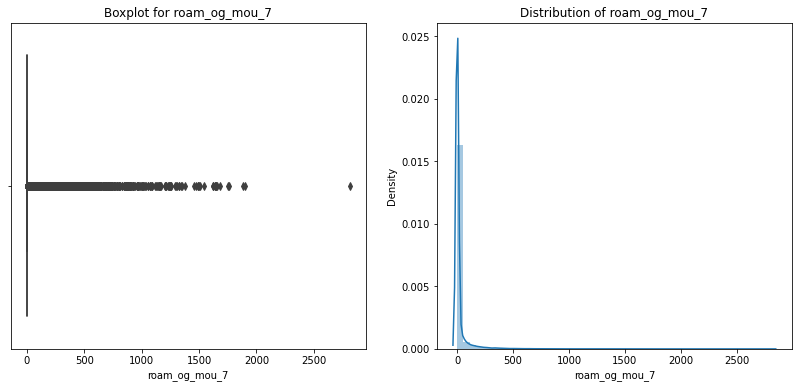

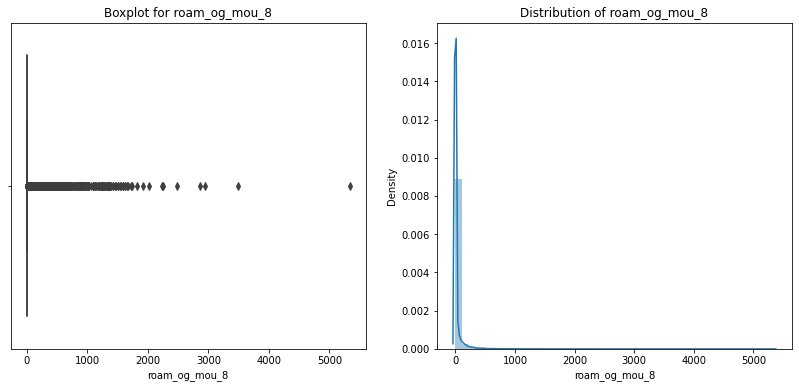

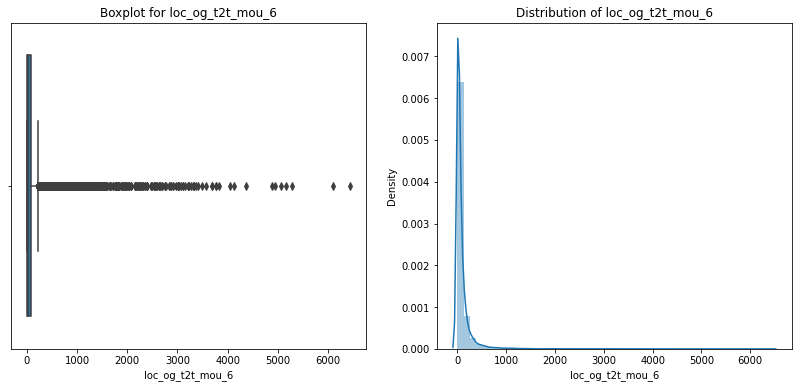

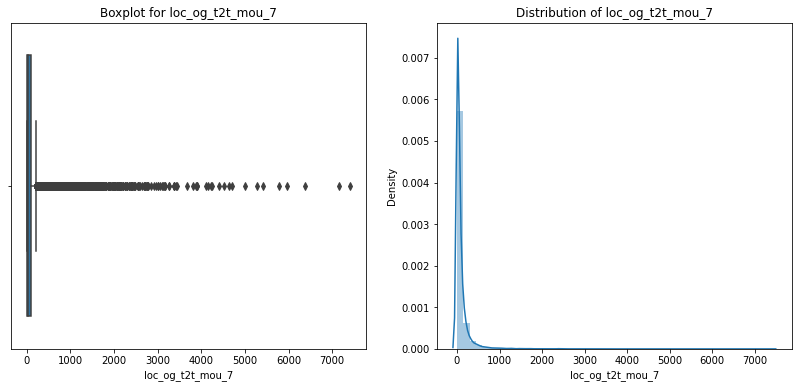

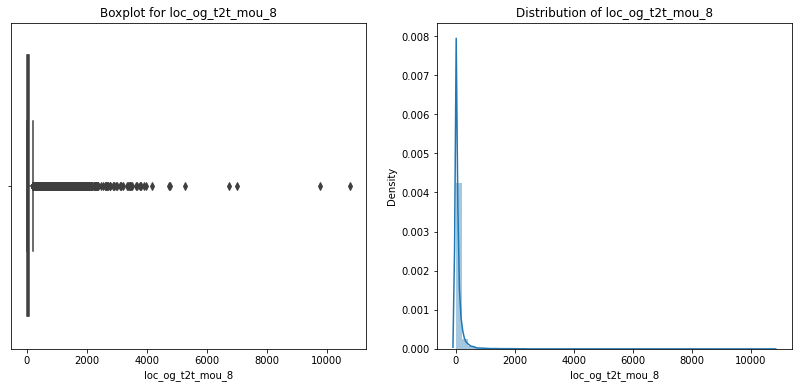

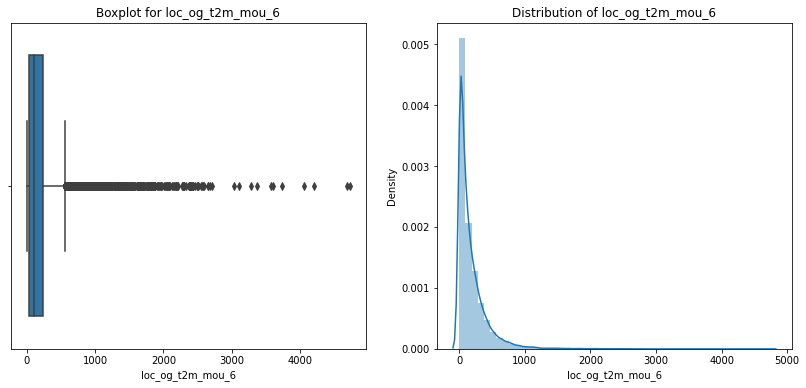

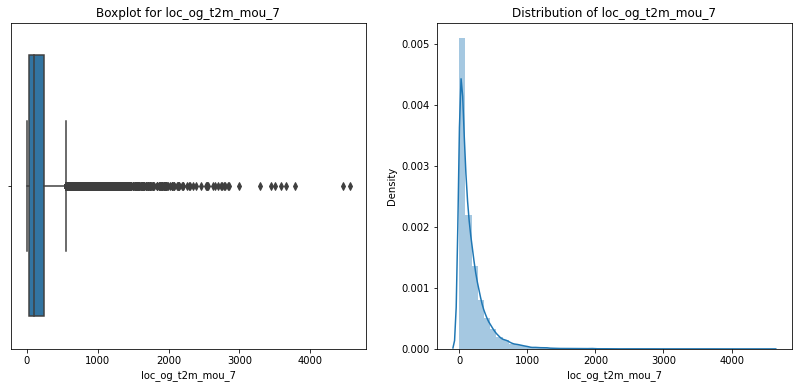

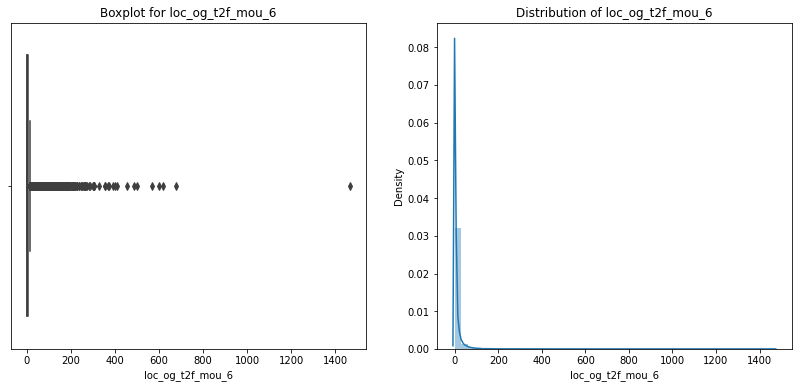

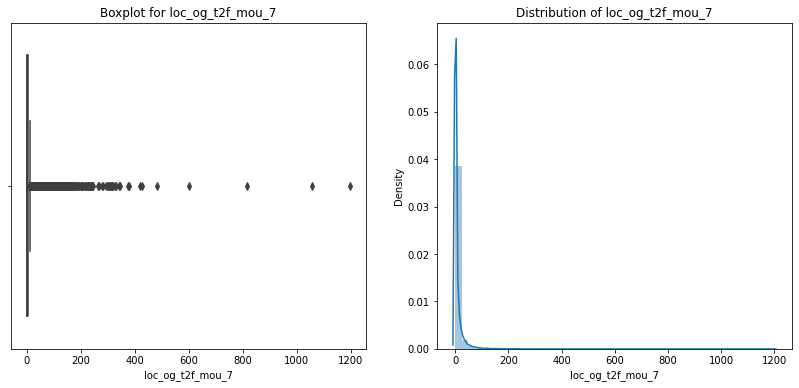

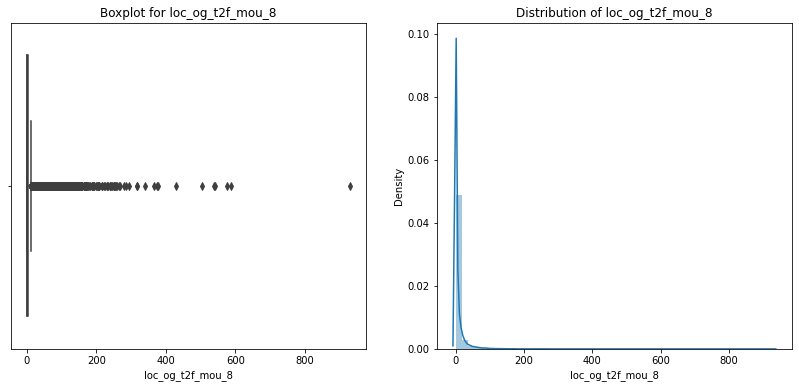

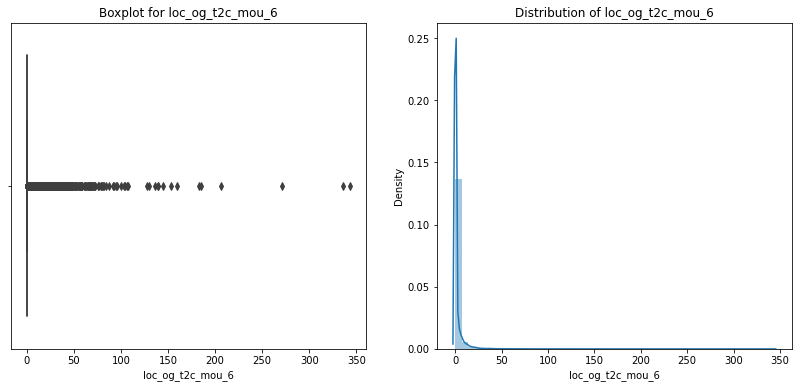

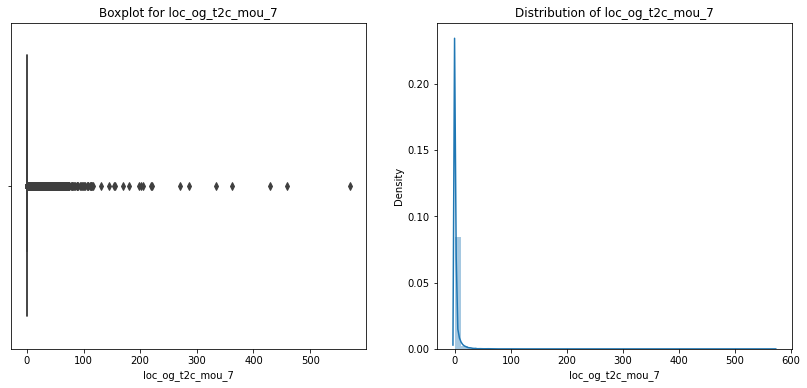

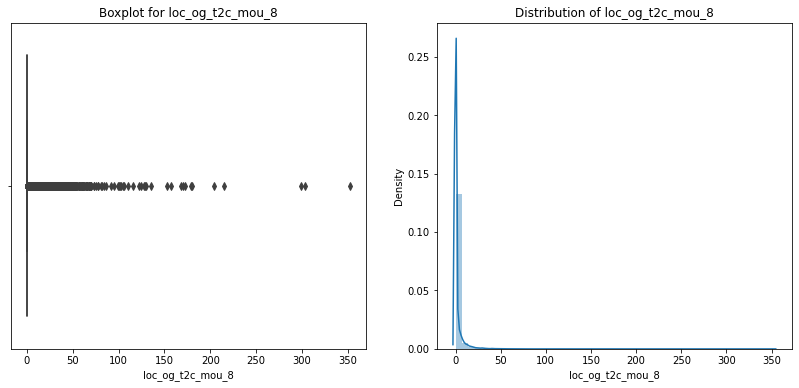

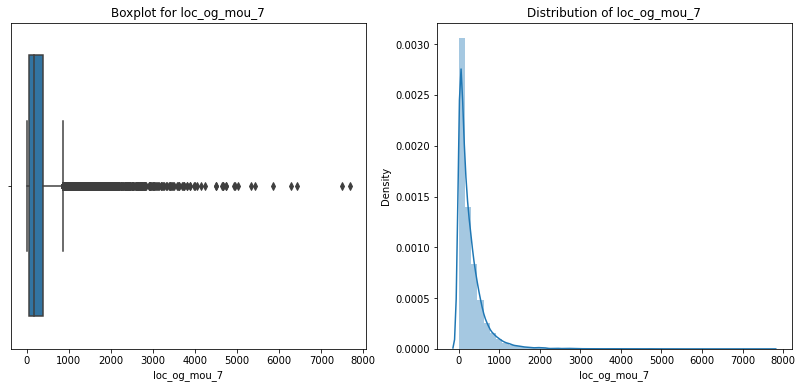

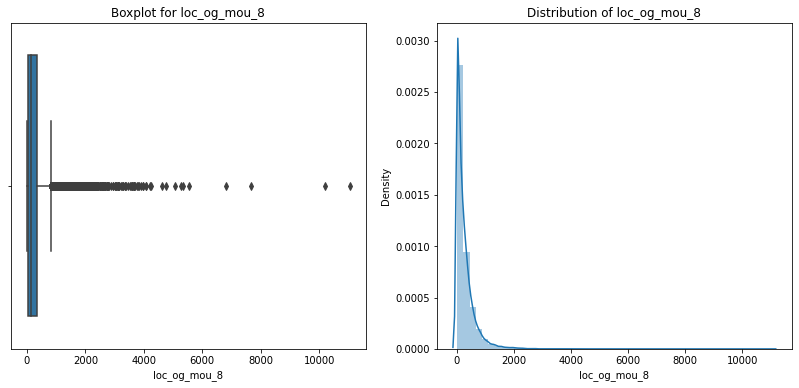

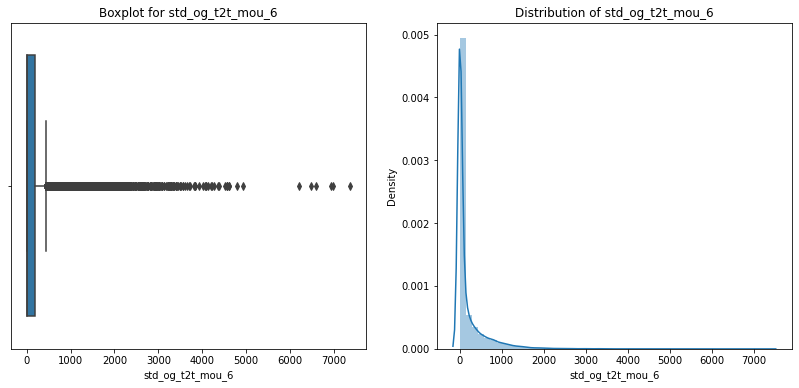

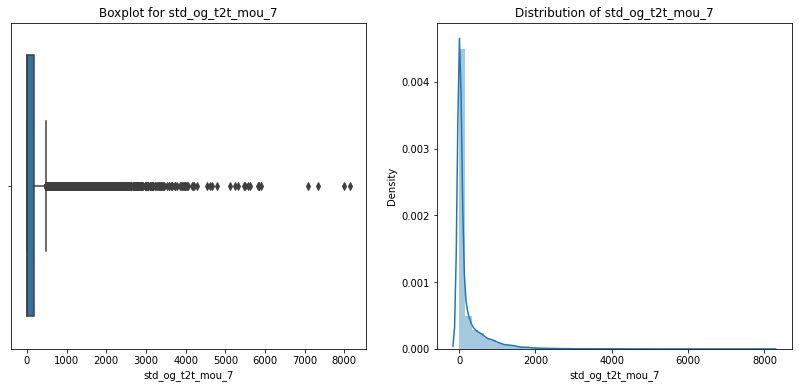

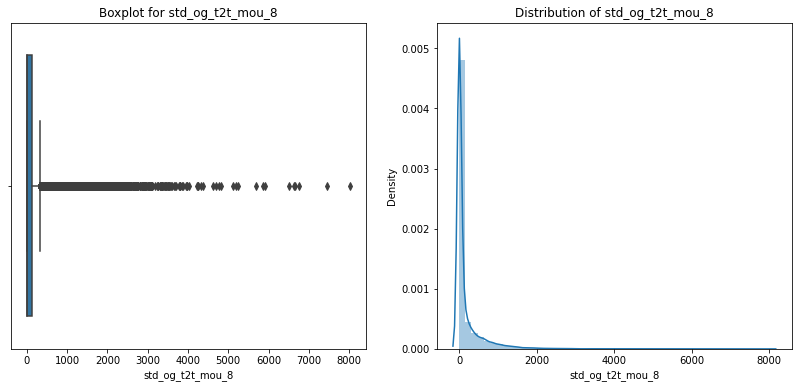

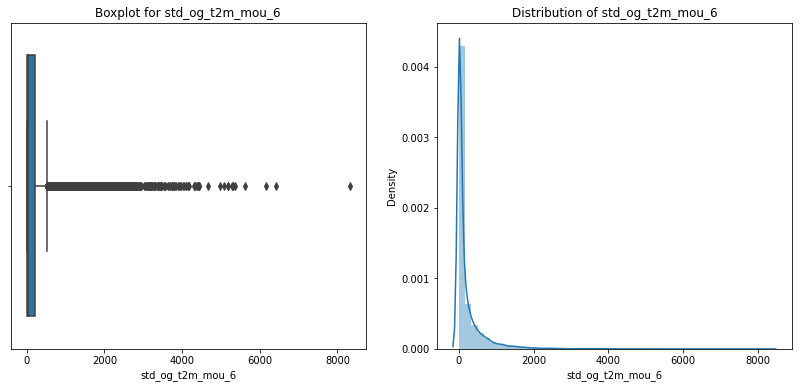

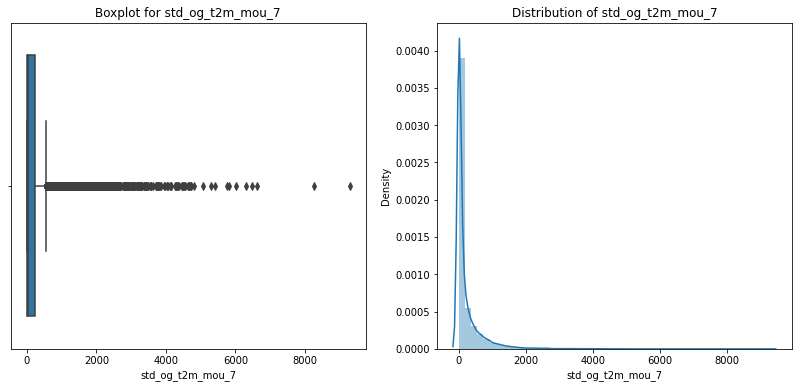

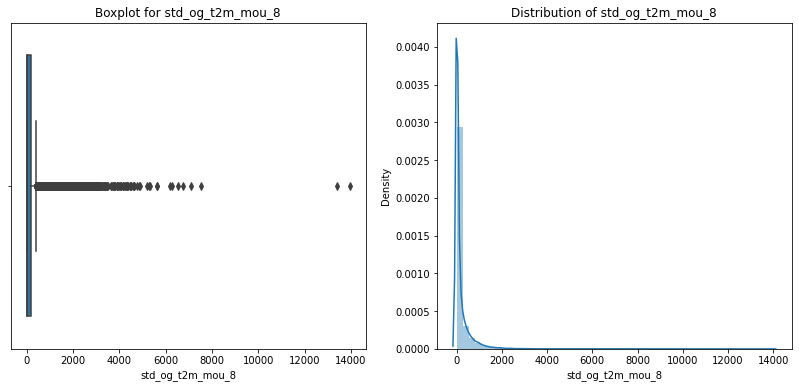

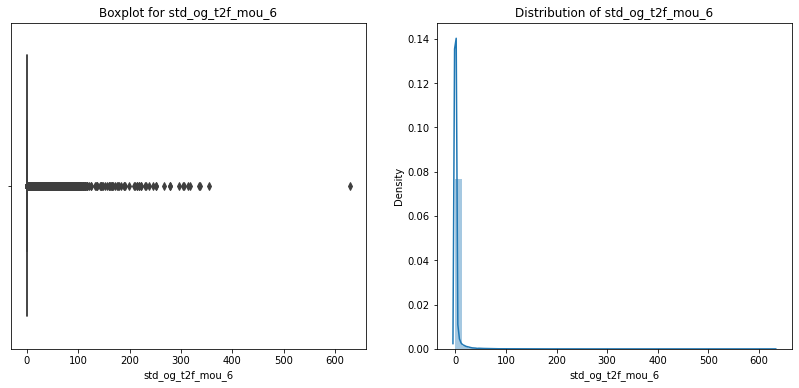

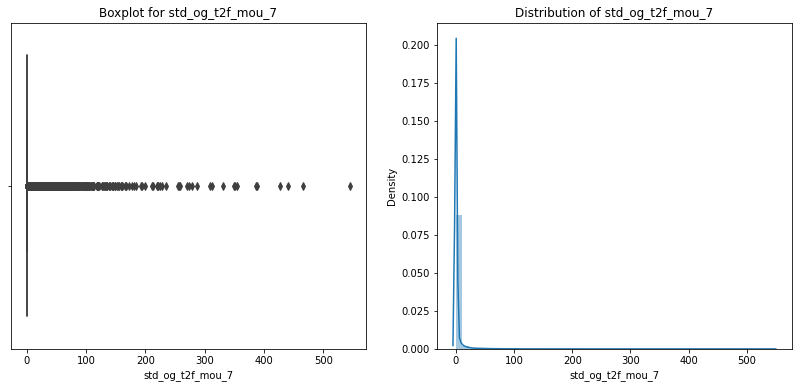

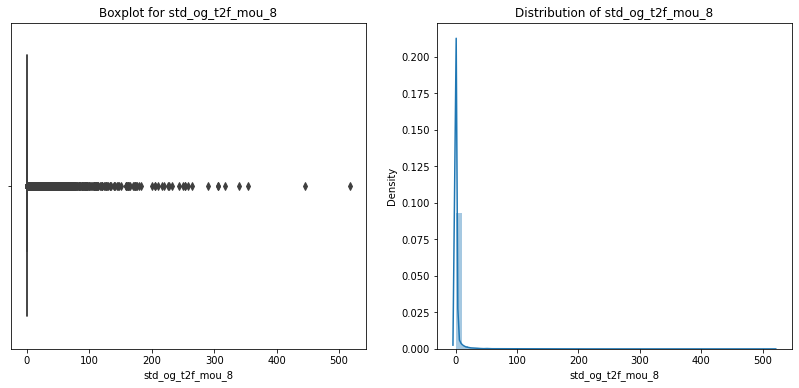

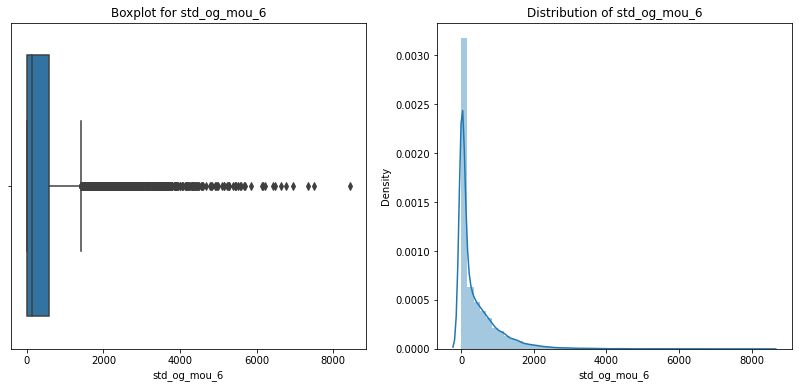

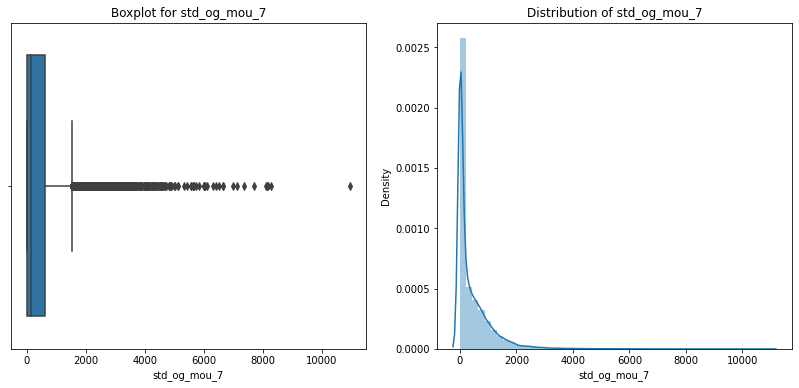

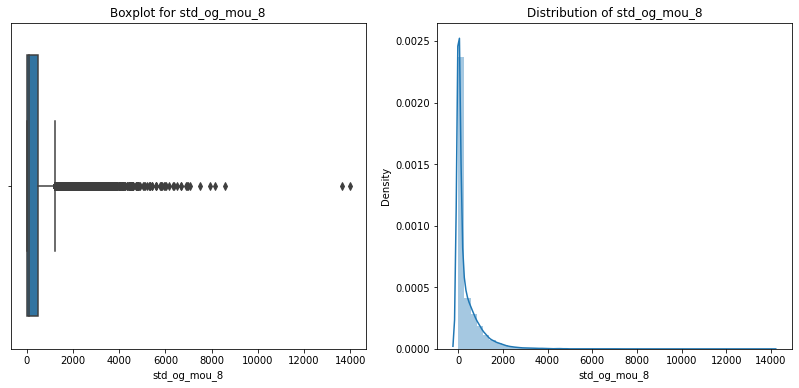

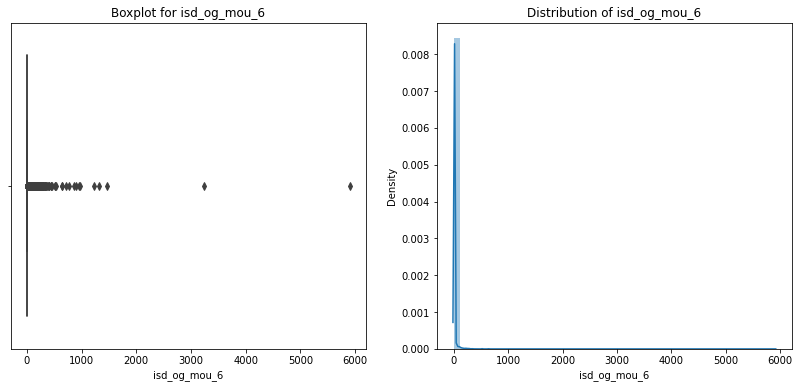

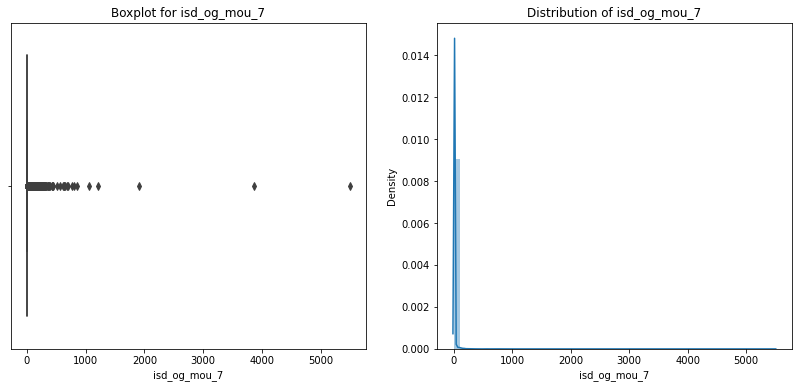

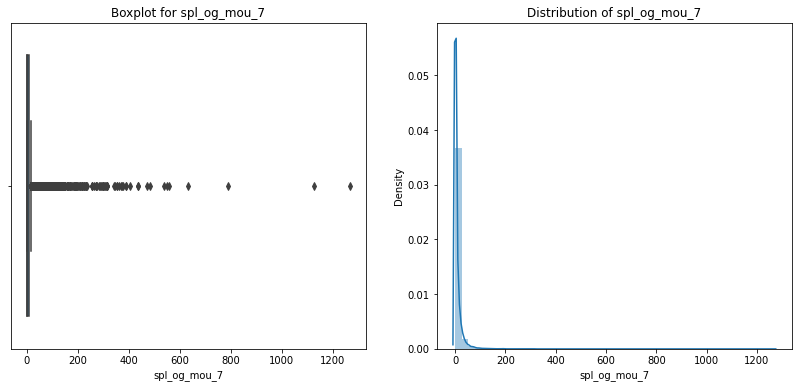

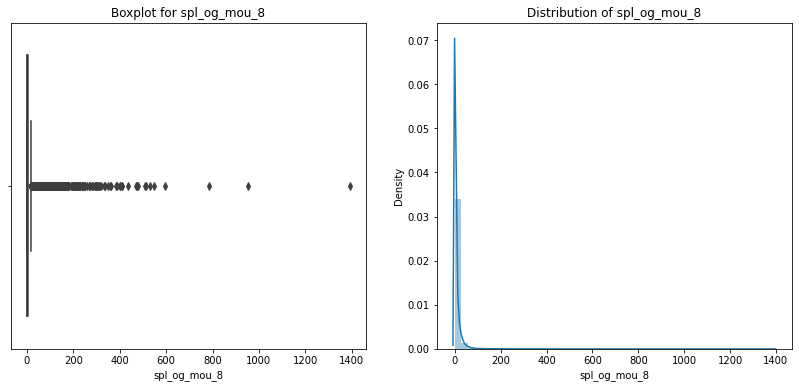

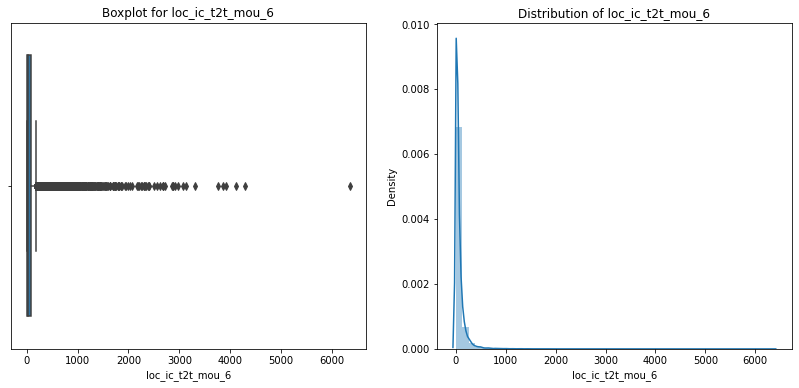

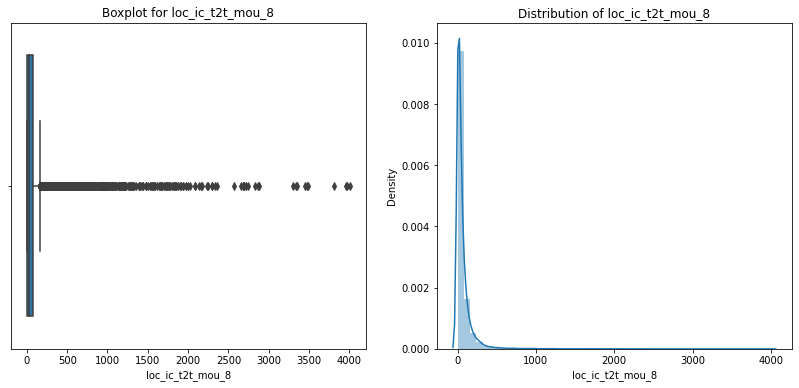

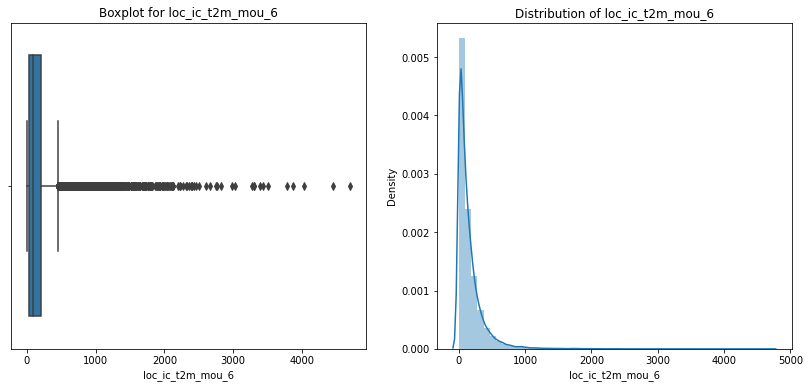

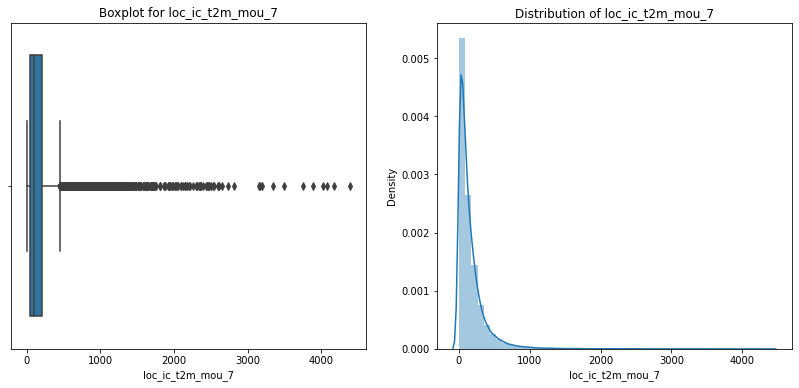

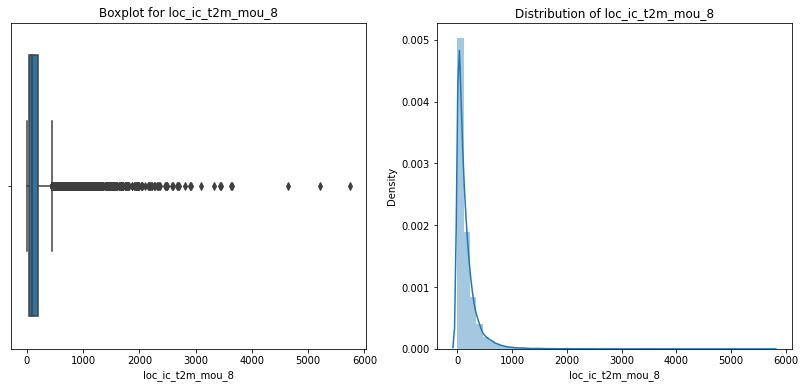

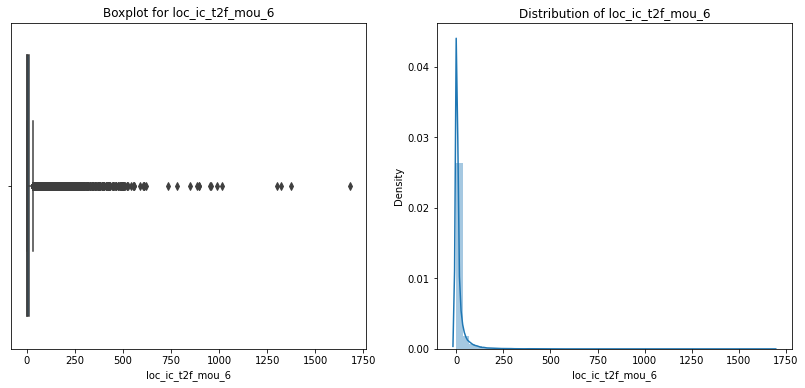

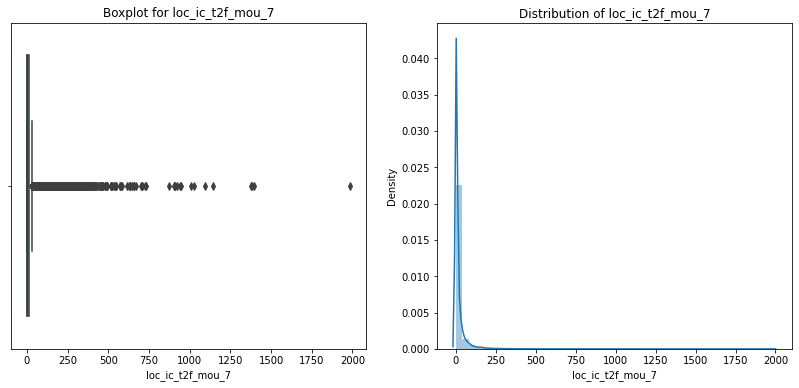

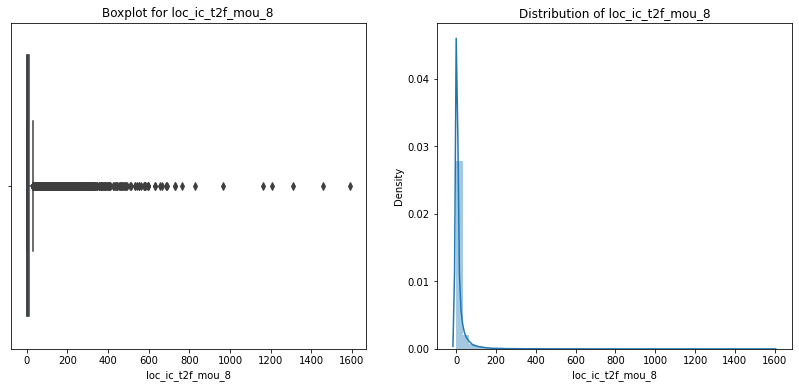

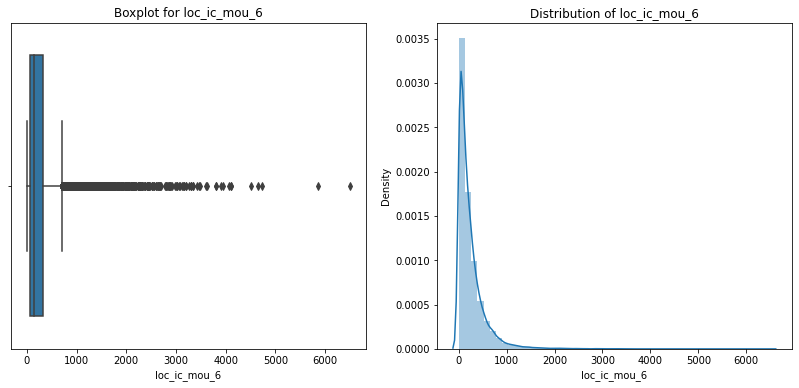

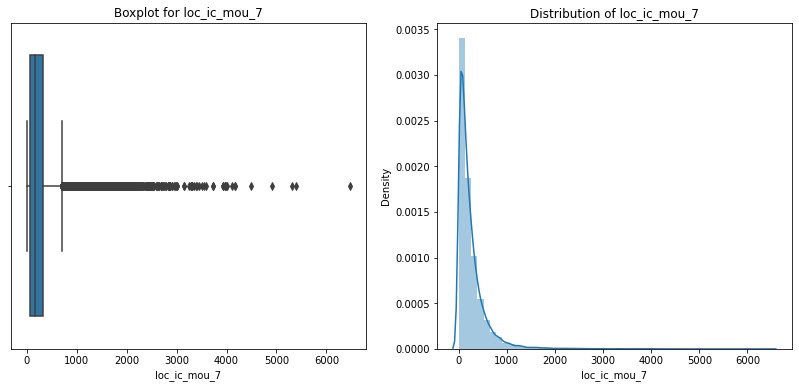

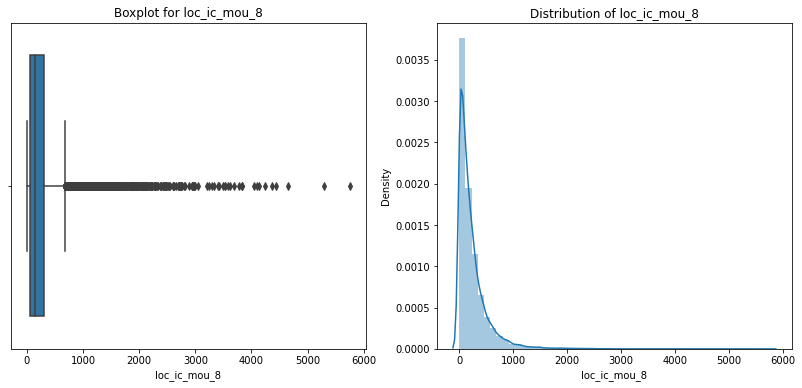

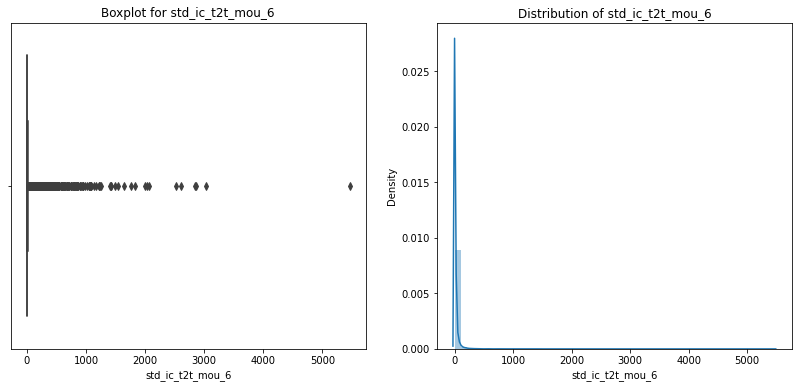

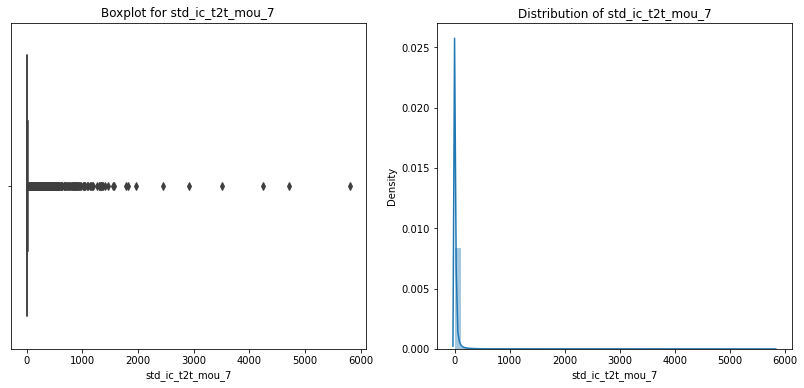

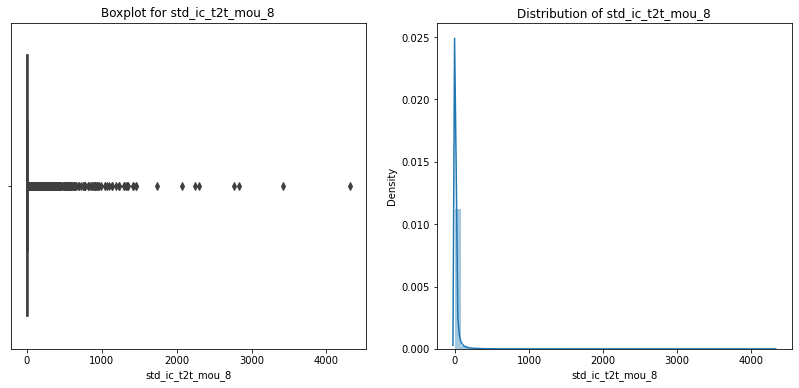

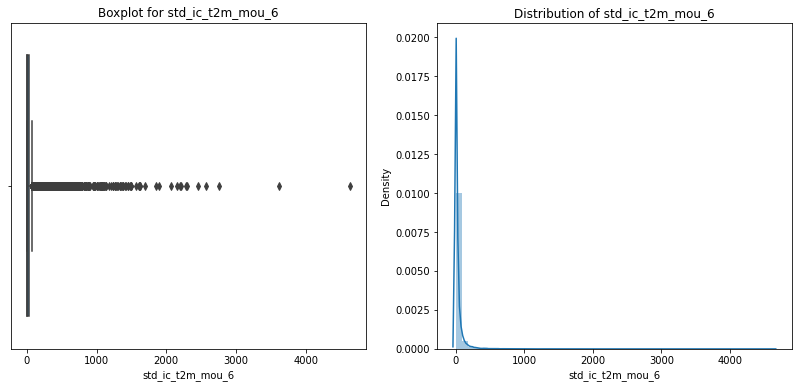

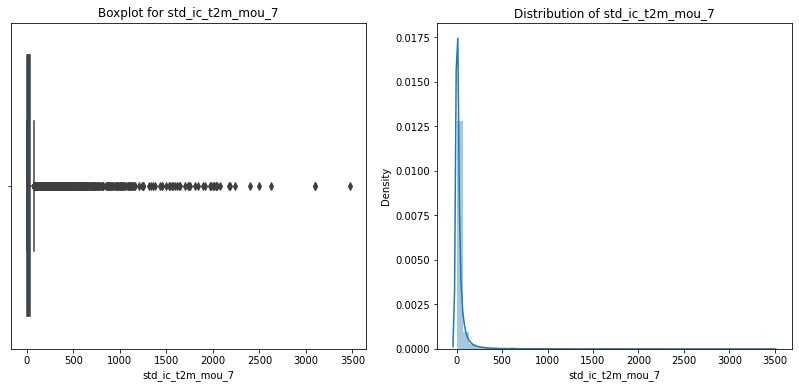

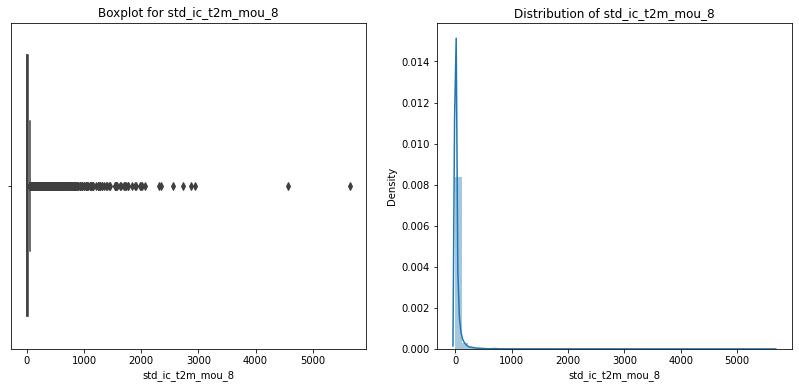

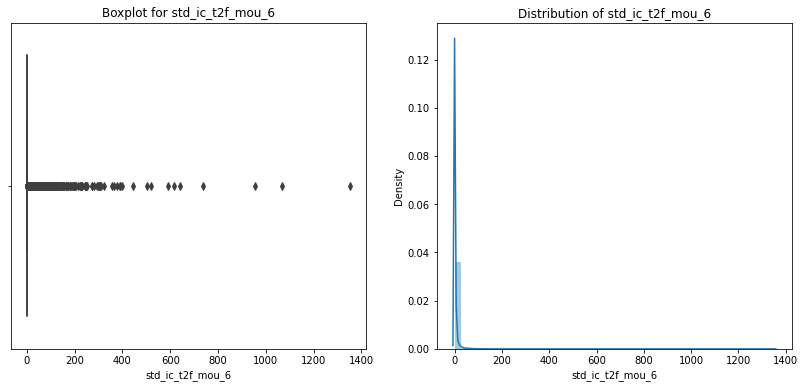

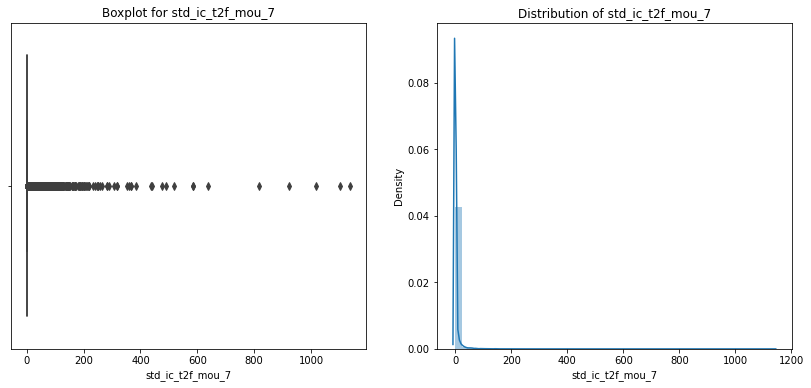

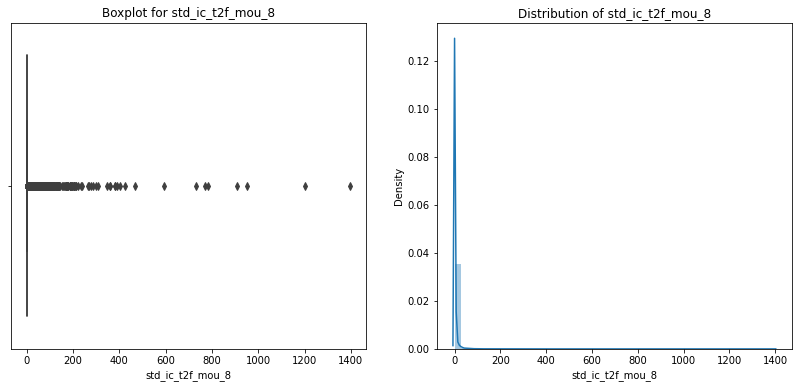

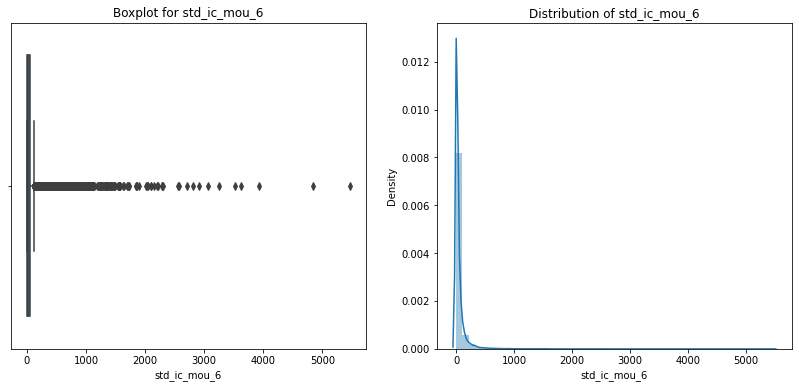

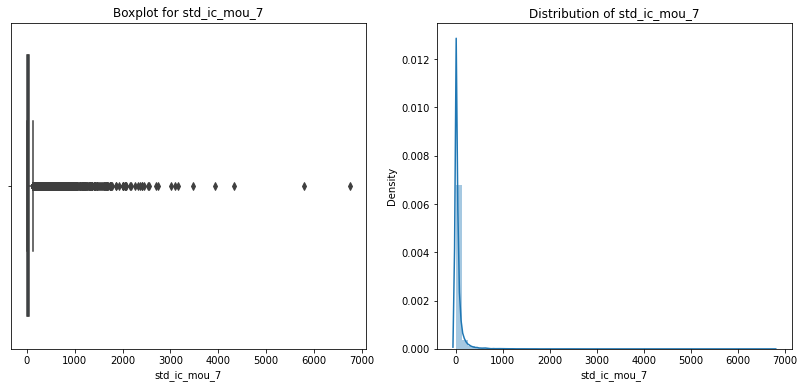

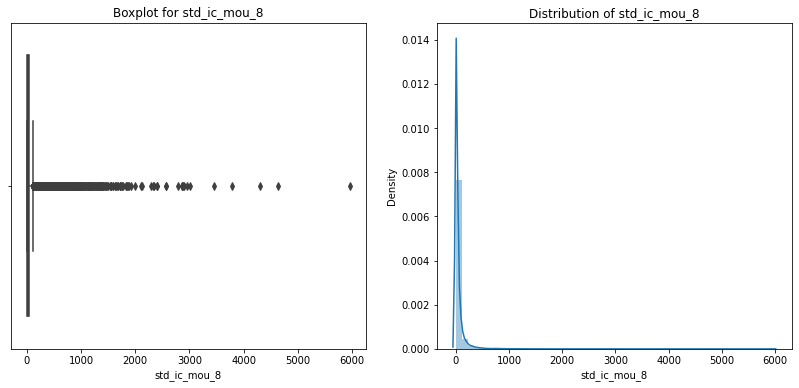

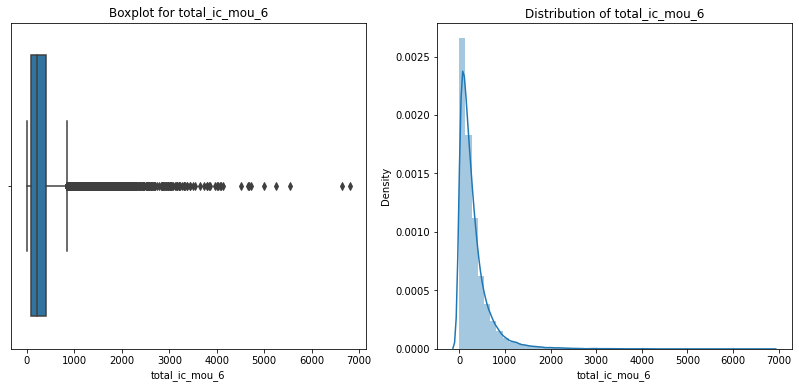

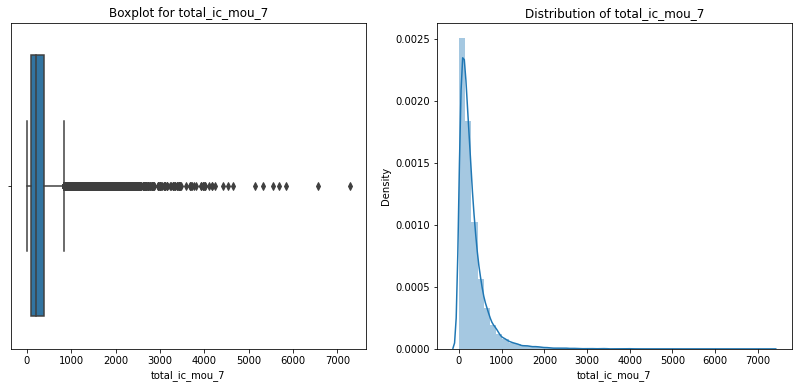

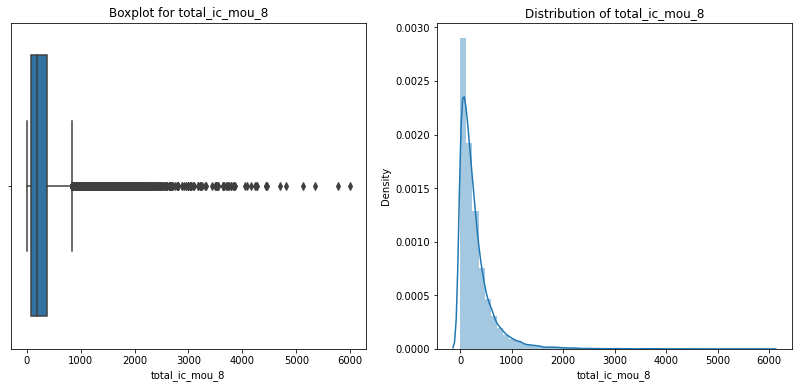

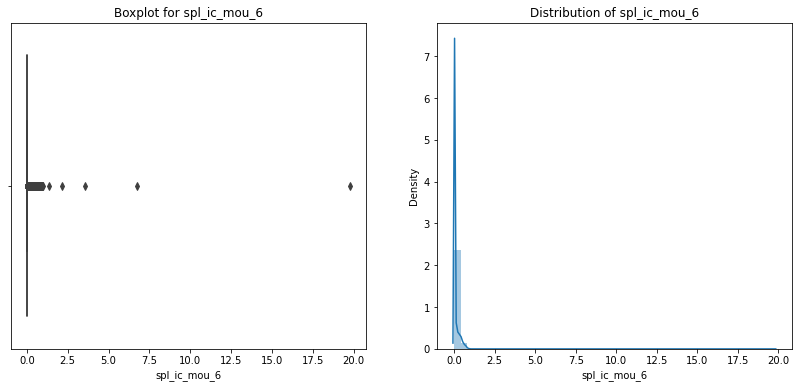

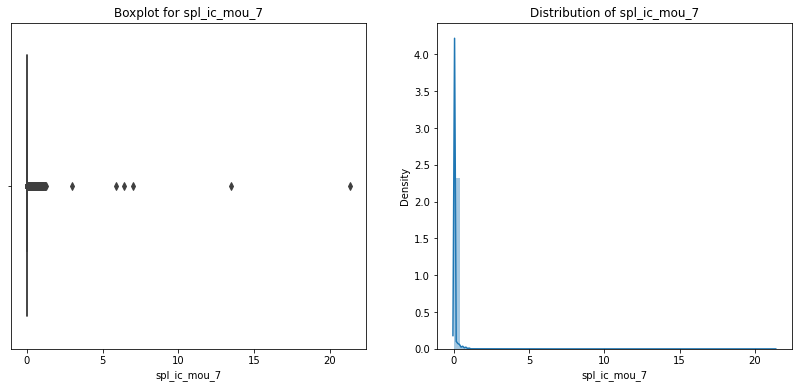

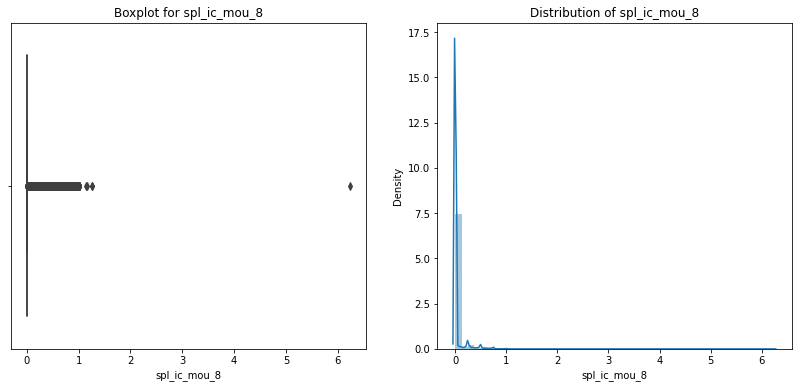

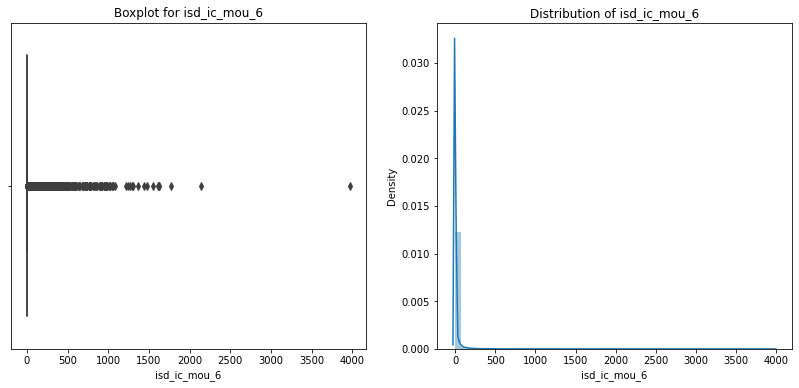

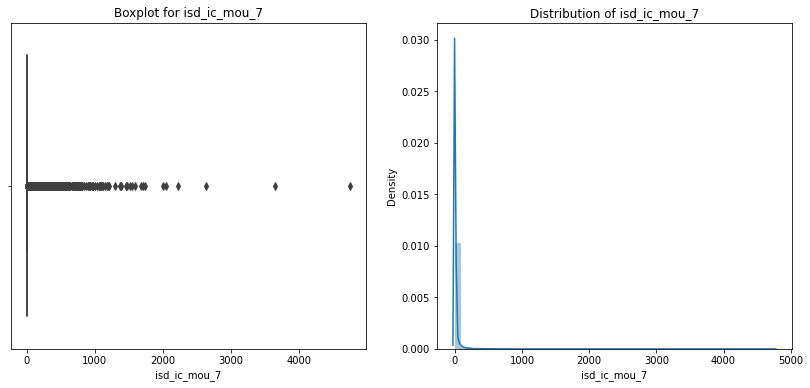

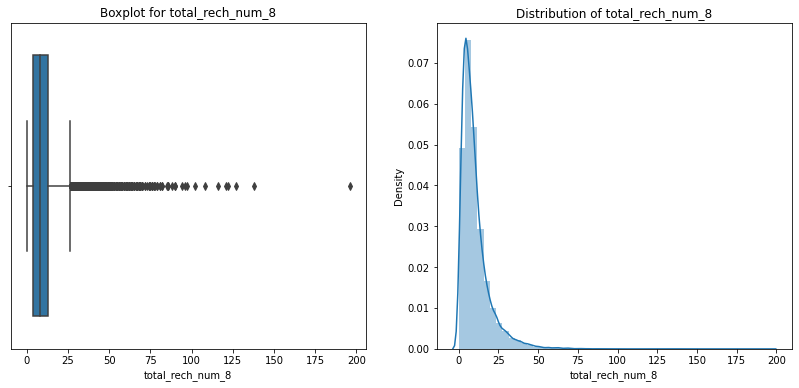

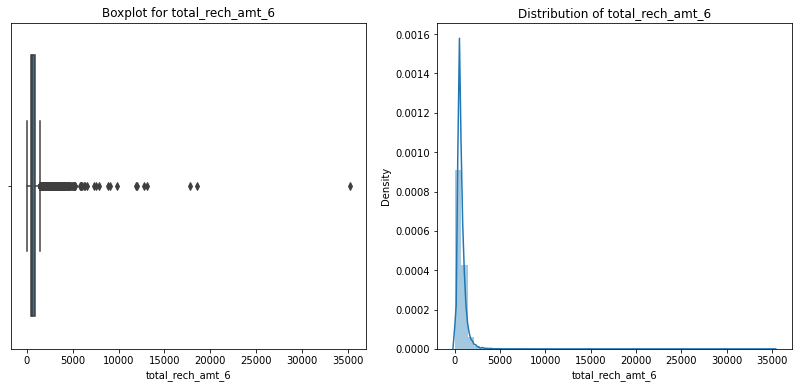

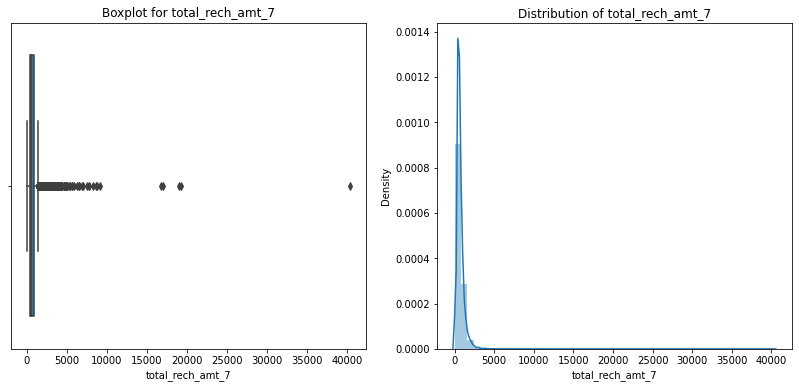

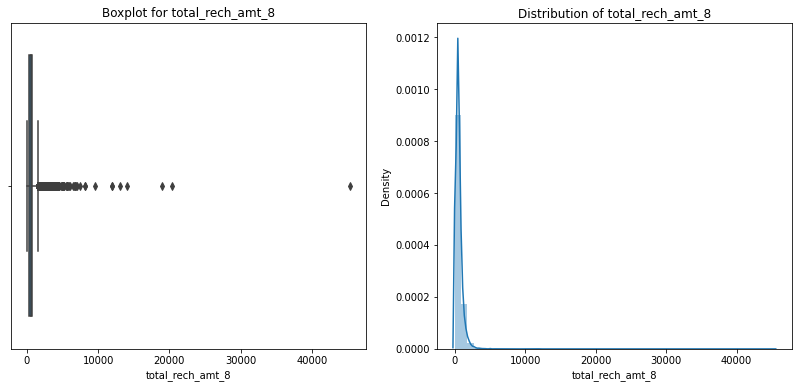

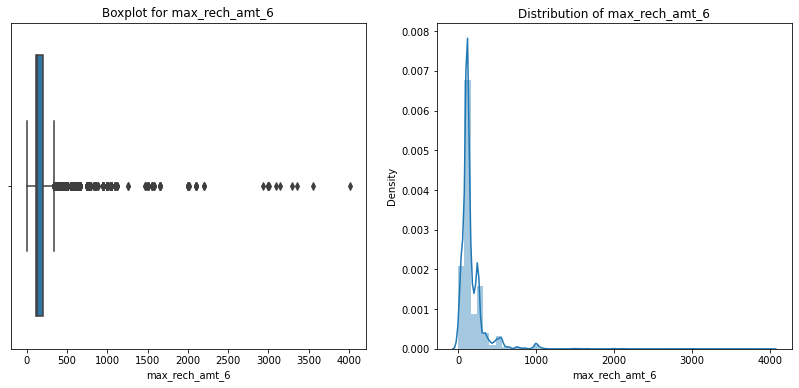

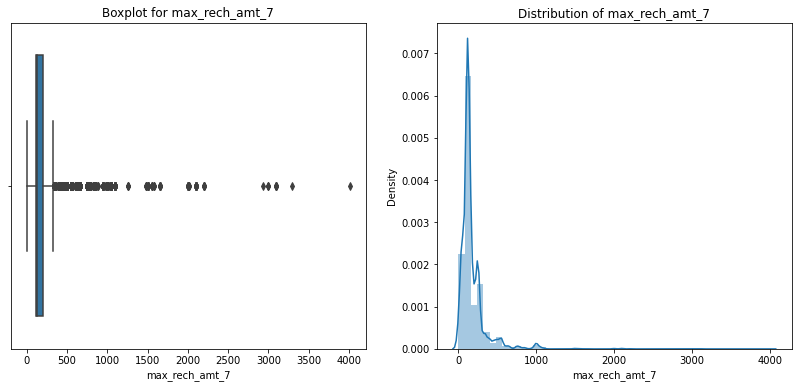

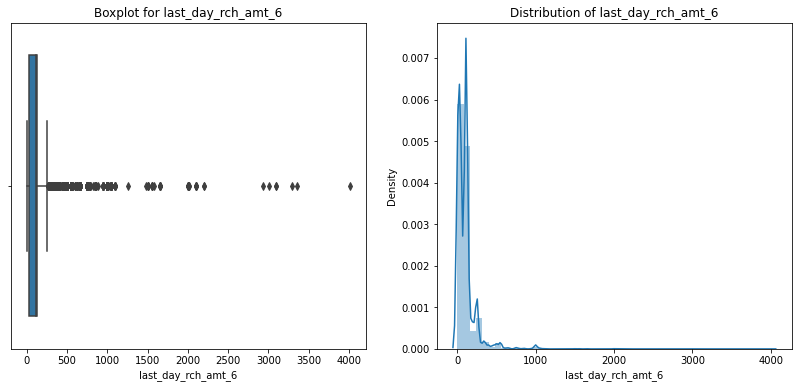

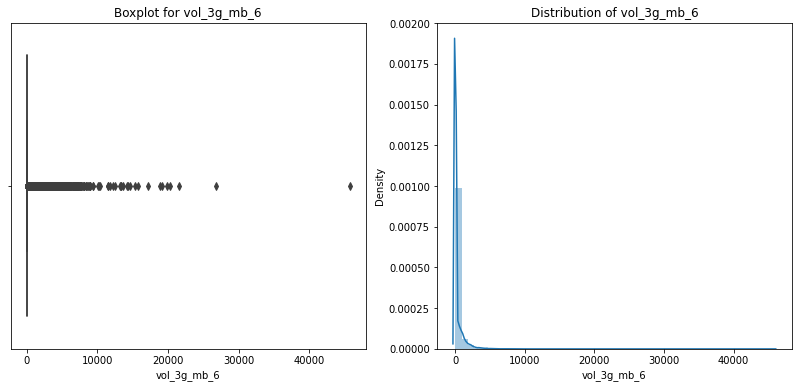

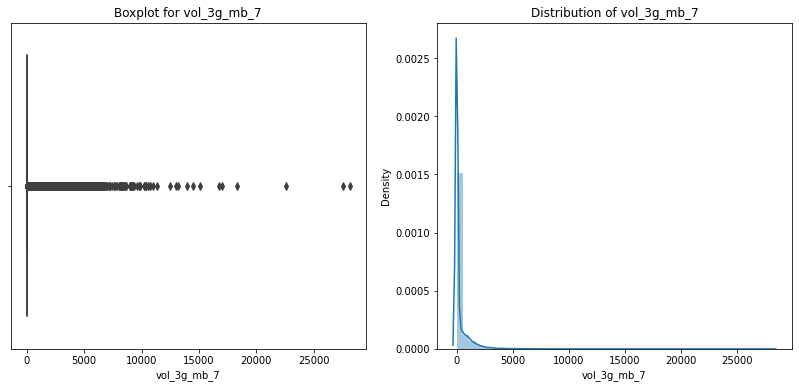

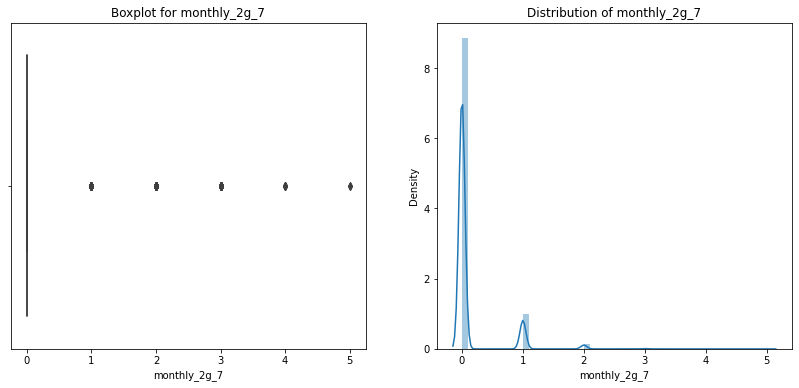

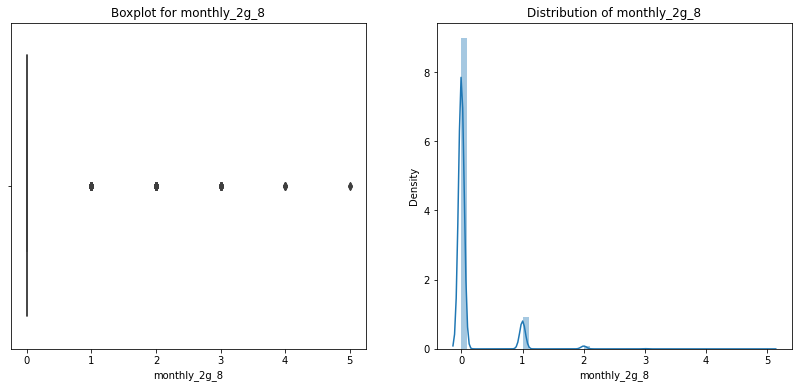

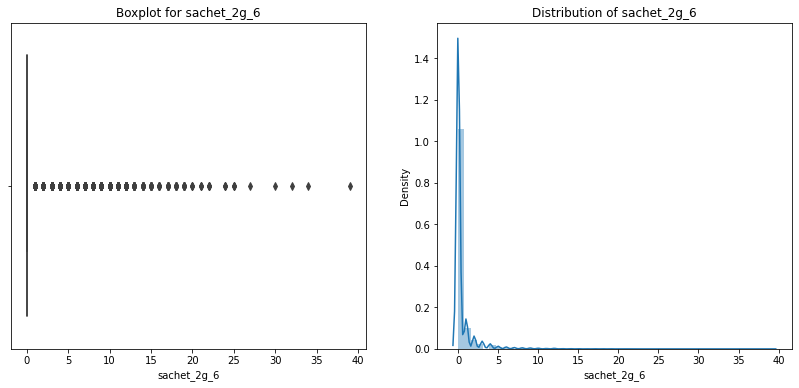

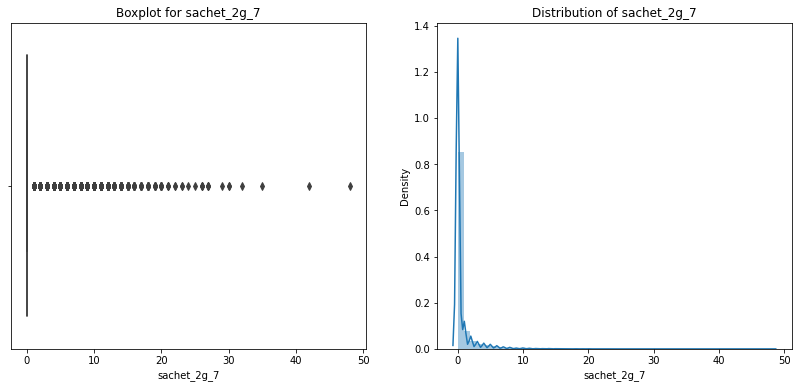

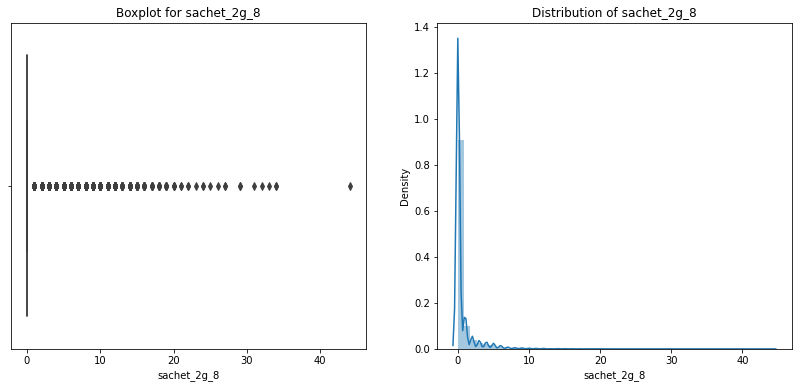

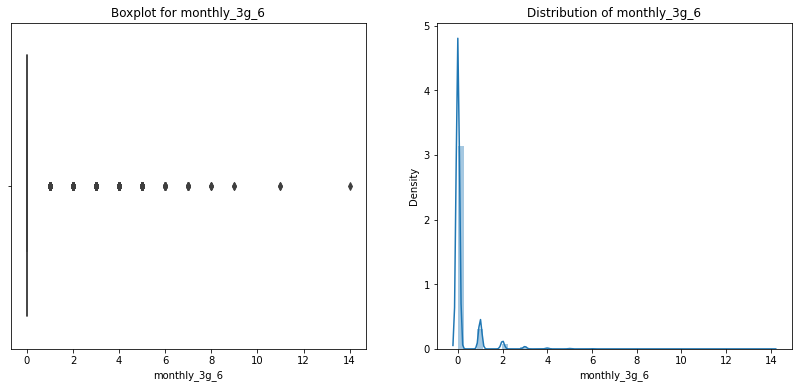

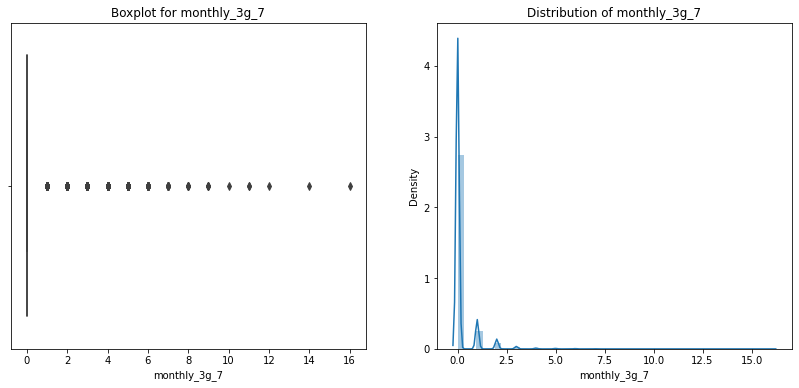

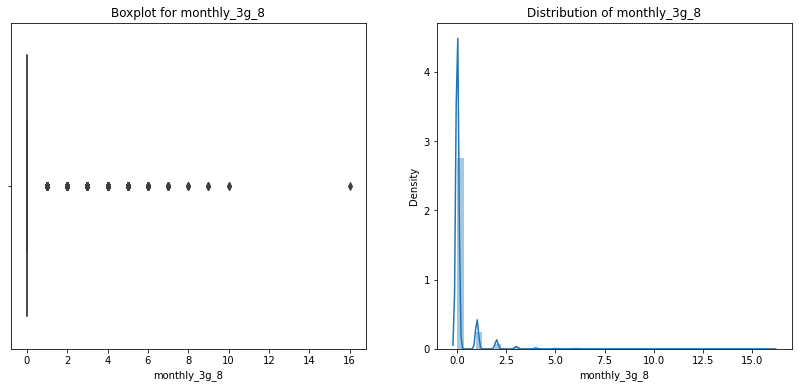

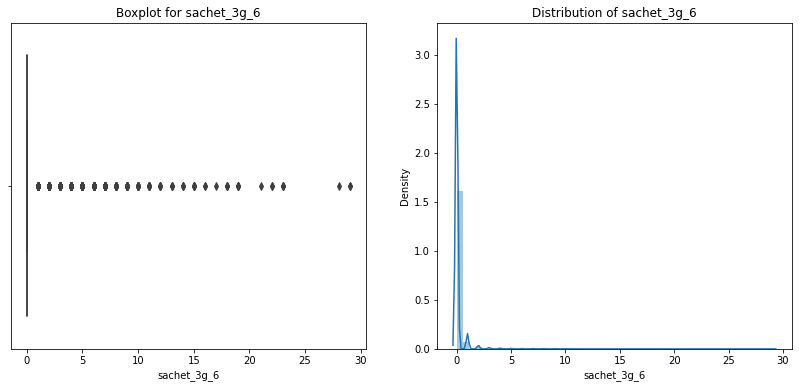

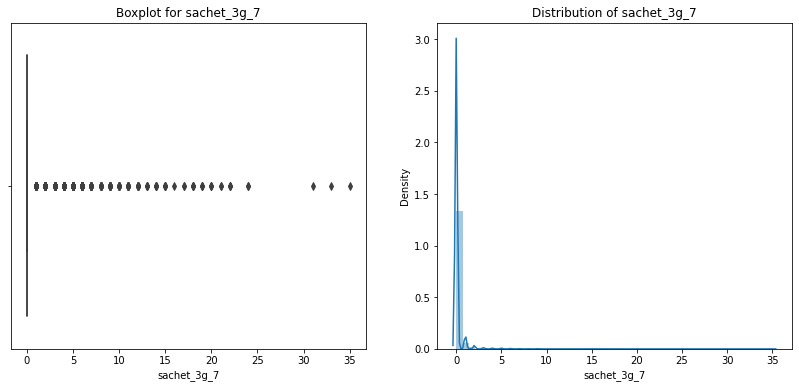

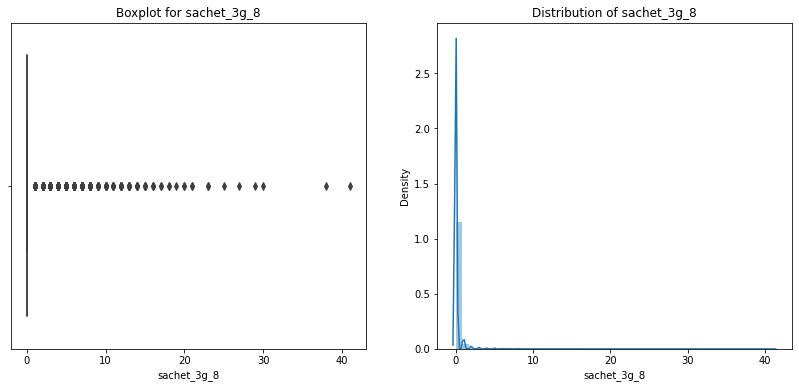

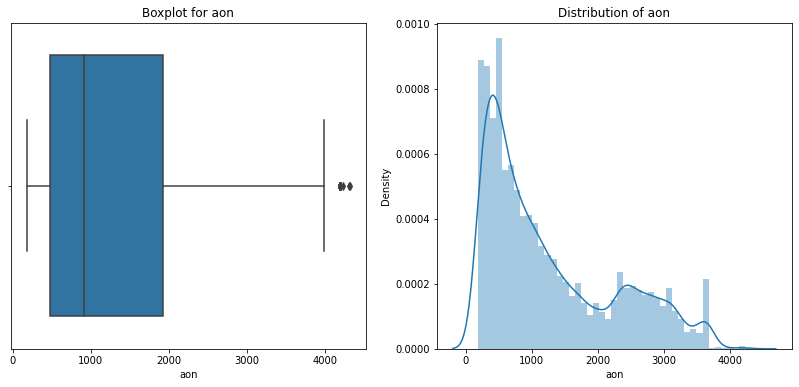

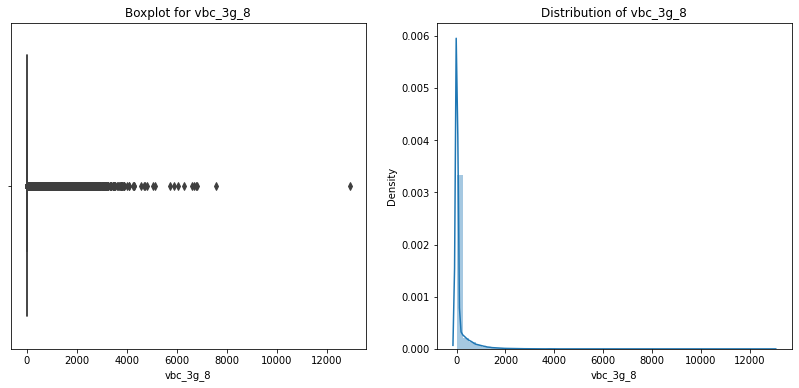

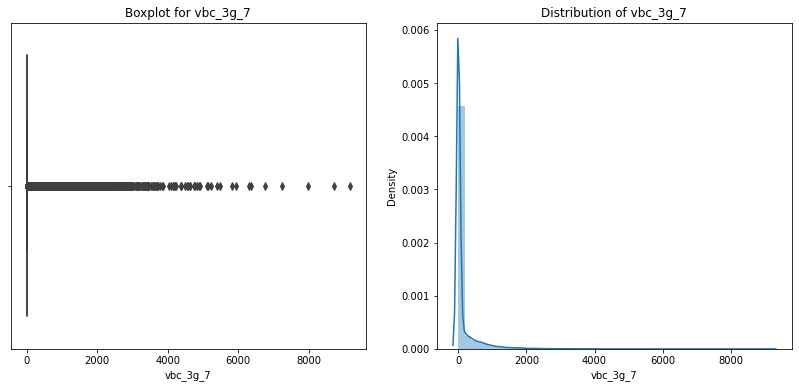

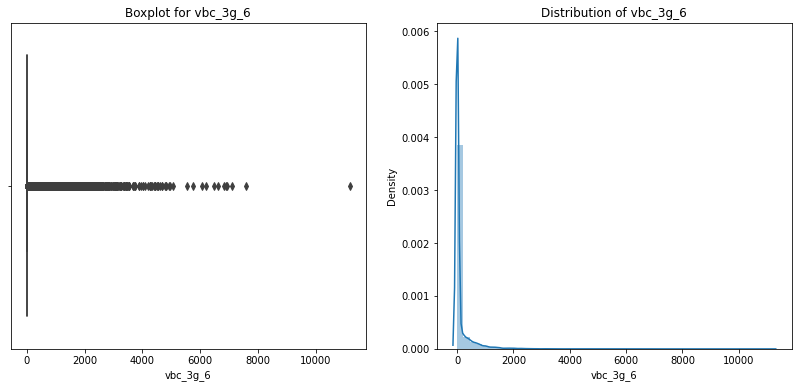

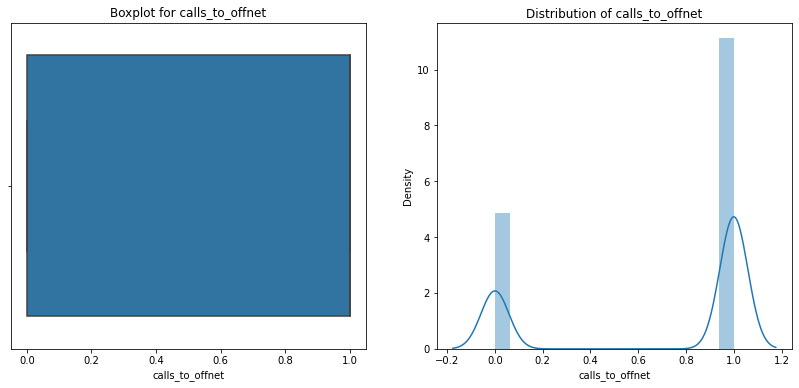

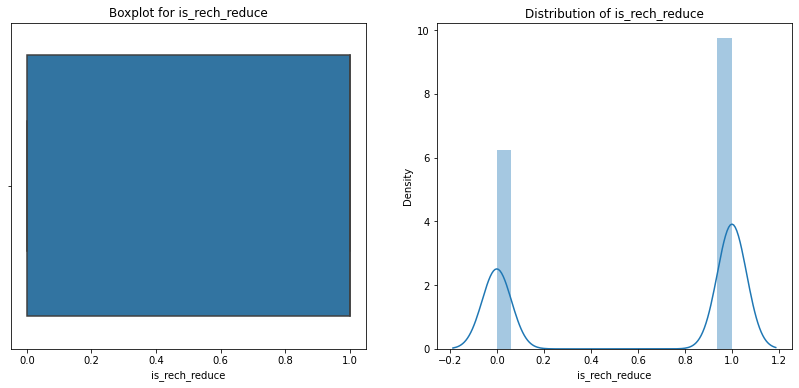

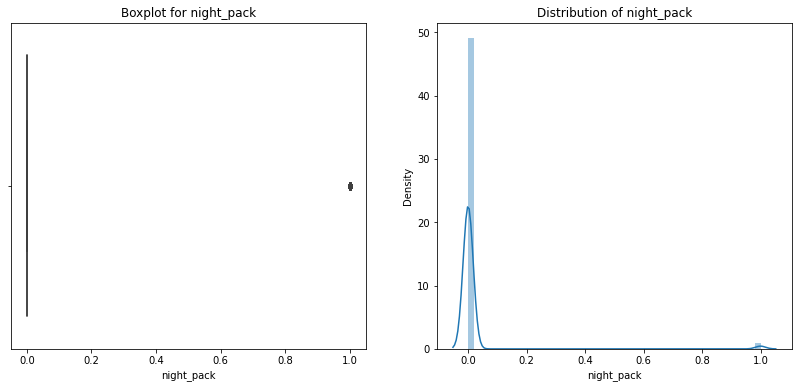

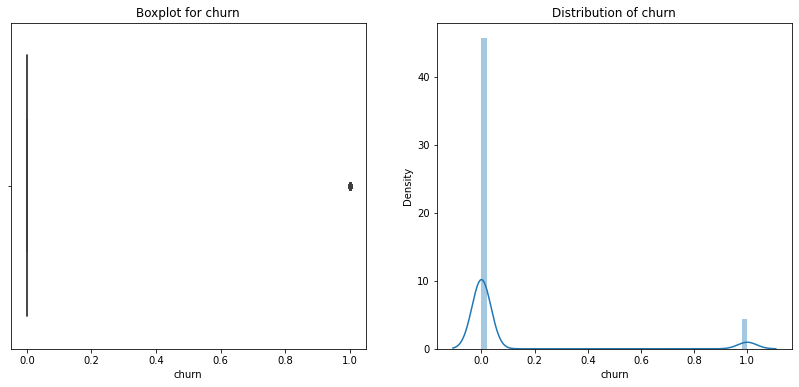

In [43]:

#lets check for the distribution of the data using boxplot
for i in data.columns:
    
    fig  = plt.figure(figsize=[14,6])
    ax1 = plt.subplot(1,2,1)
    sns.boxplot(data[i])
    plt.title("Boxplot for " + i)
    
    
    ax1 = plt.subplot(1,2,2)
    sns.distplot(data[i])
    plt.title("Distribution of " + i)
    plt.show()

Inference:
    We can observe the variables are skewed to left. This can be handled by capping the outliers

### Bivariate Analysis

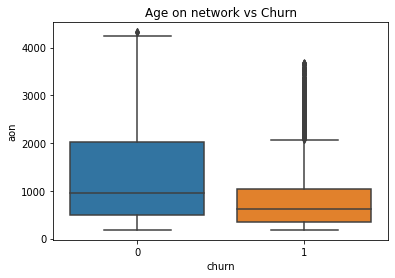

In [44]:
#lets look at the column Aon - Age on network w.r.t churn
sns.boxplot(data=data,y="aon",x="churn")
plt.title("Age on network vs Churn")
plt.show()

Inference:
    We observe the median of churned customers in AON is lower than the AON in non-churned customers. Lesser a customer has stayed with the network, more likely he is to churn

In [45]:
#function to plot boxplot for each month 
from numpy import median
def monthly_pointplot(col,title):
    fig  = plt.figure(figsize=[16,6])
    
    plt.subplot(1,3,1)
    sns.pointplot(data=data,y=col+"_6",x="churn")
    plt.title(title +" - June vs Churn")
    
    plt.subplot(1,3,2)
    sns.pointplot(data=data,y=col+"_7",x="churn")
    plt.title(title +" - July vs Churn")
    
    plt.subplot(1,3,3)
    sns.pointplot(data=data,y=col+"_8",x="churn")
    plt.title(title +" - August vs Churn")
    plt.show()

Pointplots helps easily compare central tendency between different categories. Lets make use of this to compare different variables for churn and non-churn categories

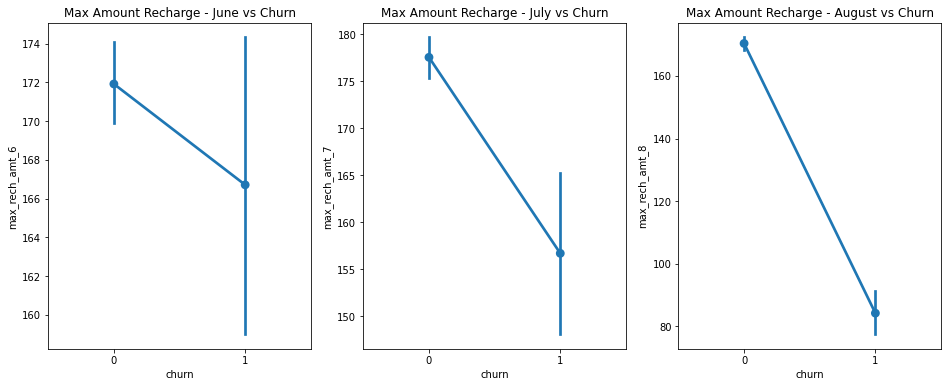

In [46]:
#Lets see if there is any relation between churn and max data recharge
monthly_pointplot("max_rech_amt","Max Amount Recharge")

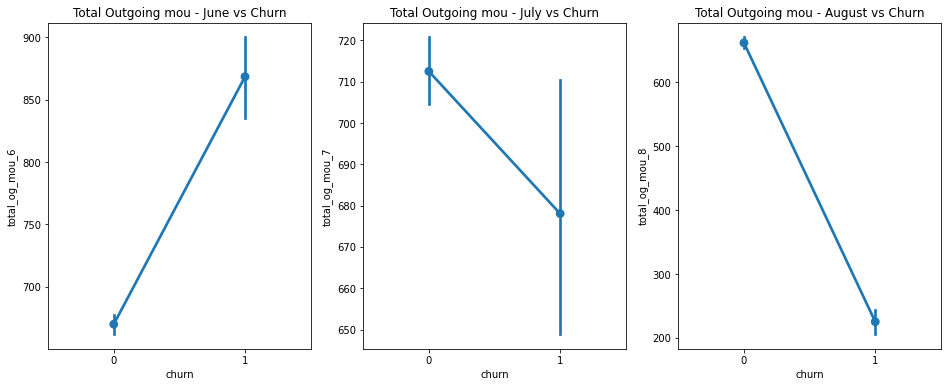

In [47]:
#total outgoing mou - minutes of usage
monthly_pointplot("total_og_mou","Total Outgoing mou")

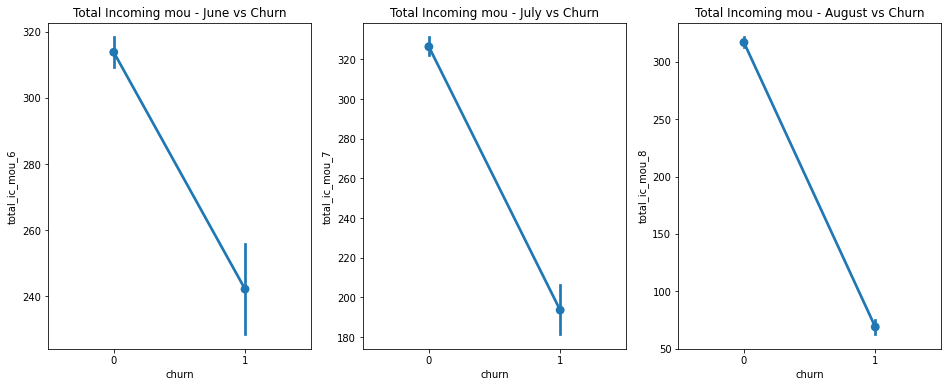

In [48]:
#total incoming mou - minutes of usage
monthly_pointplot("total_ic_mou","Total Incoming mou")

Inferences:
    - We see the data recharge amount is lower in the non churners
    - The total recharge amount is lower in non churners
    - We see the total outgoing mou for the non churners is decreasing with each month
    - We see the total incoming mou for the non churners is decreasing with each month
    

Comparing total recharg vs total minutes of usage. We start by calculating the totals of these variables across the months

In [49]:
data.columns[data.columns.map(lambda x: x.startswith('offnet_mou'))]

Index(['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'], dtype='object')

In [50]:
total_rech_col=data.columns[data.columns.map(lambda x: x.startswith('total_rech_amt'))]

In [51]:
data['total_mou'] = data['onnet_mou_6'] + data['onnet_mou_7'] + data['onnet_mou_8'] + data['offnet_mou_6'] + data['offnet_mou_7'] + data['offnet_mou_8'] + data['offnet_mou_8']
data['total_rech'] = data['total_rech_amt_6'] + data['total_rech_amt_7'] + data['total_rech_amt_8']

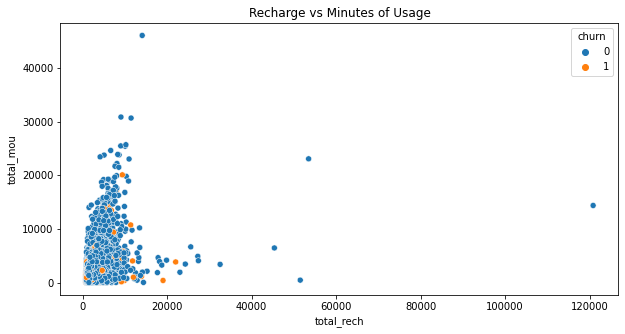

In [52]:
plt.figure(figsize=(10,5))
sns.scatterplot('total_rech', 'total_mou', data=data, hue='churn')
plt.title("Recharge vs Minutes of Usage")
plt.show()


#### We can see customers with lower recharge and lesser mous are more likely to churn. 

#### Recharge reduction vs Churn

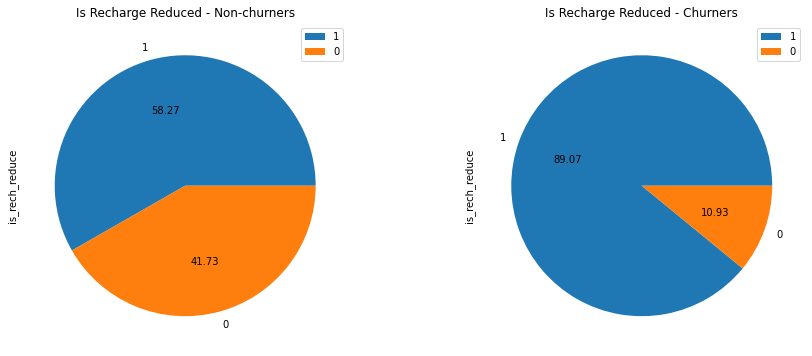

In [53]:

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
data[data["churn"] == 0]['is_rech_reduce'].value_counts(normalize=True).plot.pie(autopct='%.2f')
plt.title("Is Recharge Reduced - Non-churners")
plt.legend(loc="upper right")

plt.subplot(1,2,2)
data[data["churn"] == 1]['is_rech_reduce'].value_counts(normalize=True).plot.pie(autopct='%.2f')
plt.title("Is Recharge Reduced - Churners")
plt.legend(loc="upper right")
plt.show()


#### We can observe, 89% churners have shown reduction in recharge. So, this would be a very strong indicator of churning

#### Top correlations

Lets check the top 10 correlations based on spearman's coeifficient since we are interested in identifying monotonic relationship than linear.

In [54]:
#lets find the top 10 correlated features of the data set
# unstack - unstack the dataframe into proper indexes and sort this in descneding order
correlation_df = data.corr().abs().unstack().drop_duplicates().sort_values(ascending=False).dropna()
correlation_df = correlation_df[correlation_df !=1.0]
correlation_df.head(10)

arpu_8          total_rech_amt_8   0.9537
isd_og_mou_7    isd_og_mou_8       0.9413
arpu_6          total_rech_amt_6   0.9412
arpu_7          total_rech_amt_7   0.9371
isd_og_mou_6    isd_og_mou_8       0.9161
                isd_og_mou_7       0.9150
loc_ic_mou_6    total_ic_mou_6     0.8956
arpu_7          total_rech         0.8948
loc_ic_mou_8    total_ic_mou_8     0.8899
total_og_mou_7  total_mou          0.8870
dtype: float64

Lets also include the target variable here to check its correlation with these variables

<Figure size 1080x432 with 0 Axes>

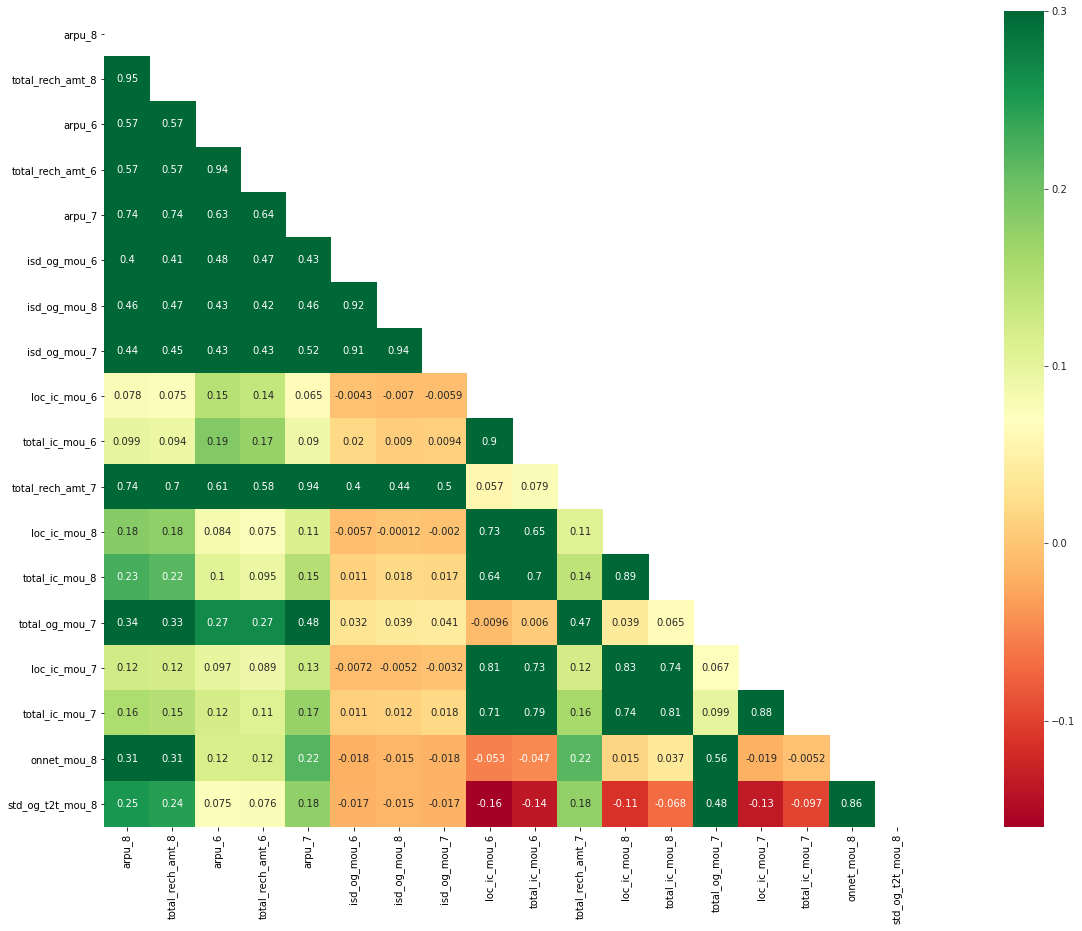

In [55]:
plt.figure(figsize=(15,6));
#pearson top 10
corr_col = ['arpu_8','total_rech_amt_8','arpu_6','total_rech_amt_6','arpu_7','isd_og_mou_6','isd_og_mou_8','isd_og_mou_7','loc_ic_mou_6','total_ic_mou_6','total_rech_amt_7','loc_ic_mou_8','total_ic_mou_8','total_og_mou_7','loc_ic_mou_7','total_ic_mou_7','onnet_mou_8','std_og_t2t_mou_8']

#corr_col = ['churn','roam_ic_mou_7','roam_ic_mou_8','roam_ic_mou_6','loc_ic_t2m_mou_8','loc_og_t2m_mou_8','loc_ic_t2m_mou_6','loc_ic_mou_8','arpu_8','loc_ic_t2m_mou_7','loc_og_t2m_mou_6','total_rech_amt_8','roam_og_mou_7','roam_og_mou_8','roam_og_mou_6','loc_og_mou_8','loc_ic_mou_6','total_ic_mou_8','loc_ic_mou_7','loc_og_mou_6']
corr = data[corr_col].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(30, 15))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,annot=True,cmap="RdYlGn")
plt.show()

From the heatmap of the top 10 correlated features, we can observe the following

1. There is highly linear relationship between usage patterns of different months. For example : loc_ic_mou_6 and loc_ic_mou_8 have correlation of 0.76 
2. We observe arpus are highly correlted to the recharge of that month. For example : arpu_6 and total_rech_amt_6 have correlation as high as 0.93
3. Columns such as total_ic_mous are related to loc_ic_mou, which could be because the local calls make up most of the total incoming calls.

Such correlations could lead to multi-collinearity in linear models. Methods such as PCA for linear models or usage of non-linear models is recommended since iterative removal of features causing multi-collinearity in linear models would be time consuming. 


### Outlier treatment

In [56]:
#removing target variable from outlier treatment
churn = data.pop('churn')

In [57]:
#Removing outliers
def remove_outlier(df,col,cvalue=0.95,fvalue=0.05):
    Q3 = df[col].quantile(cvalue)
    Q1 = df[col].quantile(fvalue)
    IQR = Q3 - Q1
    df = df[(df[col] >= (Q1 - 2.5*IQR)) & (df[col] <= (Q3 + 2.5*IQR))]
    return df


#cap outliers
def cap_floor_outlier(df,column,cvalue=0.95,fvalue=0.05):
    qvalue_c = df[column].quantile(cvalue)
    qvalue_f = df[column].quantile(fvalue)
    df[column] = np.where(df[column] > qvalue_c, qvalue_c,df[column])
    df[column] = np.where(df[column] < qvalue_f, qvalue_f,df[column])
    return df

Since removing outliers would mean loss of data, lets cap the outliers to the 95th percentile of the column. This should handle the extreme outliers while not altering the underlying data too much.

In [58]:

for i in data.columns:
     data = cap_floor_outlier(data,i)

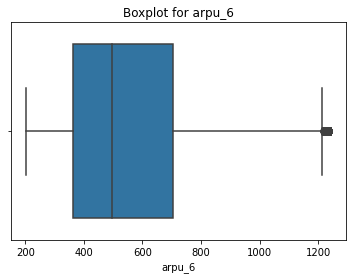

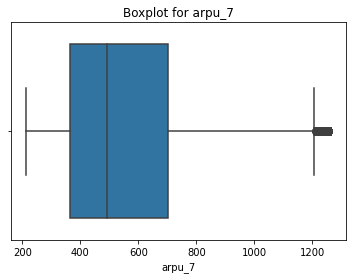

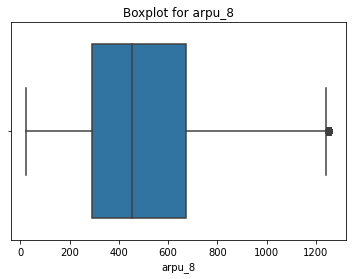

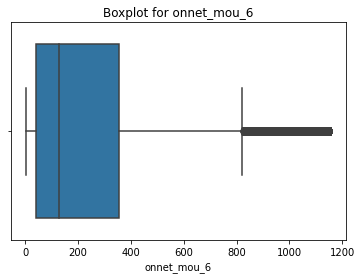

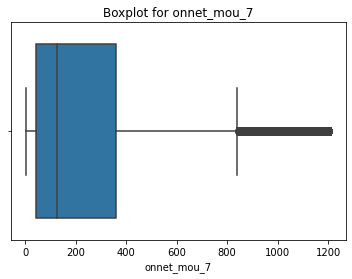

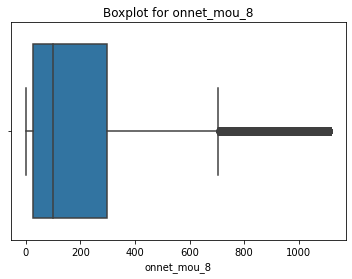

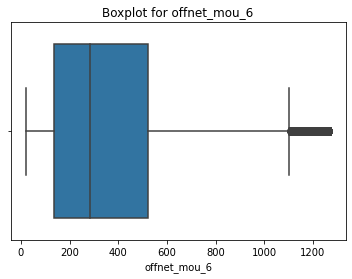

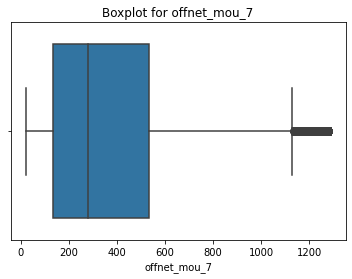

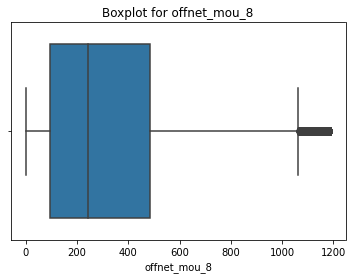

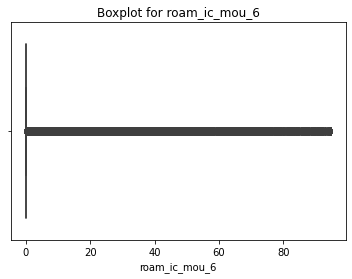

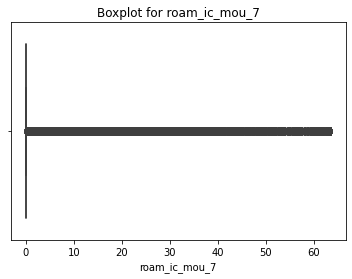

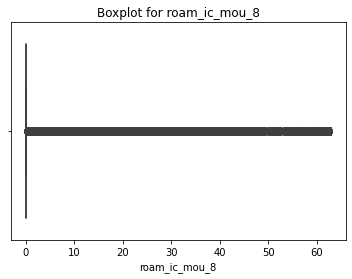

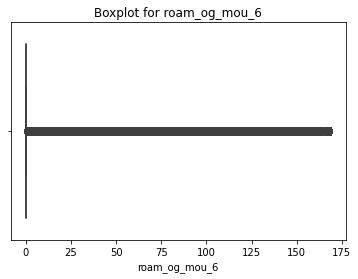

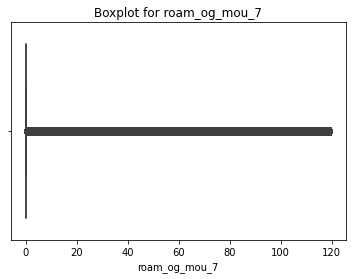

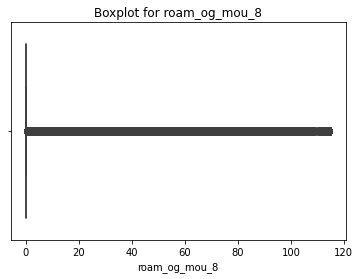

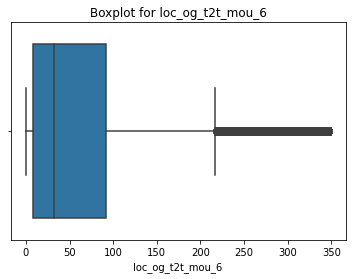

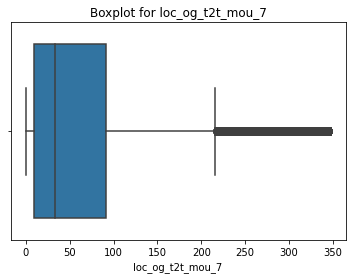

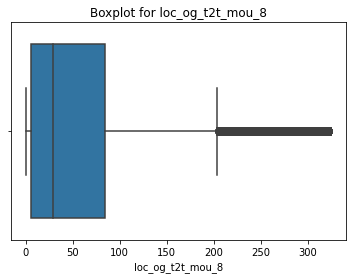

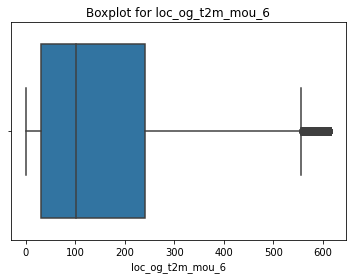

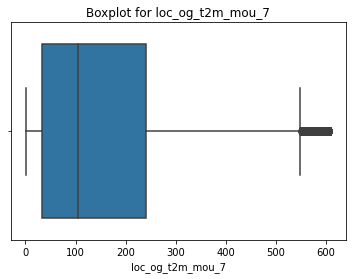

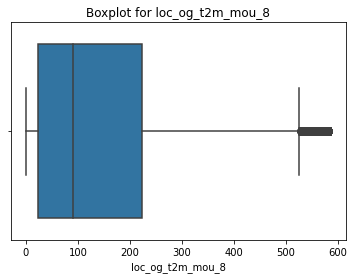

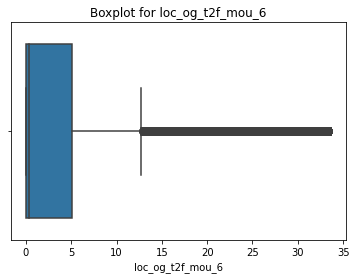

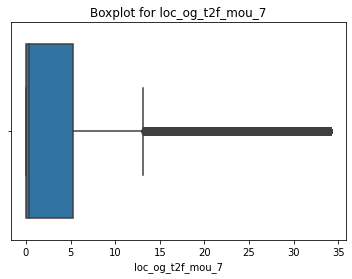

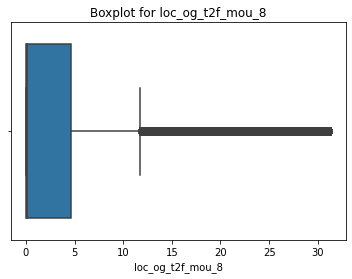

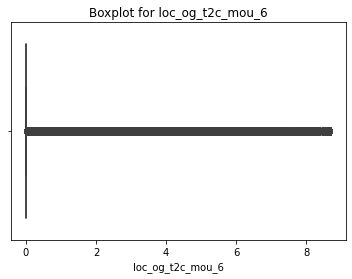

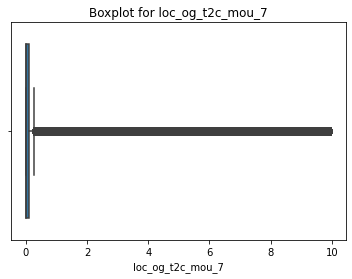

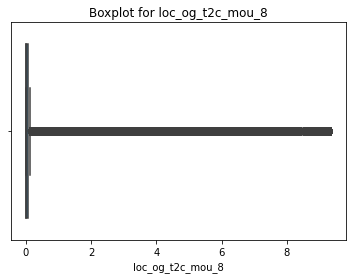

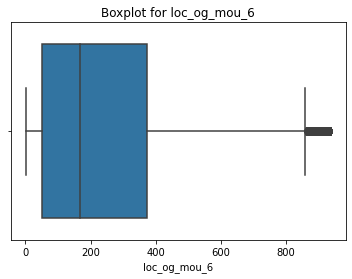

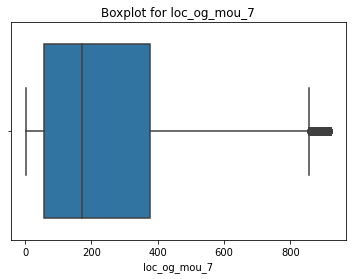

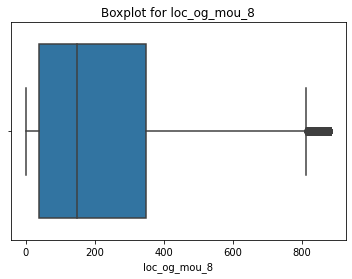

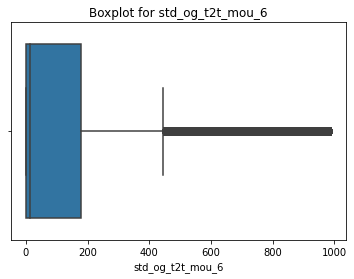

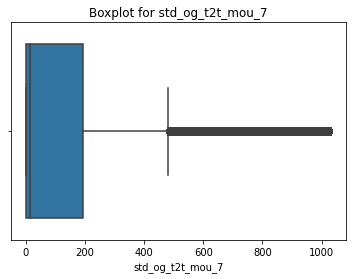

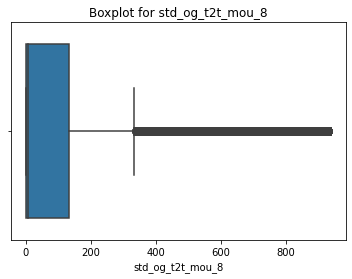

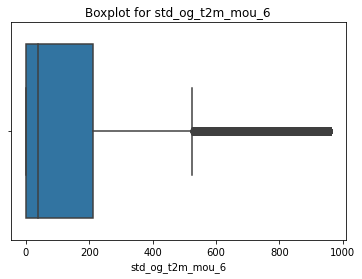

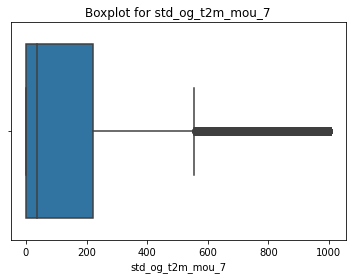

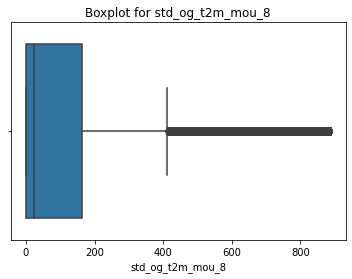

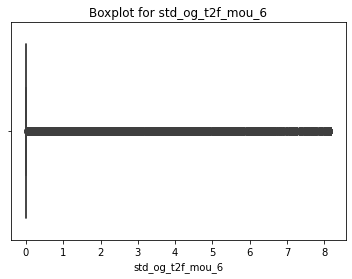

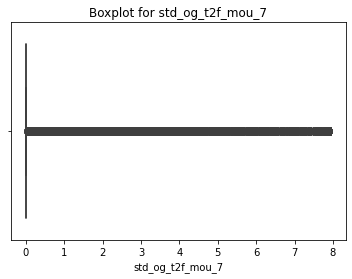

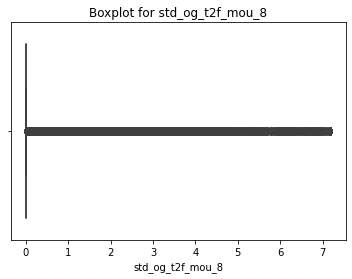

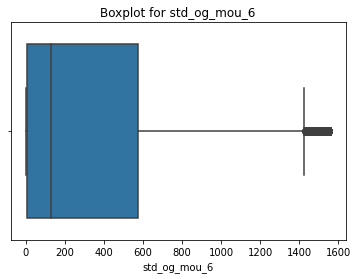

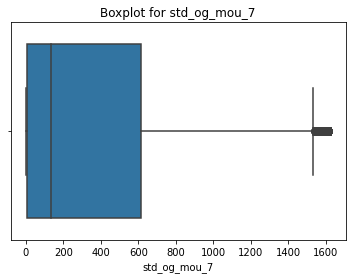

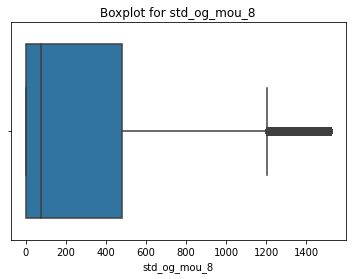

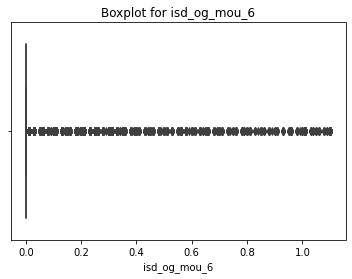

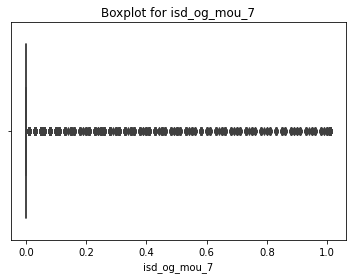

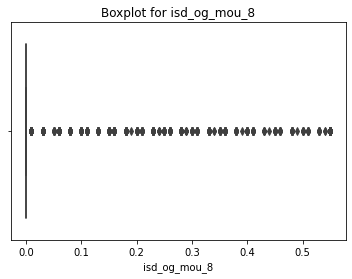

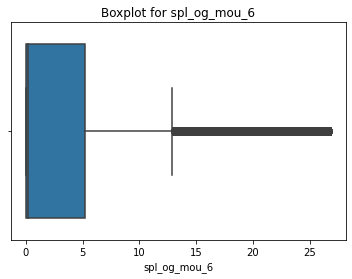

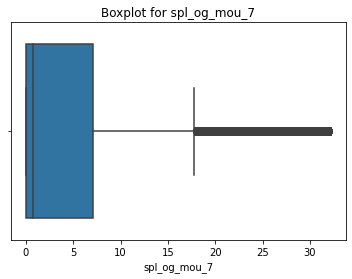

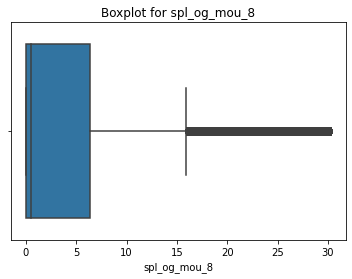

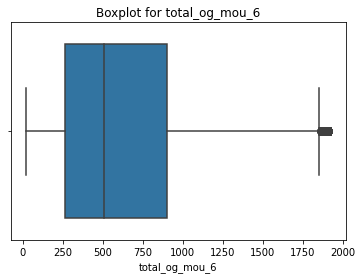

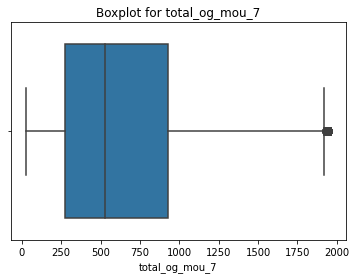

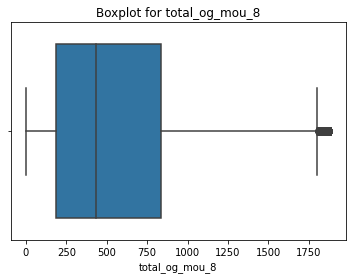

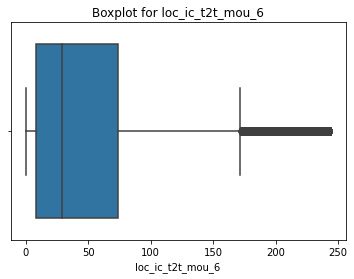

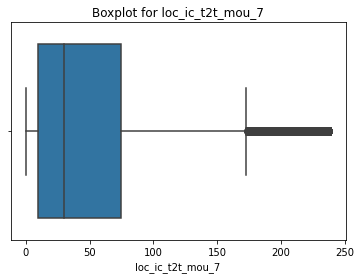

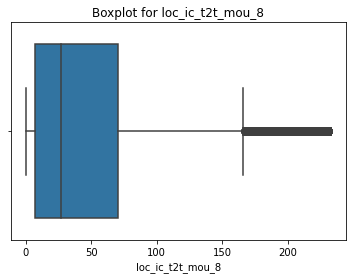

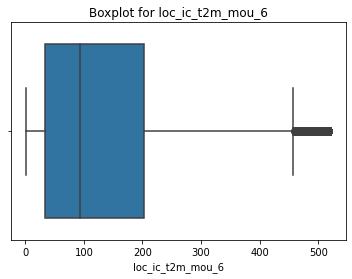

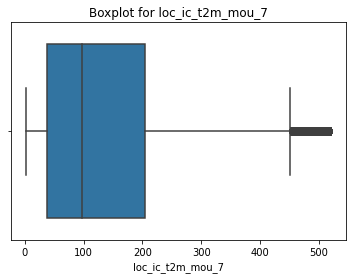

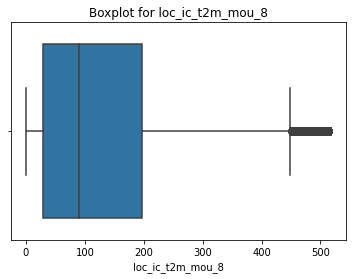

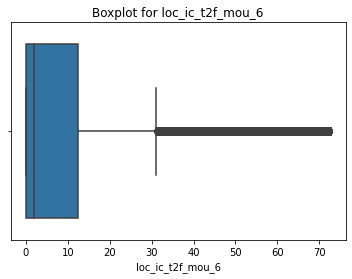

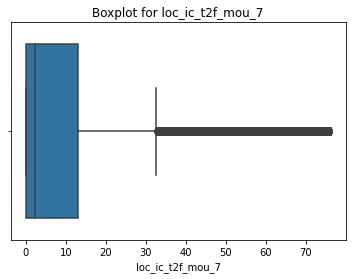

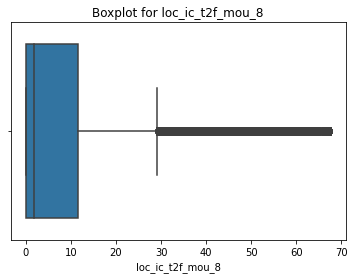

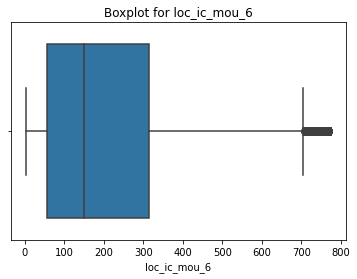

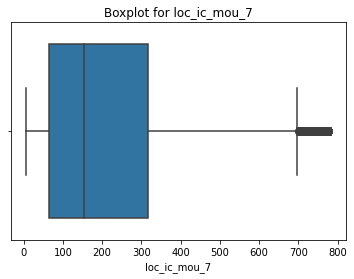

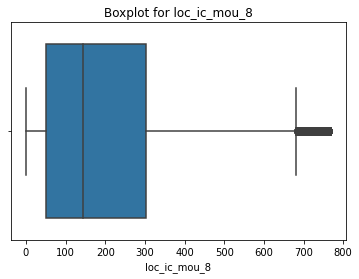

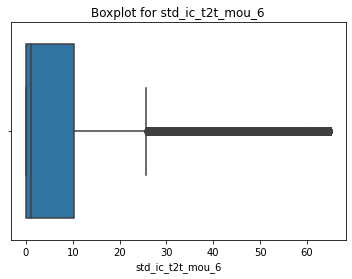

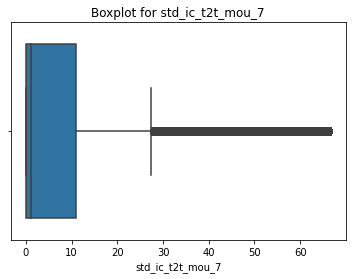

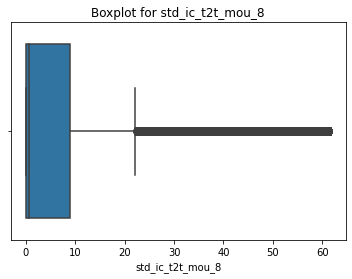

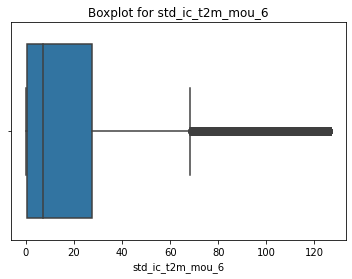

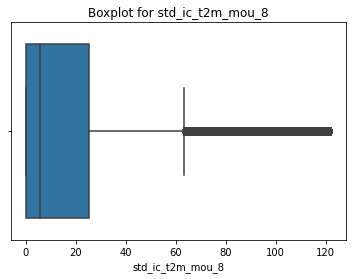

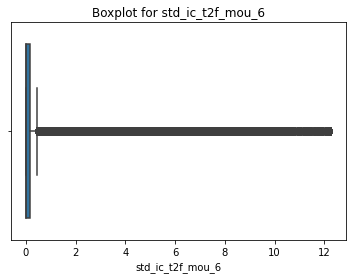

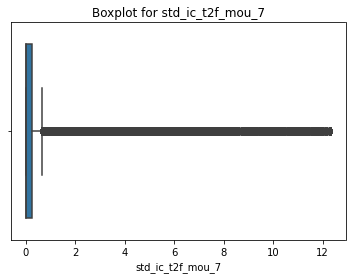

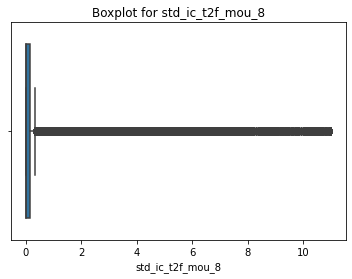

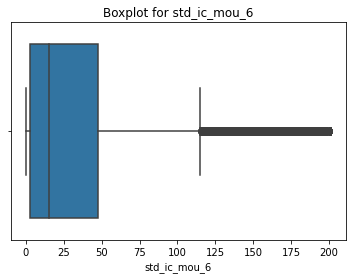

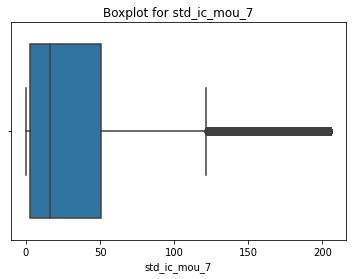

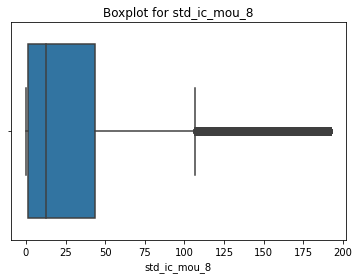

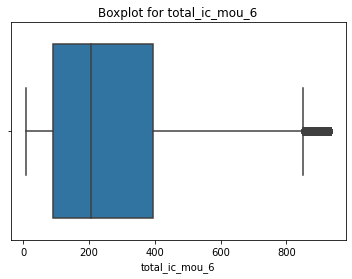

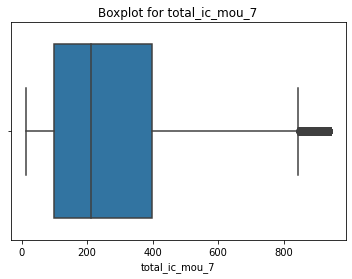

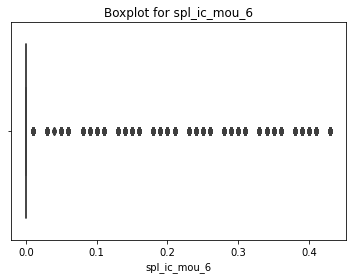

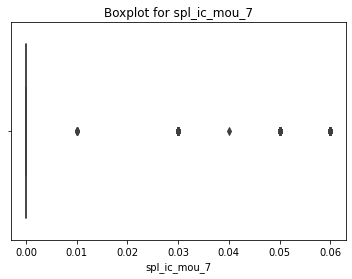

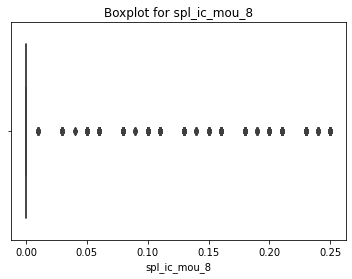

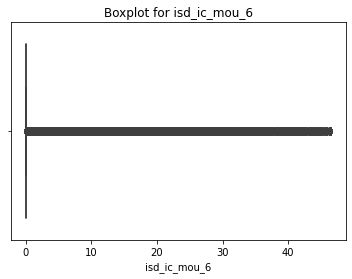

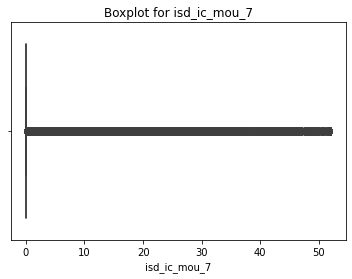

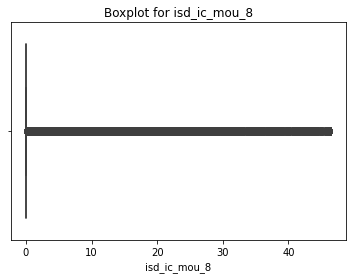

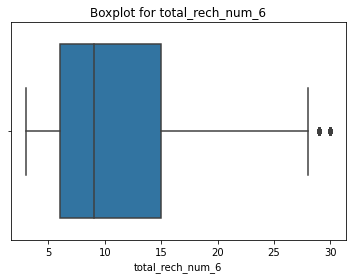

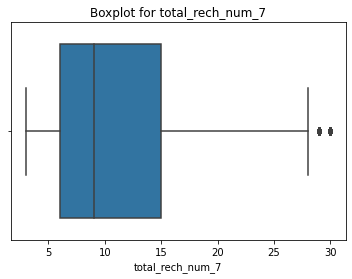

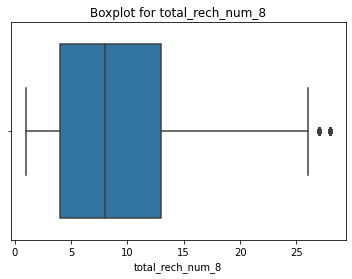

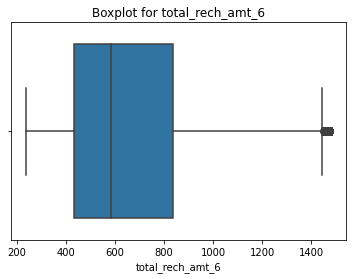

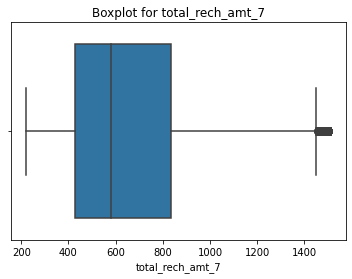

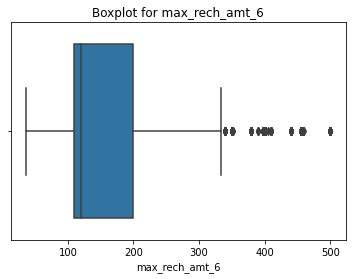

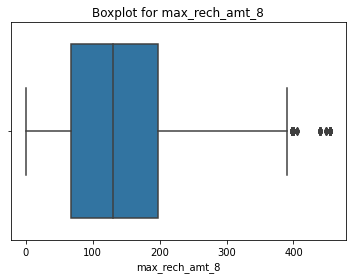

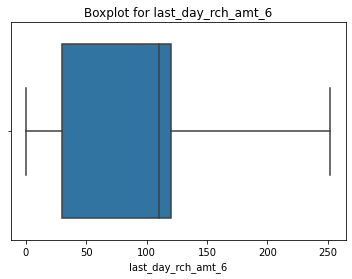

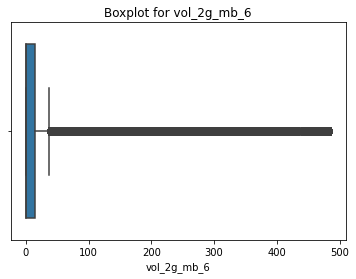

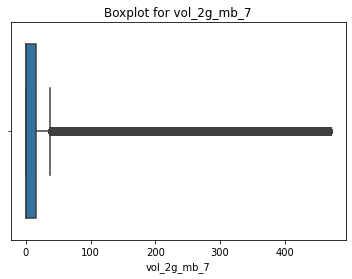

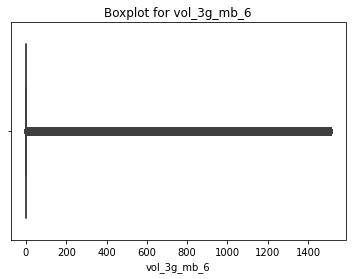

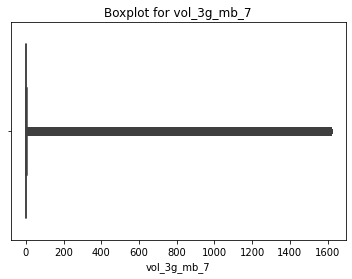

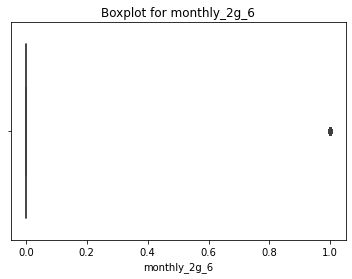

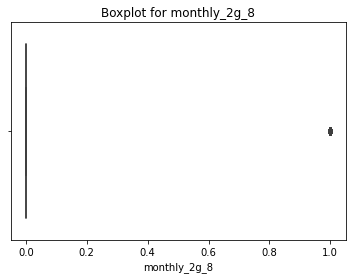

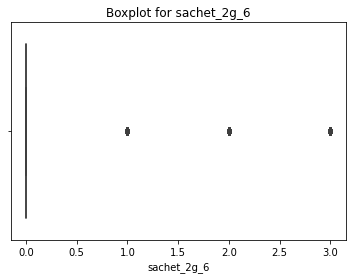

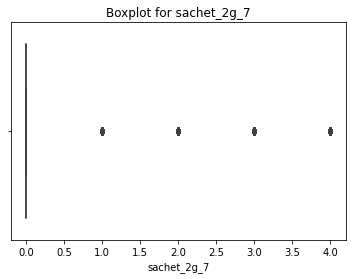

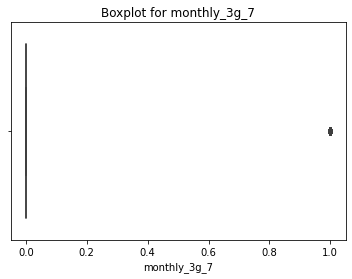

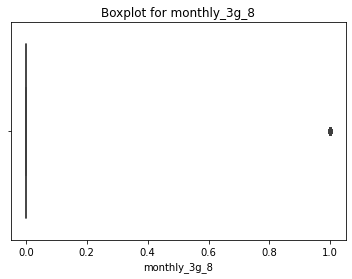

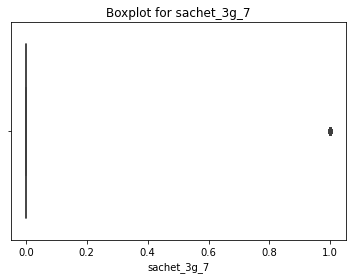

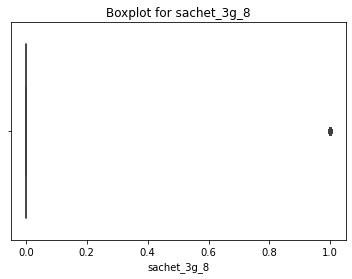

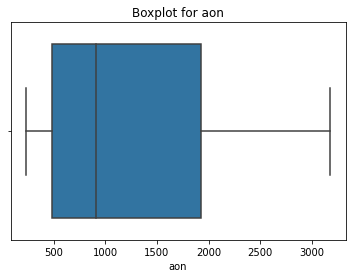

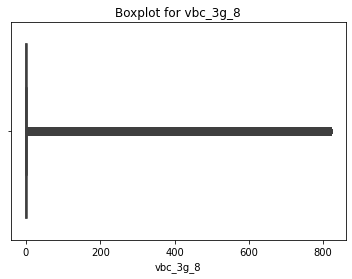

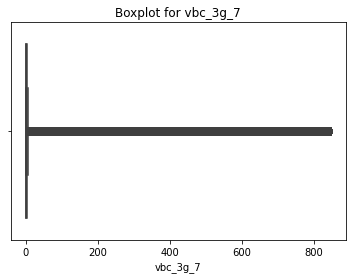

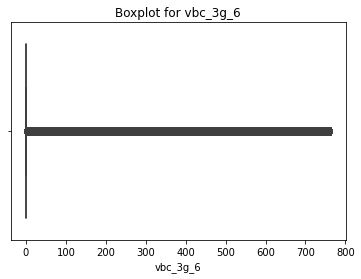

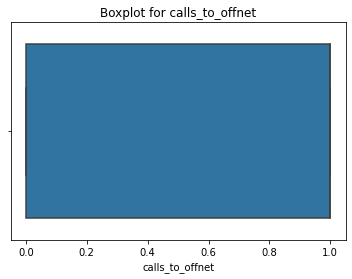

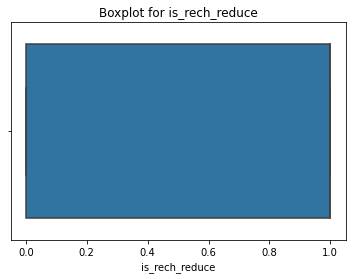

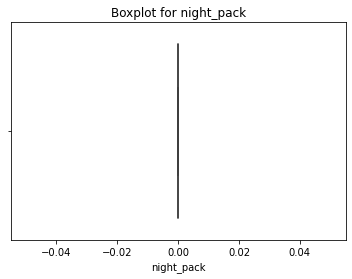

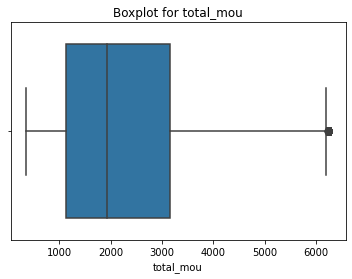

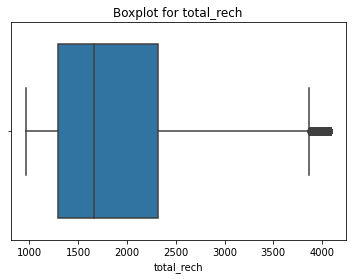

In [59]:
#lets check for the distribution of the data using boxplot
for i in data.columns:
    sns.boxplot(data[i])
    plt.title("Boxplot for " + i)
    plt.show()

We can observe we don't have extreme outliers anymore

Lets look at the split between churn and non-churn customers

In [60]:
churn.value_counts()

0    27390
1     2589
Name: churn, dtype: int64

#### Data Imbalance

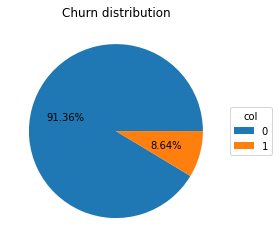

In [61]:
wedges, texts, autotexts = plt.pie(churn.value_counts(),autopct = "%0.2f%%")
plt.title("Churn distribution")
plt.legend(wedges, churn.value_counts().index,
          title="col",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

We can see the percentage of churned customers is just 8.64%. The data is highly imbalanced. We will have to take appropriate measures to handle this

## Data Preparation

Since our data is heavily imbalanced, we will be using F1 score as a reference for hyperparameter tuning. F1 score is the harmonic mean of precision and recall and is the go-to metric when it comes to imbalance problems. In cases like these, accuracy can be a misleading metric and we will give less importance to accuracy during our model building and evaluation.

### Utility functions for evaluation metrics

1. Confusion Matrix
2. Precision
3. Recall/Sensitivity
4. F1 Score
5. ROCA/AUC Curve
6. False Positive Rate
7. True Positive Rate

In [62]:
from sklearn import metrics
from sklearn.metrics import plot_roc_curve

In [63]:
#functions to compute confusion matrix and other metrics
def convert_percentage(val):
      return round(val*100,2)
    
def classifier_metrics(churned,predicted):
    confusion = metrics.confusion_matrix(churned,predicted)
    #print("Confusion Matrix",confusion,sep="\n")
        
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    
    #using heatmap to visualize confusion matrix
    sns.heatmap(confusion,annot=True,fmt=".0f",cmap="Blues");
    plt.title("Confusion Matrix cut off")
    plt.xlabel("Predicted");
    plt.ylabel("Actual");
    plt.show();
    
        
    print("-----------------------------------------------------------------------------------------")
    #sensitivty/recall
    sensitivity = TP / float(TP+FN)
    print("\033[1m")
    print("Recall/Sensitivity - ",sensitivity)
    print("\033[0m")
    
    print(convert_percentage(sensitivity),"% of the positive cases have been predicted correctly")
    
        
    print("-----------------------------------------------------------------------------------------")
        
    #miss rate
    missrate = FN / float(FN+TP)
    print("Miss Rate - ",missrate)
    print(convert_percentage(missrate),"% of missed true positives")
    
    print("-----------------------------------------------------------------------------------------")
    #f1 score
    f1score = metrics.f1_score(churned,predicted)
    print("F1 score -",f1score)
    
    print("-----------------------------------------------------------------------------------------")
    #precision
    precision = metrics.precision_score(churned,predicted)
    print("Precision - ",precision)
    print(convert_percentage(precision),"% of the positive instances correctly predicted as positive")
      
    print("-----------------------------------------------------------------------------------------")

    
    #accuracy
    accuracy = metrics.accuracy_score(churned,predicted)
    print("Accuracy -",accuracy)
    
    print("-----------------------------------------------------------------------------------------")
    
    #specificity
    specificity = TN / float(TN+FP)
    print("Specificity - ",specificity)
    print(convert_percentage(specificity),"% of the negative cases have been predicted correctly")
    
    print("-----------------------------------------------------------------------------------------")
    
    #false positive rate
    fpr = FP/ float(TN+FP)
    print("False Positive Rate - ",fpr)
    print(convert_percentage(fpr),"% of the negative instances incorrectly classified as positive")
    
    print("-----------------------------------------------------------------------------------------")


In [64]:
#function to plot the sensitivity, specificity and accuracy for different probability cut offs
def cutoff_plot(y_train,X_train,model):	
    y_train_predprob = model.predict_proba(X_train)[:,1]
    
    #dataframe with actual converted flag and predicted probabilities
    y_train_pred_final = pd.DataFrame({'Churned':y_train.values, 'Churn_Prob':y_train_predprob})
    #y_train_pred_log.head()
    
    #creating columns for different probability cut off
    numbers = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in numbers:
        y_train_pred_final[i] = y_train_pred_final.Churn_Prob.map(lambda x : 1 if x>i else 0)
    
    #evaluation metrics for different cutoffs
    cutoff_df = pd.DataFrame(columns=['prob','accuracy','sensitivity','specificity'])
    
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives
    
    for i in numbers:
        cm1 = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'],grid=True,figsize=(10,6));
    plt.title("Metrics across different cut-offs")
    plt.show();
    return y_train_pred_final

### Test-Train Split

In [65]:
#importing required libraries
from sklearn.model_selection import train_test_split

In [66]:
#store target variable in y
y = churn
y.head()

7     1
8     0
13    0
16    0
17    0
Name: churn, dtype: int64

In [67]:
#store rest of the dataset in X model building
X = data
X.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8       aon  vbc_3g_8  vbc_3g_7  vbc_3g_6  calls_to_offnet  is_rech_reduce  night_pack  total_mou  total_rech
7  1069.1800 1261.8484 1258.7033      57.8400      54.6800      52.2900      453.4300      567.1600      325.9100        16.2300        33.4900        31.6400        23.7400        12.5900        38.0600           51.3900           31.3800           40.2800          308.6300          447.3800          162.2800           33.5830           34.0950           31.2860            0.0000            0.0000            0.0000      422.1600      533.9100      255.7900            4.3000           23.2900           12.0100           49.8900           31.7600           49.1400            6.6600            7.9300            7.1800       60.8600       75.1400       77.8400        0.0000        0.1800        0.5500        4.5000        0.0000        6.5000        487.5300        609.2400        350.1600           58.1400           32.2600           27.3100          217.5600          221.4900          121.1900           72.6350           76.0910           39.5300      427.8800      355.2300      188.0400           36.8900           11.8300           30.3900           91.4400          126.9900          121.8630           12.2400           12.3100           10.9800      180.5400      173.0800      191.9350        626.4600        558.0400        428.7400        0.2100        0.0000        0.0000        2.0600       14.5300       31.5900            5.0000            5.0000            7.0000         1480.0000          790.0000         1494.1000        500.0000        500.0000        455.0000              0.0000              0.0000            252.0000       0.0000       0.0000       0.0000       0.0000       0.0000       0.0000        0.0000        0.0000        0.0000       0.0000       0.0000       0.0000        0.0000        0.0000        0.0000       0.0000       0.0000       0.0000  802.0000   57.7400   19.3800   18.7400           1.0000          0.0000      0.0000  1837.2200   4083.4000
8   378.7210  492.2230  137.3620     413.6900     351.0300      35.0800       94.6600       80.6300      136.4800         0.0000         0.0000         0.0000         0.0000         0.0000         0.000

Here we choose stratify y so as to maintain the same class imbalance across both test and train datasets

In [68]:
#split X and y into train and test set with 70:30 split between train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100,stratify=y)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(20985, 123) (8994, 123) (20985,) (8994,)


### Scaling the variables using Standard Scaler

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [70]:
#Here, we can observe all the columns are numeric. So we can perform the scaling on the entire dataset
col = data.columns

In [71]:
#using Normalization to scale all the numeric features. 
#fit transform on the train data set
X_train[col] = scaler.fit_transform(X_train[col])


#transform the test set using the scaler
X_test[col] = scaler.transform(X_test[col])

In [72]:
#lets use describe command to check if variables have been scaled properly
X_train.describe()

arpu_6     arpu_7     arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8        aon   vbc_3g_8   vbc_3g_7   vbc_3g_6  calls_to_offnet  is_rech_reduce  night_pack  total_mou  total_rech
count 20985.0000 20985.0000 20985.0000   20985.0000   20985.0000   20985.0000    20985.0000    20985.0000    20985.0000     20985.0000     20985.0000     20985.0000     20985.0000     20985.0000     20985.0000        20985.0000        20985.0000        20985.0000        20985.0000        20985.0000        20985.0000        20985.0000        20985.0000        20985.0000        20985.0000        20985.0000        20985.0000    20985.0000    20985.0000    20985.0000        20985.0000        20985.0000        20985.0000        20985.0000        20985.0000        20985.0000        20985.0000        20985.0000        20985.0000    20985.0000    20985.0000    20985.0000    20985.0000    20985.0000    20985.0000    20985.0000    20985.0000    20985.0000      20985.0000      20985.0000      20985.0000        20985.0000        20985.0000        20985.0000        20985.0000        20985.0000        20985.0000        20985.0000        20985.0000        20985.0000    20985.0000    20985.0000    20985.0000        20985.0000        20985.0000        20985.0000        20985.0000        20985.0000        20985.0000        20985.0000        20985.0000        20985.0000    20985.0000    20985.0000    20985.0000      20985.0000      20985.0000      20985.0000    20985.0000    20985.0000    20985.0000    20985.0000    20985.0000    20985.0000        20985.0000        20985.0000        20985.0000        20985.0000        20985.0000        20985.0000      20985.0000      20985.0000      20985.0000          20985.0000          20985.0000          20985.0000   20985.0000   20985.0000   20985.0000   20985.0000   20985.0000   20985.0000    20985.0000    20985.0000    20985.0000   20985.0000   20985.0000   20985.0000    20985.0000    20985.0000    20985.0000   20985.0000   20985.0000   20985.0000 20985.0000 20985.0000 20985.0000 20985.0000       20985.0000      20985.0000  20985.0000 20985.0000  20985.0000
mean     -0.0000    -0.0000    -0.0000      -0.0000      -0.0000       0.0000       -0.0000        0.0000        0.0000         0.0000         0.0000         0.0000        -0.0000       

We observe the mean is 0 and standard deviation is 1 for all the columns. This means the standardization has been done successfully. Since we will be performing PCA on the dataset, it is very important to standardize the features.

In [73]:
#class distribution in train set
y_train.value_counts(normalize=True)

0   0.9137
1   0.0863
Name: churn, dtype: float64

In [74]:
#class distribution in test set
y_test.value_counts(normalize=True)

0   0.9136
1   0.0864
Name: churn, dtype: float64

We can observe the class imbalance is maintained equally in both train and test set

### Dimensionality reduction

Lets use PCA to reduce the dimensions in the dataset. Since we have handled the outliers and also standardized the features, we can proceed with it.

In [75]:
from sklearn.decomposition import PCA

In [76]:
pca = PCA()

In [77]:
#fit PCA with training data
X_train_pca = pca.fit(X_train)

In [78]:
#looking at the PCA components
pca.components_

array([[ 7.84917778e-02,  8.95105032e-02,  1.10225455e-01,
        -2.39749723e-02, -2.11815174e-02, -2.84313218e-03,
         6.12098169e-02,  6.45051683e-02,  8.64321696e-02,
         1.48438003e-03, -5.86757332e-03, -7.24263940e-04,
        -1.40792335e-02, -2.13572215e-02, -1.14618686e-02,
         1.33465923e-01,  1.38968519e-01,  1.44451145e-01,
         1.68148864e-01,  1.75204817e-01,  1.79062910e-01,
         1.18898321e-01,  1.20828113e-01,  1.22412472e-01,
        -3.41987734e-04, -4.73815214e-03,  5.78378287e-03,
         1.79311719e-01,  1.88051441e-01,  1.89811745e-01,
        -7.92328906e-02, -7.65195254e-02, -6.18479498e-02,
        -5.00925222e-02, -4.71042941e-02, -3.12651973e-02,
         6.38305032e-02,  6.61367618e-02,  6.87608805e-02,
        -8.35252526e-02, -7.95424314e-02, -5.86057385e-02,
         3.07587145e-02,  2.96202147e-02,  3.78073267e-02,
        -1.24594473e-03, -8.24697657e-03,  6.99635345e-03,
         2.47499938e-02,  2.85262149e-02,  5.29195124e-0

Lets make a screeplot to visualize the cumulative explained variance vs no. of components to decide on the number of components required

In [79]:
#printing the cumulative explained variance 
var_cumu = np.cumsum(pca.explained_variance_ratio_)
for i in range(0,len(var_cumu)):
    print(i,":",var_cumu[i])

0 : 0.13895734755914374
1 : 0.24659832871241483
2 : 0.30886586569663543
3 : 0.35860813893997145
4 : 0.4010986781113971
5 : 0.44211747090200115
6 : 0.4749209564638433
7 : 0.5038630596450485
8 : 0.5295740958501345
9 : 0.5536943606423227
10 : 0.5755355887053326
11 : 0.5956106798350649
12 : 0.6143411040926537
13 : 0.631716257216391
14 : 0.6472749107237566
15 : 0.6626122313043341
16 : 0.6766255908468246
17 : 0.6894542558525752
18 : 0.7014209787476801
19 : 0.7128254213265144
20 : 0.7233777376116832
21 : 0.733123257207553
22 : 0.7424471161143994
23 : 0.7513156508827405
24 : 0.7598160511488623
25 : 0.768059608412337
26 : 0.7758039091091649
27 : 0.7831050461040832
28 : 0.790371004015918
29 : 0.7973363287245796
30 : 0.804104215653364
31 : 0.8105505478236908
32 : 0.8168607144810037
33 : 0.8229713982051171
34 : 0.8289033278640996
35 : 0.8346910997484733
36 : 0.8404639463769488
37 : 0.8461521286239445
38 : 0.8517683280751707
39 : 0.8568848900784382
40 : 0.8618523928298361
41 : 0.8667614428623623
42

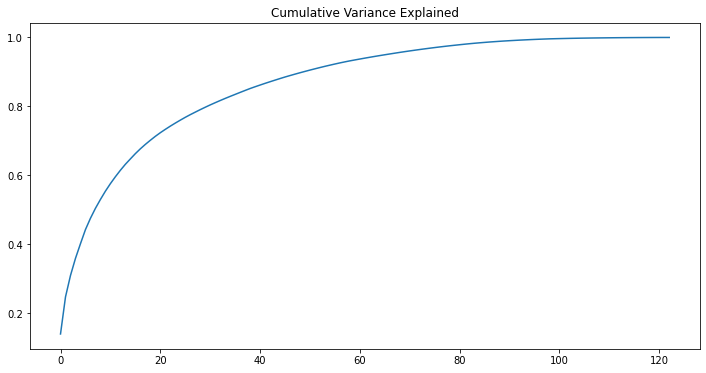

In [80]:
#plotting cumulative variance explained
fig = plt.figure(figsize=(12,6))
plt.plot(var_cumu)
plt.title("Cumulative Variance Explained")
plt.show()

Here we observe,
- 65 components -> ~95% variance explained
- 81 components -> 98% variance explained.

Lets choose 81 as the number of components for PCA

In [81]:
#performing incremental pca with chosen number of components. Incremental PCA hanldes memory better than class PCA
from sklearn.decomposition import IncrementalPCA

pca = IncrementalPCA(n_components=81)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

### Handling Class imbalance

At the data visualization step, we observed there is a high data imbalance in the data set. To handle this, we will be following the below steps:
    
1. Stratified sampling was used while splitting train and test data so the distribution of the classes between target variables is maintained
2. Stratified KFold version of the KFold method will be used to perform stratified sampling to maintain the class distribution between the folds for grid search cross validation
3. We will also be setting class weight so the model penalizes the mistakes in minority class more than the majority class.
4. We will focus on metrics such as F1, Recall/Sensitivity and Precision instead of Accuracy since it could be a misleading metric when the dataset is highly imbalanced.

## Model Building

Since we have performed PCA, we lose on the interpretability of the model. So, we will build two models - one for predicting churn and the other to identify the top variables

### i) Predict Churn

### Model 1 : Logistic Regression

The data is imbalanced here we will hence use StratifiedKFold which is a version of kfold that preserves the imbalance in the folds. Internally it does stratification or stratified sampling to ensure this. 

We will also define the class weight to provide a weight or bias for each of the class in target variable.

To gridsearch, we will send in the intercept of the logistic model and penalty as hyper paramters to be tuned

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV
sk = StratifiedKFold(n_splits=5, random_state=4, shuffle=True)

lr = LogisticRegression(class_weight={0:0.1, 1: 0.9})
param_grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge


# Create grid search object

clf = GridSearchCV(estimator=lr, param_grid = param_grid, cv = sk,scoring='f1', verbose=True, n_jobs=-1)


# Fit on data

best_clf = clf.fit(X_train_pca,y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    6.9s finished


In [83]:
#look at the chosen estimator and its optimum parameters
best_log = best_clf.best_estimator_
best_log

LogisticRegression(C=0.1, class_weight={0: 0.1, 1: 0.9}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

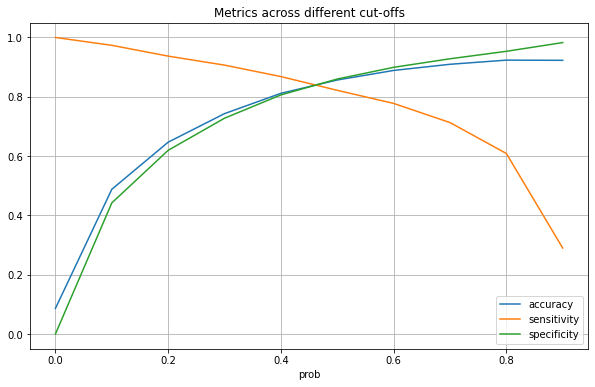

Churned  Churn_Prob  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0            0      0.8266  1    1    1    1    1    1    1    1    1    0
1            0      0.2861  1    1    1    0    0    0    0    0    0    0
2            1      0.7867  1    1    1    1    1    1    1    1    0    0
3            0      0.4164  1    1    1    1    1    0    0    0    0    0
4            0      0.0156  1    0    0    0    0    0    0    0    0    0
...        ...         ... ..  ...  ...  ...  ...  ...  ...  ...  ...  ...
20980        0      0.0974  1    0    0    0    0    0    0    0    0    0
20981        0      0.0304  1    0    0    0    0    0    0    0    0    0
20982        0      0.2141  1    1    1    0    0    0    0    0    0    0
20983        0      0.0832  1    0    0    0    0    0    0    0    0    0
20984        0      0.0326  1    0    0    0    0    0    0    0    0    0

[20985 rows x 12 columns]

In [84]:
#plotting metrics across different probabilities
cutoff_plot(y_train,X_train_pca,best_log)

Since cut off is aorund 0.5, lets make use of that to make the predictions

In [85]:
#lets predict on train dataset with optimal cutoff probability
y_train_predprob = best_log.predict_proba(X_train_pca)[:,1]
y_train_pred = pd.DataFrame({'Churned':y_train.values, 'Churn_Prob':y_train_predprob})
y_train_pred["Predicted"] = y_train_pred.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred.head()

Churned  Churn_Prob  Predicted
0        0      0.8266          1
1        0      0.2861          0
2        1      0.7867          1
3        0      0.4164          0
4        0      0.0156          0

#### Evaluation metrics for logistic regression model

In [86]:
classifier_metrics(y_train_pred["Churned"],y_train_pred["Predicted"])

-----------------------------------------------------------------------------------------

Recall/Sensitivity -  0.8217439293598234

82.17 % of the positive cases have been predicted correctly
-----------------------------------------------------------------------------------------
Miss Rate -  0.1782560706401766
17.83 % of missed true positives
-----------------------------------------------------------------------------------------
F1 score - 0.4973279893119572
-----------------------------------------------------------------------------------------
Precision -  0.3565613026819923
35.66 % of the positive instances correctly predicted as positive
-----------------------------------------------------------------------------------------
Accuracy - 0.8565642125327615
-----------------------------------------------------------------------------------------
Specificity -  0.8598550044333176
85.99 % of the negative cases have been predicted correctly
----------------------------------------

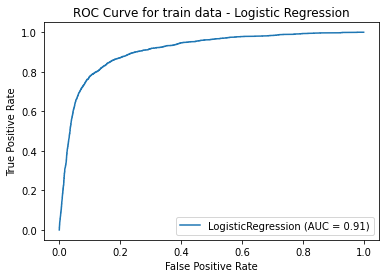

In [87]:
#ROC for train data
plot_roc_curve(best_log, X_train_pca, y_train)
plt.title("ROC Curve for train data - Logistic Regression");

In [88]:
#making predictions on test set with the logistic regression model
y_test_predprob = best_log.predict_proba(X_test_pca)[:,1]
y_test_pred = pd.DataFrame({'Churned':y_test.values, 'Churn_Prob':y_test_predprob})
y_test_pred["Predicted"] = y_test_pred.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred.head()

Churned  Churn_Prob  Predicted
0        0      0.6951          1
1        0      0.7661          1
2        0      0.0676          0
3        0      0.0784          0
4        1      0.6671          1

In [89]:
#evaluation metrics for test set - logistic Regression
classifier_metrics(y_test_pred["Churned"],y_test_pred["Predicted"])

-----------------------------------------------------------------------------------------

Recall/Sensitivity -  0.7863577863577863

78.64 % of the positive cases have been predicted correctly
-----------------------------------------------------------------------------------------
Miss Rate -  0.21364221364221364
21.36 % of missed true positives
-----------------------------------------------------------------------------------------
F1 score - 0.4923448831587429
-----------------------------------------------------------------------------------------
Precision -  0.35835777126099705
35.84 % of the positive instances correctly predicted as positive
-----------------------------------------------------------------------------------------
Accuracy - 0.8599066044029353
-----------------------------------------------------------------------------------------
Specificity -  0.866861384933674
86.69 % of the negative cases have been predicted correctly
---------------------------------------

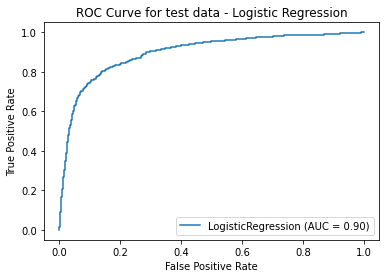

In [90]:
#plot ROC for test data
plot_roc_curve(best_log, X_test_pca, y_test)
plt.title("ROC Curve for test data - Logistic Regression");

### Model 2 : Random Forest

Since the data is imbalanced, the chances of random forest overfitting is quite high. To ensure this, we will tune max_depth and min_samples leaf that would control the model from overfitting.


Here again, we are making use of StratifiedKfold to maintain class distribution between the folds. We have also assigned class weight manually based on the class distribution.


Due to the large size of the dataset, grid search would take a long time if we tried tuning all hyper parameters at once. Lets tune the parameters one by one.

#### Tuning max_depth hyperparameter

In [91]:
from sklearn.ensemble import RandomForestClassifier

sk = StratifiedKFold(n_splits=5, random_state=4, shuffle=True)
max_depth = [10,15,20,25,30]
#min_samples_leaf = [5,10,15,20,25]
param_grid = {'max_depth': max_depth}

rf = RandomForestClassifier(class_weight={1:0.90,0:0.10})
rf_grid = GridSearchCV(estimator=rf, 
                       param_grid=param_grid, 
                       cv=sk, scoring='f1', 
                       n_jobs=-1,
                       return_train_score=True, 
                       verbose=1
                      )
rf_grid.fit(X_train_pca,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  4.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                 

In [92]:
#saving the best estimator as defined by the grid search cv
rf_grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.1, 1: 0.9}, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [93]:
#saving the optimum value for max_depth parameter for random forest. This defines the max depth of a decision tree in the random forest ensemble
max_depth = rf_grid.best_estimator_.max_depth
print("Optimum value for max_depth is - ",max_depth)

Optimum value for max_depth is -  10


#### Tuning min_samples_leaf hyperparameter

In [94]:
sk = StratifiedKFold(n_splits=5, random_state=4, shuffle=True)

min_samples_leaf = [5,10,15,20,25]
param_grid = {'min_samples_leaf':min_samples_leaf}

rf = RandomForestClassifier(class_weight={1:0.90,0:0.10},max_depth=max_depth)
rf_grid = GridSearchCV(estimator=rf, 
                       param_grid=param_grid, 
                       cv=sk, scoring='f1', 
                       n_jobs=-1,
                       return_train_score=True, 
                       verbose=1
                      )
rf_grid.fit(X_train_pca,y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  3.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                   

In [95]:
#saving the optimum min_samples_leaf for random forest. This defines the minimum number of samples in leaf beyond which it can't be split.
min_samples_leaf = rf_grid.best_estimator_.min_samples_leaf
print("Optimum value for min_samples_leaf is - ",min_samples_leaf)

Optimum value for min_samples_leaf is -  15


In [96]:
#fitting  the random forest training set
rf = RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, criterion='gini',
                       max_depth=30, min_samples_leaf=20,
                       n_estimators=200, n_jobs=-1)
rf.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.1, 1: 0.9}, criterion='gini',
                       max_depth=30, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=20,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=-1, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

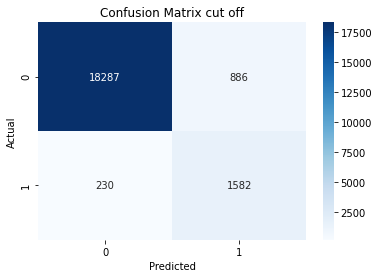

-----------------------------------------------------------------------------------------

Recall/Sensitivity -  0.8730684326710817

87.31 % of the positive cases have been predicted correctly
-----------------------------------------------------------------------------------------
Miss Rate -  0.12693156732891833
12.69 % of missed true positives
-----------------------------------------------------------------------------------------
F1 score - 0.7392523364485982
-----------------------------------------------------------------------------------------
Precision -  0.6410048622366289
64.1 % of the positive instances correctly predicted as positive
-----------------------------------------------------------------------------------------
Accuracy - 0.946819156540386
-----------------------------------------------------------------------------------------
Specificity -  0.9537891827048454
95.38 % of the negative cases have been predicted correctly
-----------------------------------------

In [97]:
#prediction on train dataset
best_rf = rf
y_train_pred = best_rf.predict(X_train_pca)
classifier_metrics(y_train,y_train_pred)

In [98]:
#plot ROC curve for random forest - training set
plot_roc_curve(rf_grid.best_estimator_, X_train_pca, y_train, name="Train ROC curve")
plt.title("ROC Curve for Random Forest - Training data")

Text(0.5, 1.0, 'ROC Curve for Random Forest - Training data')

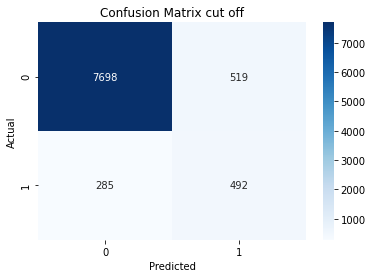

-----------------------------------------------------------------------------------------

Recall/Sensitivity -  0.6332046332046332

63.32 % of the positive cases have been predicted correctly
-----------------------------------------------------------------------------------------
Miss Rate -  0.3667953667953668
36.68 % of missed true positives
-----------------------------------------------------------------------------------------
F1 score - 0.5503355704697985
-----------------------------------------------------------------------------------------
Precision -  0.486646884272997
48.66 % of the positive instances correctly predicted as positive
-----------------------------------------------------------------------------------------
Accuracy - 0.9106070713809206
-----------------------------------------------------------------------------------------
Specificity -  0.936838262139467
93.68 % of the negative cases have been predicted correctly
------------------------------------------

In [99]:
#prediction on test dataset
best_rf = rf_grid.best_estimator_
y_test_pred = best_rf.predict(X_test_pca)
classifier_metrics(y_test,y_test_pred)

In [100]:
#plotting ROC curve for testing data
plot_roc_curve(rf_grid.best_estimator_, X_test_pca, y_test, name='Test ROC curve')
plt.title("ROC Curve for Random Forest - Testing data")

Text(0.5, 1.0, 'ROC Curve for Random Forest - Testing data')

<b> Final Model : Logistic Regression </b>

Both models have performed decently. Below are the highlights while comparing the two.

1. The metrics relevant to our case(Recall and Miss Rate) have dropped significantly from train to test in case of Random forest.
2. The metrics have generalized well in Logistic Regression. The difference between training and test set metrics is not too much, making it more reliable and stable.
3. Logistic Regression also takes much lesser time compared to Random forest consuming lesser resource.

### ii)  Finding top features

#### Ridge Classifier

In [101]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

Here again, we use stratified kfold to handle the data imbalance while making the folds. We tune the hyper parameter alpha here. 

We have also assigned class weight to handle the data imbalance. 

In [102]:
#using stratifiedkfold and manual class weight to handle data imbalance 
#performing grid search for hyper parameter tuning for Ridge Classifier
sv = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)
alpha = [0.1,0.5,1,5,10, 50,100,500]
param_grid = {'alpha': alpha}
ridge_class = RidgeClassifier(class_weight={1:0.90,0:0.10})
ridge_grid = GridSearchCV(estimator=ridge_class, scoring='f1', param_grid=param_grid, cv=sv, verbose=1)
ridge_grid.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    4.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=RidgeClassifier(alpha=1.0, class_weight={0: 0.1, 1: 0.9},
                                       copy_X=True, fit_intercept=True,
                                       max_iter=None, normalize=False,
                                       random_state=None, solver='auto',
                                       tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.5, 1, 5, 10, 50, 100, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [103]:
ridge_classifier = ridge_grid.best_estimator_

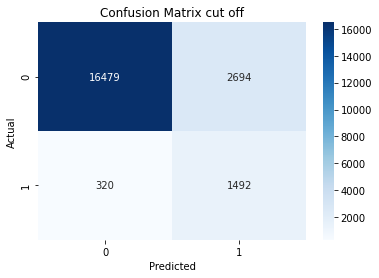

-----------------------------------------------------------------------------------------

Recall/Sensitivity -  0.8233995584988962

82.34 % of the positive cases have been predicted correctly
-----------------------------------------------------------------------------------------
Miss Rate -  0.17660044150110377
17.66 % of missed true positives
-----------------------------------------------------------------------------------------
F1 score - 0.49749916638879627
-----------------------------------------------------------------------------------------
Precision -  0.356426182513139
35.64 % of the positive instances correctly predicted as positive
-----------------------------------------------------------------------------------------
Accuracy - 0.8563736001906124
-----------------------------------------------------------------------------------------
Specificity -  0.8594899076826787
85.95 % of the negative cases have been predicted correctly
---------------------------------------

In [104]:
#prediction on train dataset

y_train_pred = ridge_classifier.predict(X_train)
classifier_metrics(y_train,y_train_pred)

Text(0.5, 1.0, 'ROC Curve for Ridge Classifier - Training data')

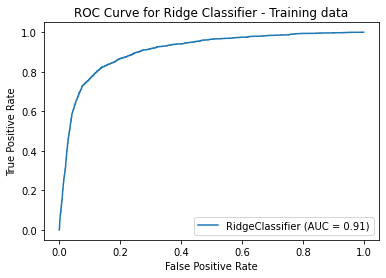

In [105]:
plot_roc_curve(ridge_classifier,X_train,y_train)
plt.title("ROC Curve for Ridge Classifier - Training data")

In [106]:
#prediction on test dataset

y_test_pred = ridge_classifier.predict(X_test)
classifier_metrics(y_test,y_test_pred)

-----------------------------------------------------------------------------------------

Recall/Sensitivity -  0.7863577863577863

78.64 % of the positive cases have been predicted correctly
-----------------------------------------------------------------------------------------
Miss Rate -  0.21364221364221364
21.36 % of missed true positives
-----------------------------------------------------------------------------------------
F1 score - 0.4853057982525814
-----------------------------------------------------------------------------------------
Precision -  0.3509477311889719
35.09 % of the positive instances correctly predicted as positive
-----------------------------------------------------------------------------------------
Accuracy - 0.8559039359573049
-----------------------------------------------------------------------------------------
Specificity -  0.8624802239260071
86.25 % of the negative cases have been predicted correctly
---------------------------------------

Text(0.5, 1.0, 'ROC Curve for Ridge Classifier - Testing data')

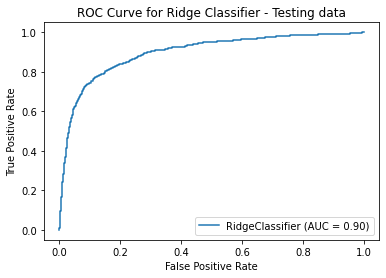

In [107]:
plot_roc_curve(ridge_classifier,X_test,y_test)
plt.title("ROC Curve for Ridge Classifier - Testing data")

In [108]:
ridge_classifier.coef_

array([[ 0.04093524,  0.07598737,  0.00551121,  0.03868924,  0.0140717 ,
        -0.03150433,  0.04027561,  0.04281572, -0.0547314 ,  0.00222612,
         0.01626402, -0.00696068,  0.00627262, -0.01493148,  0.10751218,
        -0.02148063,  0.02617746, -0.04738078, -0.00919543, -0.01380962,
        -0.02125234, -0.01336053, -0.01215811, -0.00083885, -0.00887555,
         0.01068014,  0.00562899, -0.01758022, -0.03516613, -0.04252806,
         0.00613317, -0.02497508, -0.07748737, -0.00229621,  0.02502923,
        -0.05094577,  0.00298095, -0.00970839, -0.02279678, -0.00161613,
        -0.00140355, -0.02834029,  0.00371686,  0.0126454 ,  0.02051843,
        -0.00619992,  0.01418693, -0.01923093, -0.02022416,  0.01206523,
         0.00993533,  0.02328956,  0.00655516, -0.06411734,  0.00713267,
         0.03706749, -0.10168779,  0.00194164, -0.00033286, -0.02243436,
        -0.02480164,  0.02644985, -0.03672015, -0.00793065,  0.02437968,
        -0.02513577,  0.01563068, -0.03553168, -0.0

In [109]:
imp_df = pd.DataFrame(
    {"Varname" : X_train.columns,
    "Importance" : abs(ridge_classifier.coef_[0,])}
)
imp_df.sort_values(by="Importance",ascending=False)

Varname  Importance
86     total_rech_num_8      0.2006
95   last_day_rch_amt_8      0.1700
14        roam_og_mou_8      0.1075
56     loc_ic_t2m_mou_8      0.1017
80         spl_ic_mou_8      0.0979
114                 aon      0.0869
32     std_og_t2t_mou_8      0.0775
1                arpu_7      0.0760
104        monthly_2g_8      0.0649
98          vol_2g_mb_8      0.0643
53     loc_ic_t2t_mou_8      0.0641
110        monthly_3g_8      0.0602
101         vol_3g_mb_8      0.0584
92       max_rech_amt_8      0.0548
8          offnet_mou_8      0.0547
35     std_og_t2m_mou_8      0.0509
17     loc_og_t2t_mou_8      0.0474
94   last_day_rch_amt_7      0.0457
119      is_rech_reduce      0.0447
107         sachet_2g_8      0.0429
7          offnet_mou_7      0.0428
29         loc_og_mou_8      0.0425
77       total_ic_mou_8      0.0413
0                arpu_6      0.0409
88     total_rech_amt_7      0.0403
6          offnet_mou_6      0.0403
75       total_ic_mou_6      0.0397
122          total_rech      0.0392
3           onnet_mou_6      0.0387
87     total_rech_amt_6      0.0374
55     loc_ic_t2m_mou_7      0.0371
62         loc_ic_mou_8      0.0367
118     calls_to_offnet      0.0359
67     std_ic_t2m_mou_7      0.0355
28         loc_og_mou_7      0.0352
5           onnet_mou_8      0.0315
41         std_og_mou_8      0.0283
113         sachet_3g_8      0.0270
61         loc_ic_mou_7      0.0264
16     loc_og_t2t_mou_7      0.0262
76       total_ic_mou_7      0.0255
74         std_ic_mou_8      0.0254
65     std_ic_t2t_mou_8      0.0251
34     std_og_t2m_mou_7      0.0250
31     std_og_t2t_mou_7      0.0250
60         loc_ic_mou_6      0.0248
71     std_ic_t2f_mou_8      0.0244
64     std_ic_t2t_mou_7      0.0244
51     loc_ic_t2t_mou_6      0.0233
96          vol_2g_mb_6      0.0231
38     std_og_t2f_mou_8      0.0228
102        monthly_2g_6      0.0228
90       max_rech_amt_6      0.0228
59     loc_ic_t2f_mou_8      0.0224
117            vbc_3g_6      0.0223
15     loc_og_t2t_mou_6      0.0215
20     loc_og_t2m_mou_8      0.0213
44         isd_og_mou_8      0.0205
68     std_ic_t2m_mou_8      0.0203
48       total_og_mou_6      0.0202
47         spl_og_mou_8      0.0192
115            vbc_3g_8      0.0183
93   last_day_rch_amt_6      0.0177
109        monthly_3g_7      0.0177
27         loc_og_mou_6      0.0176
83         isd_ic_mou_8      0.0173
10        roam_ic_mou_7      0.0163
66     std_ic_t2m_mou_6      0.0156
13        roam_og_mou_7      0.0149
91       max_rech_amt_7      0.0147
46         spl_og_mou_7      0.0142
4           onnet_mou_7      0.0141
19     loc_og_t2m_mou_7      0.0138
21     loc_og_t2f_mou_6      0.0134
112         sachet_3g_7      0.0133
82         isd_ic_mou_7      0.0131
43         isd_og_mou_7      0.0126
78         spl_ic_mou_6      0.0124
22     loc_og_t2f_mou_7      0.0122
49       total_og_mou_7      0.0121
79         spl_ic_mou_7      0.0109
25     loc_og_t2c_mou_7      0.0107
108        monthly_3g_6      0.0107
50       total_og_mou_8      0.0099
105         sachet_2g_6      0.0099
37     std_og_t2f_mou_7      0.0097
18     loc_og_t2m_mou_6      0.0092
24     loc_og_t2c_mou_6      0.0089
84     total_rech_num_6      0.0089
99          vol_3g_mb_6      0.0086
100         vol_3g_mb_7      0.0084
63     std_ic_t2t_mou_6      0.0079
111         sachet_3g_6      0.0076
85     total_rech_num_7      0.0074
54     loc_ic_t2m_mou_6      0.0071
11        roam_ic_mou_8      0.0070
73         std_ic_mou_7      0.0066
52     loc_ic_t2t_mou_7      0.0066
12        roam_og_mou_6      0.0063
45         spl_og_mou_6      0.0062
30     std_og_t2t_mou_6      0.0061
81         isd_ic_mou_6      0.0059
26     loc_og_t2c_mou_8      0.0056
2                arpu_8      0.0055
70     std_ic_t2f_mou_7      0.0054
121           total_mou      0.0041
42         isd_og_mou_6      0.0037
69     std_ic_t2f_mou_6      0.0034
89     total_rech_amt_8      0.0031
36     std_og_t2f_mou_6      0.0030
103        monthly_2

#### Random forest classifier

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1,class_weight={1:0.90,0:0.10})

Lets tune the two parameters that are necessary to reduce complexity of the model and hence controlling the overfitting - max_depth and min_sample_leaf. Our dataset is huge here with high number of variables and rows. We will keep number of folds at 3 to reduce the time taken for hyper parameter tuning. 

In [112]:
#create parameters grid based on the results of the random search
sk = StratifiedKFold(n_splits=3, random_state=4, shuffle=True)
params = {
    
    'max_depth' : [5,10,20],
    'min_samples_leaf' : [10,50,100]
 #   'max_features' : [2,3,4],
  #  'n_estimators' : [10,100,200]
}
#instantiate grid search model
gridSearch = GridSearchCV(estimator = classifier_rf,param_grid = params,cv=sk,n_jobs=-1,verbose=1,scoring='f1')
rf_grid = gridSearch.fit(X_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  1.7min finished


In [113]:
#save the best estimator as obtained by grid search cv
best_rf = rf_grid.best_estimator_
best_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.1, 1: 0.9}, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=10,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [114]:
#looking at the fetaure importances as returned by random forest
best_rf.feature_importances_

array([3.88061957e-03, 6.38469429e-03, 3.59658674e-02, 2.96660992e-03,
       3.41769087e-03, 1.29440321e-02, 3.42468269e-03, 4.52775952e-03,
       2.03328638e-02, 1.39875178e-03, 3.92022785e-03, 3.97966432e-02,
       1.58377269e-03, 3.37188730e-03, 4.10981544e-02, 2.69901746e-03,
       3.58344780e-03, 3.41057385e-02, 3.28865900e-03, 4.69771284e-03,
       3.22176012e-02, 2.02679432e-03, 2.42819821e-03, 1.10402988e-02,
       7.17771426e-04, 1.21011590e-03, 1.10644469e-03, 3.63811575e-03,
       4.49426594e-03, 4.64324211e-02, 2.75614738e-03, 2.41087970e-03,
       3.22895125e-03, 2.42286521e-03, 4.53099803e-03, 3.69666441e-03,
       3.82977722e-04, 6.99774799e-04, 9.42189409e-04, 4.40608215e-03,
       7.32290501e-03, 1.34886326e-02, 4.04669231e-04, 8.16639908e-04,
       7.33798571e-04, 2.01967647e-03, 3.41925803e-03, 5.28223602e-03,
       4.10020003e-03, 5.98611254e-03, 5.58447948e-02, 3.85821222e-03,
       4.60359157e-03, 3.09203531e-02, 4.51998885e-03, 4.61992197e-03,
      

In [115]:
#saving the importance(sorted) of each variable returned by random forest for visualization
imp_df = pd.DataFrame(
    {"Varname" : X_train.columns,
    "Importance" : best_rf.feature_importances_}
)
imp_df.sort_values(by="Importance",ascending=False)

Varname  Importance
62         loc_ic_mou_8      0.0695
77       total_ic_mou_8      0.0567
56     loc_ic_t2m_mou_8      0.0561
50       total_og_mou_8      0.0558
89     total_rech_amt_8      0.0469
29         loc_og_mou_8      0.0464
14        roam_og_mou_8      0.0411
11        roam_ic_mou_8      0.0398
95   last_day_rch_amt_8      0.0392
2                arpu_8      0.0360
17     loc_og_t2t_mou_8      0.0341
92       max_rech_amt_8      0.0329
20     loc_og_t2m_mou_8      0.0322
53     loc_ic_t2t_mou_8      0.0309
74         std_ic_mou_8      0.0213
8          offnet_mou_8      0.0203
59     loc_ic_t2f_mou_8      0.0149
41         std_og_mou_8      0.0135
5           onnet_mou_8      0.0129
23     loc_og_t2f_mou_8      0.0110
86     total_rech_num_8      0.0110
98          vol_2g_mb_8      0.0092
101         vol_3g_mb_8      0.0081
68     std_ic_t2m_mou_8      0.0079
40         std_og_mou_7      0.0073
1                arpu_7      0.0064
122          total_rech      0.0061
49       total_og_mou_7      0.0060
88     total_rech_amt_7      0.0059
114                 aon      0.0056
76       total_ic_mou_7      0.0055
47         spl_og_mou_8      0.0053
85     total_rech_num_7      0.0051
19     loc_og_t2m_mou_7      0.0047
55     loc_ic_t2m_mou_7      0.0046
52     loc_ic_t2t_mou_7      0.0046
34     std_og_t2m_mou_7      0.0045
7          offnet_mou_7      0.0045
54     loc_ic_t2m_mou_6      0.0045
28         loc_og_mou_7      0.0045
39         std_og_mou_6      0.0044
119      is_rech_reduce      0.0041
48       total_og_mou_6      0.0041
61         loc_ic_mou_7      0.0040
10        roam_ic_mou_7      0.0039
60         loc_ic_mou_6      0.0039
0                arpu_6      0.0039
51     loc_ic_t2t_mou_6      0.0039
57     loc_ic_t2f_mou_6      0.0037
121           total_mou      0.0037
35     std_og_t2m_mou_8      0.0037
27         loc_og_mou_6      0.0036
87     total_rech_amt_6      0.0036
16     loc_og_t2t_mou_7      0.0036
90       max_rech_amt_6      0.0034
6          offnet_mou_6      0.0034
46         spl_og_mou_7      0.0034
4           onnet_mou_7      0.0034
13        roam_og_mou_7      0.0034
75       total_ic_mou_6      0.0033
18     loc_og_t2m_mou_6      0.0033
32     std_og_t2t_mou_8      0.0032
72         std_ic_mou_6      0.0032
115            vbc_3g_8      0.0030
65     std_ic_t2t_mou_8      0.0030
3           onnet_mou_6      0.0030
30     std_og_t2t_mou_6      0.0028
15     loc_og_t2t_mou_6      0.0027
66     std_ic_t2m_mou_6      0.0026
84     total_rech_num_6      0.0026
58     loc_ic_t2f_mou_7      0.0026
91       max_rech_amt_7      0.0025
67     std_ic_t2m_mou_7      0.0025
22     loc_og_t2f_mou_7      0.0024
33     std_og_t2m_mou_6      0.0024
31     std_og_t2t_mou_7      0.0024
64     std_ic_t2t_mou_7      0.0024
73         std_ic_mou_7      0.0023
100         vol_3g_mb_7      0.0021
94   last_day_rch_amt_7      0.0021
21     loc_og_t2f_mou_6      0.0020
45         spl_og_mou_6      0.0020
93   last_day_rch_amt_6      0.0020
80         spl_ic_mou_8      0.0019
116            vbc_3g_7      0.0018
99          vol_3g_mb_6      0.0018
96          vol_2g_mb_6      0.0017
97          vol_2g_mb_7      0.0017
63     std_ic_t2t_mou_6      0.0017
12        roam_og_mou_6      0.0016
82         isd_ic_mou_7      0.0014
71     std_ic_t2f_mou_8      0.0014
9         roam_ic_mou_6      0.0014
25     loc_og_t2c_mou_7      0.0012
26     loc_og_t2c_mou_8      0.0011
38     std_og_t2f_mou_8      0.0009
110        monthly_3g_8      0.0009
70     std_ic_t2f_mou_7      0.0009
43         isd_og_mou_7      0.0008
69     std_ic_t2f_mou_6      0.0008
117            vbc_3g_6      0.0008
104        monthly_2g_8      0.0008
44         isd_og_mou_8      0.0007
81         isd_ic_mou_6      0.0007
24     loc_og_t2c_mou_6      0.0007
37     std_og_t2f_mou_7      0.0007
78         spl_ic_mou_6      0.0007
83         isd_ic_mou_8      0.0007
108        monthly_3g_6      0.0007
107         sachet_2g_8      0.0005
106         sachet_2

#### Using SelectFromModel to identify the top variables and reduce the dimension
SelectFromModel is a meta transformer model that selects features based on importance weights of the features

In [116]:
from sklearn.feature_selection import SelectFromModel

#select variables from the best estimator returned by random forest
sel_coeff = SelectFromModel(best_rf)
sel_coeff.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight={0: 0.1, 1: 0.9},
                                                 criterion='gini', max_depth=10,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=10,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=-1,
                                                 oob_score=False,
                                       

In [117]:
#selecting the features based on the array returned by get.support()
top_coeff = pd.DataFrame(columns=['Features', 'Coeff'])
top_coeff['Features'] = X_train.columns
top_coeff['Coeff'] = sel_coeff.get_support()
top_coeff['Coeff'] = top_coeff['Coeff'].map(lambda x: 1 if x==True else 0)
top_coeff[top_coeff['Coeff']!=0]

Features  Coeff
2                arpu_8      1
5           onnet_mou_8      1
8          offnet_mou_8      1
11        roam_ic_mou_8      1
14        roam_og_mou_8      1
17     loc_og_t2t_mou_8      1
20     loc_og_t2m_mou_8      1
23     loc_og_t2f_mou_8      1
29         loc_og_mou_8      1
41         std_og_mou_8      1
50       total_og_mou_8      1
53     loc_ic_t2t_mou_8      1
56     loc_ic_t2m_mou_8      1
59     loc_ic_t2f_mou_8      1
62         loc_ic_mou_8      1
74         std_ic_mou_8      1
77       total_ic_mou_8      1
86     total_rech_num_8      1
89     total_rech_amt_8      1
92       max_rech_amt_8      1
95   last_day_rch_amt_8      1
98          vol_2g_mb_8      1
101         vol_3g_mb_8      1

In [118]:
#fitting the random forest based on the columns selected by feature importance
columns = np.array(top_coeff[top_coeff['Coeff']!=0]['Features'])

X_train = X_train[columns]
X_test =X_test[columns]


best_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.1, 1: 0.9}, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=10,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

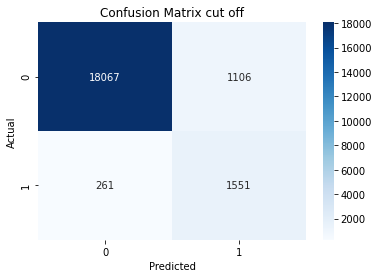

-----------------------------------------------------------------------------------------

Recall/Sensitivity -  0.8559602649006622

85.6 % of the positive cases have been predicted correctly
-----------------------------------------------------------------------------------------
Miss Rate -  0.14403973509933773
14.4 % of missed true positives
-----------------------------------------------------------------------------------------
F1 score - 0.6941150145446409
-----------------------------------------------------------------------------------------
Precision -  0.5837410613473842
58.37 % of the positive instances correctly predicted as positive
-----------------------------------------------------------------------------------------
Accuracy - 0.9348582320705265
-----------------------------------------------------------------------------------------
Specificity -  0.9423147133990507
94.23 % of the negative cases have been predicted correctly
-----------------------------------------

In [119]:
#prediction on train dataset

y_train_pred = best_rf.predict(X_train)
classifier_metrics(y_train,y_train_pred)

Text(0.5, 1.0, 'ROC Curve for Random forest - Training data')

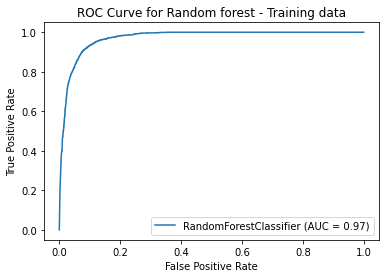

In [120]:
#plotting ROC curve for train set
plot_roc_curve(best_rf,X_train,y_train)

plt.title("ROC Curve for Random forest - Training data")

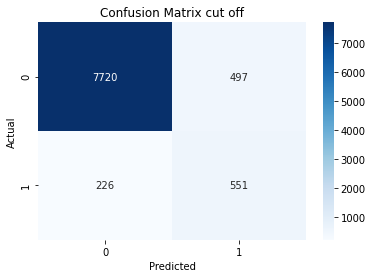

-----------------------------------------------------------------------------------------

Recall/Sensitivity -  0.7091377091377091

70.91 % of the positive cases have been predicted correctly
-----------------------------------------------------------------------------------------
Miss Rate -  0.2908622908622909
29.09 % of missed true positives
-----------------------------------------------------------------------------------------
F1 score - 0.6038356164383561
-----------------------------------------------------------------------------------------
Precision -  0.5257633587786259
52.58 % of the positive instances correctly predicted as positive
-----------------------------------------------------------------------------------------
Accuracy - 0.919613075383589
-----------------------------------------------------------------------------------------
Specificity -  0.9395156383108191
93.95 % of the negative cases have been predicted correctly
-----------------------------------------

In [121]:
#prediction on test dataset

y_test_pred = best_rf.predict(X_test)
classifier_metrics(y_test,y_test_pred)

Text(0.5, 1.0, 'ROC Curve for Random Forest - Testing data')

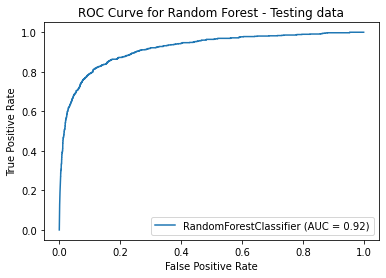

In [122]:
#plotting ROC curve for test dta
plot_roc_curve(best_rf,X_test,y_test)

plt.title("ROC Curve for Random Forest - Testing data")

We can observe the random forest model is performing better than ridge classifier in terms of F1 scorre and recall which are our main areas of focus. So we will pick it as the final model to identify the important variables

In [123]:
#### Final model to identify top variables : Random Forest

In [124]:
#save the top features and coefficients
top_coeff = pd.DataFrame(columns=['Features', 'Coeff'])

top_coeff['Features'] = X_train.columns
top_coeff['Coeff'] = abs(best_rf.feature_importances_).reshape(-1)
top_coeff.sort_values(['Coeff'], ascending=False)

Features  Coeff
16      total_ic_mou_8 0.1228
14        loc_ic_mou_8 0.0950
10      total_og_mou_8 0.0842
12    loc_ic_t2m_mou_8 0.0767
8         loc_og_mou_8 0.0688
11    loc_ic_t2t_mou_8 0.0586
6     loc_og_t2m_mou_8 0.0568
18    total_rech_amt_8 0.0517
20  last_day_rch_amt_8 0.0517
4        roam_og_mou_8 0.0514
3        roam_ic_mou_8 0.0503
5     loc_og_t2t_mou_8 0.0432
0               arpu_8 0.0391
2         offnet_mou_8 0.0198
21         vol_2g_mb_8 0.0173
22         vol_3g_mb_8 0.0163
13    loc_ic_t2f_mou_8 0.0156
9         std_og_mou_8 0.0153
15        std_ic_mou_8 0.0153
19      max_rech_amt_8 0.0141
1          onnet_mou_8 0.0137
17    total_rech_num_8 0.0121
7     loc_og_t2f_mou_8 0.0101

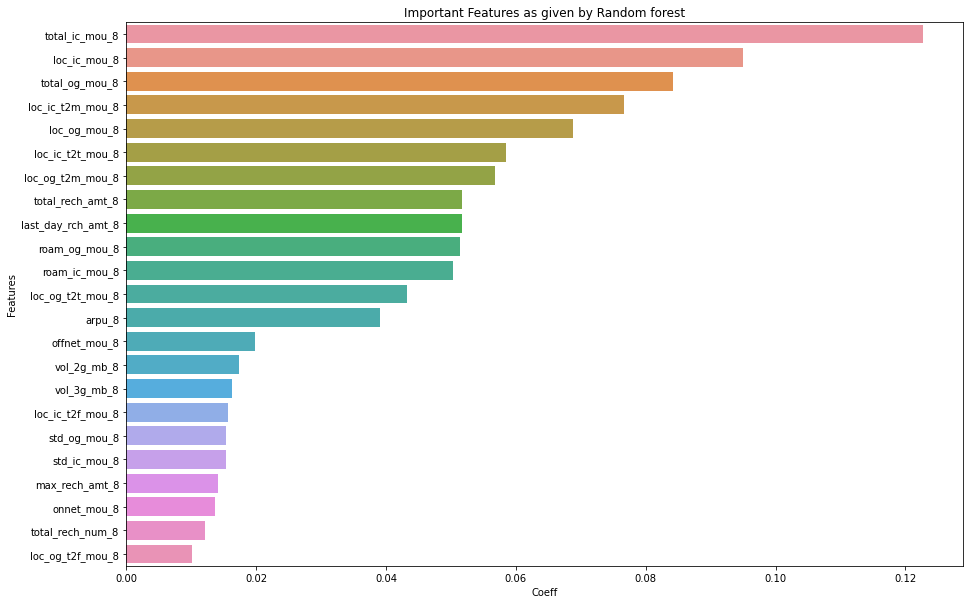

In [125]:
#visualizing the top features as identified by Random forest 
imp_features = top_coeff.sort_values(['Coeff'], ascending=False)

plt.figure(figsize =(15,10))
sns.barplot(data=imp_features,x = "Coeff",y="Features");
plt.title("Important Features as given by Random forest")
plt.show()

### Summary

1. Predictive Model : Logistic Regression with PCA
2. To identify top variables : Random forest with Feature selection(selectfrommodel)


### Business recommendations

During the analysis of the churn dataset for high valued customers, we observed the below -

1. We see the important features mostly comprise of variables related to usage pattern in the action phase. THere are also features from the good phase.
2. Incoming and outgoing usage patterns are strong indicators of churn among customers
3. We see quite a few standard calls and roaming calls related feature as well, which means the prices of these calls play an important role in customers churning.

The business can watch out for change in usage patterns especially in consecutive months, reach out to the customers through surveys or calls to understand any gap in the services. They can be offered with specialized plans to accomodate their incoming/outgoing, standard or roaming usage. 
